In [28]:
import sys 
sys.path.append("C:/Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries")
import training_xgb_models as trainer
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import pickle 

In [ ]:
skus_to_model_path =  "Data/currated/skus_to_be_modeled_2_10.pkl"
try:
    with open(f'{skus_to_model_path}', 'rb') as file:
        sku_to_model = pickle.load(file)

    print(f"Loaded sku len: {len(sku_to_model)}")
    print(f"Loaded skus: {sku_to_model}")
    print(type(sku_to_model))
except Exception as e:
    print(e)
    sku_to_modele = []

Loaded sku len: 50
Loaded skus: ['PSDGLCRTWXC4', 'PSDC9FX9TH5V', 'PSDCF54V2TKG', 'PSDGFWMQCZCL', 'PSDQG6VWMMZV', 'PSDRZVCW8M36', 'PSD9TJN45ZFL', 'PSDQ8Z5JZLVM', 'PSDWKY269FGX', 'PSDZ66XTNWL8', 'PSDC8886WMZZ', 'PSDWLHH83Z5R', 'PSDZKF8NBH5Y', 'PSD8F689H89H', 'PSDHBJK5KMXH', 'PSDYGQ2FH553', 'PSDXZQRFV2GV', 'PSD8JNGGT2ZB', 'PSD9Y369LLY6', 'PSDR2J4XBVFC', 'PSDZZHZ6583N', 'PSDCKZ5HJTVT', 'PSD3CC3YVKR5', 'PSDGHY52544X', 'PSDWC2LWJJKJ', 'PSD9T5H3KJZ9', 'PSD9L59C3HX2', 'PSD5TGG3J4FZ', 'PSD6B28VJ233', 'PSDX35CJQQXT', 'PSDVY98HJBVN', 'PSD5TGG3JJVJ', 'PSDHRF54JQVX', 'PSDM29W2NH9Z', 'PSDFJ3TFV53J', 'PSDYT65JHBNK', 'PSDW2ZM8YFJ4', 'PSDCQ68TGM4N', 'PSDCX59NXJKT', 'PSD4FRY5C46Y', 'PSDRYF2HTVW4', 'PSDJYKCT3GBM', 'PSD3QK3YQCJ6', 'PSDTGCY8WBCL', 'PSDXY82RRJ2G', 'PSDL5FMCVWHQ', 'PSDFY9YGJ4F4', 'PSD25NRZYY2N', 'PSD35W2BN2XR', 'PSD9YBNBTH3N']
'str' object is not callable


In [31]:
train_df, test_df,prod, current_skus = trainer.load_data(create_test_train_split = False, top_skus=False) 


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:60: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  prod = cu.clean_prod(pd.read_csv('data/raw/prod.csv'))


In [38]:
# generating models for the skus in current_skus 

xgbmodels = {sku : trainer.train_models_advanced(train_data = train_df,
                                                 type = prod[prod['sku']==sku]['type'].iloc[0],
                                                 price =  prod[prod['sku']==sku]['per_unit_cost'].iloc[0],
                                                 split =True,) for sku in sku_to_model}

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.77543	eval-rmse:0.43916
[1]	train-rmse:0.73644	eval-rmse:0.42312
[2]	train-rmse:0.70262	eval-rmse:0.40935
[3]	train-rmse:0.67261	eval-rmse:0.39856
[4]	train-rmse:0.64681	eval-rmse:0.38944
[5]	train-rmse:0.62454	eval-rmse:0.38280


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_std_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).std().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.fillna(0, inplace=True)  # 

[6]	train-rmse:0.60529	eval-rmse:0.37758
[7]	train-rmse:0.58818	eval-rmse:0.37387
[8]	train-rmse:0.57385	eval-rmse:0.37071
[9]	train-rmse:0.56163	eval-rmse:0.36846
[10]	train-rmse:0.55079	eval-rmse:0.36615
[11]	train-rmse:0.54137	eval-rmse:0.36442
[12]	train-rmse:0.53325	eval-rmse:0.36229
[13]	train-rmse:0.52541	eval-rmse:0.36078
[14]	train-rmse:0.51910	eval-rmse:0.36003
[15]	train-rmse:0.51340	eval-rmse:0.36072
[16]	train-rmse:0.50872	eval-rmse:0.36025
[17]	train-rmse:0.50416	eval-rmse:0.35974
[18]	train-rmse:0.50028	eval-rmse:0.36039
[19]	train-rmse:0.49655	eval-rmse:0.36028
[20]	train-rmse:0.49344	eval-rmse:0.36132
[21]	train-rmse:0.49068	eval-rmse:0.36201
[22]	train-rmse:0.48786	eval-rmse:0.36270
[23]	train-rmse:0.48630	eval-rmse:0.36254
[24]	train-rmse:0.48448	eval-rmse:0.36245
[25]	train-rmse:0.48310	eval-rmse:0.36223
[26]	train-rmse:0.48175	eval-rmse:0.36242
[27]	train-rmse:0.48015	eval-rmse:0.36217
[28]	train-rmse:0.47844	eval-rmse:0.36203
[29]	train-rmse:0.47730	eval-rmse:0.36

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:1.19249	eval-rmse:0.62326
[1]	train-rmse:1.12885	eval-rmse:0.58143
[2]	train-rmse:1.07232	eval-rmse:0.54241
[3]	train-rmse:1.02358	eval-rmse:0.51372
[4]	train-rmse:0.98006	eval-rmse:0.49231
[5]	train-rmse:0.94074	eval-rmse:0.47656
[6]	train-rmse:0.90723	eval-rmse:0.46356
[7]	train-rmse:0.87711	eval-rmse:0.45357
[8]	train-rmse:0.85064	eval-rmse:0.44630
[9]	train-rmse:0.82817	eval-rmse:0.44215
[10]	train-rmse:0.80765	eval-rmse:0.44014
[11]	train-rmse:0.78940	eval-rmse:0.43671
[12]	train-rmse:0.77364	eval-rmse:0.43663
[13]	train-rmse:0.75993	eval-rmse:0.43700
[14]	train-rmse:0.74767	eval-rmse:0.43951
[15]	train-rmse:0.73591	eval-rmse:0.44156
[16]	train-rmse:0.72652	eval-rmse:0.44285
[17]	train-rmse:0.71730	eval-rmse:0.44540
[18]	train-rmse:0.71028	eval-rmse:0.44808
[19]	train-rmse:0.70335	eval-rmse:0.44970
[20]	train-rmse:0.69413	eval-rmse:0.44973
[21]	train-rmse:0.68737	eval-rmse:0.45055
[22]	train-rmse:0.68197	eval-rmse:0.45121
[23]	train-rmse:0.67735	eval-rmse:0.45211
[2

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_std_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).std().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.fillna(0, inplace=True)  # 

[31]	train-rmse:0.63379	eval-rmse:0.46279
[32]	train-rmse:0.62896	eval-rmse:0.46528
[33]	train-rmse:0.62688	eval-rmse:0.46581
[34]	train-rmse:0.62274	eval-rmse:0.46652
[35]	train-rmse:0.61907	eval-rmse:0.46594
[36]	train-rmse:0.61710	eval-rmse:0.47014
[37]	train-rmse:0.61308	eval-rmse:0.47112
[38]	train-rmse:0.60948	eval-rmse:0.47306
[39]	train-rmse:0.60726	eval-rmse:0.47306
[40]	train-rmse:0.60470	eval-rmse:0.47830
[41]	train-rmse:0.60253	eval-rmse:0.47819
[42]	train-rmse:0.59997	eval-rmse:0.48034
[43]	train-rmse:0.59819	eval-rmse:0.48209
[44]	train-rmse:0.59661	eval-rmse:0.48365
[45]	train-rmse:0.59490	eval-rmse:0.48514
[46]	train-rmse:0.59279	eval-rmse:0.48506
[47]	train-rmse:0.58985	eval-rmse:0.48480
[48]	train-rmse:0.58865	eval-rmse:0.48539
[49]	train-rmse:0.58610	eval-rmse:0.48524
[50]	train-rmse:0.58345	eval-rmse:0.48447
[51]	train-rmse:0.58217	eval-rmse:0.48599
[52]	train-rmse:0.58000	eval-rmse:0.48644
[53]	train-rmse:0.57868	eval-rmse:0.48631
[54]	train-rmse:0.57799	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.76665	eval-rmse:0.44030


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'sell_qty_lag_{lag}'] = train_data.groupby('sku')['sell_qty'].shift(lag)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'sell_qty_l

[1]	train-rmse:0.72800	eval-rmse:0.42588
[2]	train-rmse:0.69436	eval-rmse:0.41321
[3]	train-rmse:0.66527	eval-rmse:0.40326
[4]	train-rmse:0.63996	eval-rmse:0.39612
[5]	train-rmse:0.61806	eval-rmse:0.39068
[6]	train-rmse:0.59901	eval-rmse:0.38465
[7]	train-rmse:0.58339	eval-rmse:0.37933
[8]	train-rmse:0.56926	eval-rmse:0.37518
[9]	train-rmse:0.55712	eval-rmse:0.37333
[10]	train-rmse:0.54663	eval-rmse:0.36967
[11]	train-rmse:0.53702	eval-rmse:0.36667
[12]	train-rmse:0.52897	eval-rmse:0.36432
[13]	train-rmse:0.52151	eval-rmse:0.36205
[14]	train-rmse:0.51523	eval-rmse:0.36178
[15]	train-rmse:0.50958	eval-rmse:0.36078
[16]	train-rmse:0.50378	eval-rmse:0.36030
[17]	train-rmse:0.49876	eval-rmse:0.36006
[18]	train-rmse:0.49467	eval-rmse:0.35988
[19]	train-rmse:0.49121	eval-rmse:0.35908
[20]	train-rmse:0.48809	eval-rmse:0.36042
[21]	train-rmse:0.48558	eval-rmse:0.36063
[22]	train-rmse:0.48360	eval-rmse:0.36074
[23]	train-rmse:0.48089	eval-rmse:0.36197
[24]	train-rmse:0.47870	eval-rmse:0.36138
[

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[11]	train-rmse:0.41000	eval-rmse:0.35338
[12]	train-rmse:0.40082	eval-rmse:0.35133
[13]	train-rmse:0.39284	eval-rmse:0.35042
[14]	train-rmse:0.38535	eval-rmse:0.34930
[15]	train-rmse:0.37904	eval-rmse:0.34855
[16]	train-rmse:0.37302	eval-rmse:0.34754
[17]	train-rmse:0.36800	eval-rmse:0.34683
[18]	train-rmse:0.36302	eval-rmse:0.34696
[19]	train-rmse:0.35623	eval-rmse:0.34589
[20]	train-rmse:0.35010	eval-rmse:0.34605
[21]	train-rmse:0.34485	eval-rmse:0.34608
[22]	train-rmse:0.34105	eval-rmse:0.34533
[23]	train-rmse:0.33654	eval-rmse:0.34560
[24]	train-rmse:0.33095	eval-rmse:0.34571
[25]	train-rmse:0.32808	eval-rmse:0.34552
[26]	train-rmse:0.32314	eval-rmse:0.34595
[27]	train-rmse:0.31894	eval-rmse:0.34609
[28]	train-rmse:0.31648	eval-rmse:0.34590
[29]	train-rmse:0.31462	eval-rmse:0.34602
[30]	train-rmse:0.31237	eval-rmse:0.34607
[31]	train-rmse:0.30961	eval-rmse:0.34600
[32]	train-rmse:0.30812	eval-rmse:0.34591
[33]	train-rmse:0.30571	eval-rmse:0.34605
[34]	train-rmse:0.30434	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.94613	eval-rmse:1.17440
[1]	train-rmse:0.88845	eval-rmse:1.13878
[2]	train-rmse:0.83778	eval-rmse:1.07901
[3]	train-rmse:0.79354	eval-rmse:1.02916
[4]	train-rmse:0.75441	eval-rmse:0.98435
[5]	train-rmse:0.72018	eval-rmse:0.94660
[6]	train-rmse:0.68974	eval-rmse:0.91482
[7]	train-rmse:0.66437	eval-rmse:0.88797
[8]	train-rmse:0.64163	eval-rmse:0.88358
[9]	train-rmse:0.62173	eval-rmse:0.86198
[10]	train-rmse:0.60466	eval-rmse:0.84182
[11]	train-rmse:0.58909	eval-rmse:0.82584
[12]	train-rmse:0.57580	eval-rmse:0.78604
[13]	train-rmse:0.56381	eval-rmse:0.78057
[14]	train-rmse:0.55278	eval-rmse:0.76948
[15]	train-rmse:0.54392	eval-rmse:0.76321
[16]	train-rmse:0.53633	eval-rmse:0.75773
[17]	train-rmse:0.52775	eval-rmse:0.75149
[18]	train-rmse:0.52051	eval-rmse:0.74665
[19]	train-rmse:0.51458	eval-rmse:0.74238
[20]	train-rmse:0.50957	eval-rmse:0.72926
[21]	train-rmse:0.50511	eval-rmse:0.72631
[22]	train-rmse:0.50090	eval-rmse:0.72035
[23]	train-rmse:0.49704	eval-rmse:0.71944
[2

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[66]	train-rmse:0.15154	eval-rmse:2.45989
[67]	train-rmse:0.15015	eval-rmse:2.46020
[68]	train-rmse:0.14996	eval-rmse:2.46046
[69]	train-rmse:0.14969	eval-rmse:2.46097
[70]	train-rmse:0.14952	eval-rmse:2.46069
[71]	train-rmse:0.14900	eval-rmse:2.46071
[72]	train-rmse:0.14840	eval-rmse:2.46078
[73]	train-rmse:0.14826	eval-rmse:2.46053
[74]	train-rmse:0.14767	eval-rmse:2.46068
[75]	train-rmse:0.14745	eval-rmse:2.46086
[76]	train-rmse:0.14699	eval-rmse:2.46056
[77]	train-rmse:0.14678	eval-rmse:2.46002
[78]	train-rmse:0.14607	eval-rmse:2.45979
[79]	train-rmse:0.14552	eval-rmse:2.45988
[80]	train-rmse:0.14494	eval-rmse:2.45987
[81]	train-rmse:0.14389	eval-rmse:2.45993
[82]	train-rmse:0.14297	eval-rmse:2.45983
[83]	train-rmse:0.14252	eval-rmse:2.45977
[84]	train-rmse:0.14201	eval-rmse:2.46010
[85]	train-rmse:0.14175	eval-rmse:2.46003
[86]	train-rmse:0.14104	eval-rmse:2.46034
[87]	train-rmse:0.14050	eval-rmse:2.46044
[88]	train-rmse:0.13924	eval-rmse:2.46040
[89]	train-rmse:0.13826	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[1]	train-rmse:1.33927	eval-rmse:0.37961
[2]	train-rmse:1.25939	eval-rmse:0.36472
[3]	train-rmse:1.19111	eval-rmse:0.35239
[4]	train-rmse:1.12812	eval-rmse:0.34109
[5]	train-rmse:1.07333	eval-rmse:0.33146
[6]	train-rmse:1.02171	eval-rmse:0.32355
[7]	train-rmse:0.97699	eval-rmse:0.31746
[8]	train-rmse:0.93734	eval-rmse:0.31215
[9]	train-rmse:0.89665	eval-rmse:0.30780
[10]	train-rmse:0.86113	eval-rmse:0.30360
[11]	train-rmse:0.82886	eval-rmse:0.30094
[12]	train-rmse:0.80006	eval-rmse:0.29783
[13]	train-rmse:0.77258	eval-rmse:0.29599
[14]	train-rmse:0.75155	eval-rmse:0.29411
[15]	train-rmse:0.72838	eval-rmse:0.29259
[16]	train-rmse:0.70808	eval-rmse:0.29126
[17]	train-rmse:0.69040	eval-rmse:0.29013
[18]	train-rmse:0.67494	eval-rmse:0.28919
[19]	train-rmse:0.66034	eval-rmse:0.28841
[20]	train-rmse:0.64532	eval-rmse:0.28799
[21]	train-rmse:0.63164	eval-rmse:0.28727
[22]	train-rmse:0.61712	eval-rmse:0.28712
[23]	train-rmse:0.60689	eval-rmse:0.28676
[24]	train-rmse:0.59397	eval-rmse:0.28666
[

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.66809	eval-rmse:0.51349
[1]	train-rmse:0.63667	eval-rmse:0.49530
[2]	train-rmse:0.60948	eval-rmse:0.48037
[3]	train-rmse:0.58568	eval-rmse:0.46779
[4]	train-rmse:0.56518	eval-rmse:0.45788
[5]	train-rmse:0.54759	eval-rmse:0.44999
[6]	train-rmse:0.53231	eval-rmse:0.44192
[7]	train-rmse:0.51829	eval-rmse:0.43486
[8]	train-rmse:0.50621	eval-rmse:0.42955
[9]	train-rmse:0.49530	eval-rmse:0.42665
[10]	train-rmse:0.48589	eval-rmse:0.42300
[11]	train-rmse:0.47824	eval-rmse:0.42139
[12]	train-rmse:0.47115	eval-rmse:0.42030
[13]	train-rmse:0.46468	eval-rmse:0.42039
[14]	train-rmse:0.45923	eval-rmse:0.42025
[15]	train-rmse:0.45414	eval-rmse:0.42059
[16]	train-rmse:0.44975	eval-rmse:0.42137
[17]	train-rmse:0.44571	eval-rmse:0.42246
[18]	train-rmse:0.44201	eval-rmse:0.42361
[19]	train-rmse:0.43902	eval-rmse:0.42461
[20]	train-rmse:0.43634	eval-rmse:0.42636
[21]	train-rmse:0.43420	eval-rmse:0.42750
[22]	train-rmse:0.43207	eval-rmse:0.42901
[23]	train-rmse:0.43044	eval-rmse:0.42983
[2

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.95948	eval-rmse:1.17202
[1]	train-rmse:0.89951	eval-rmse:1.10458
[2]	train-rmse:0.84688	eval-rmse:1.04794
[3]	train-rmse:0.79979	eval-rmse:0.99147
[4]	train-rmse:0.75727	eval-rmse:0.95024
[5]	train-rmse:0.71987	eval-rmse:0.91565
[6]	train-rmse:0.68659	eval-rmse:0.88503
[7]	train-rmse:0.65622	eval-rmse:0.83156
[8]	train-rmse:0.63042	eval-rmse:0.81581
[9]	train-rmse:0.60674	eval-rmse:0.80155
[10]	train-rmse:0.58602	eval-rmse:0.79250
[11]	train-rmse:0.56793	eval-rmse:0.78254
[12]	train-rmse:0.55108	eval-rmse:0.77539
[13]	train-rmse:0.53651	eval-rmse:0.77613
[14]	train-rmse:0.52353	eval-rmse:0.77965
[15]	train-rmse:0.51146	eval-rmse:0.77883
[16]	train-rmse:0.50082	eval-rmse:0.78086
[17]	train-rmse:0.49156	eval-rmse:0.78301
[18]	train-rmse:0.48237	eval-rmse:0.78313
[19]	train-rmse:0.47453	eval-rmse:0.78537
[20]	train-rmse:0.46788	eval-rmse:0.78766
[21]	train-rmse:0.46118	eval-rmse:0.78903
[22]	train-rmse:0.45616	eval-rmse:0.79280


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_std_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).std().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.fillna(0, inplace=True)  # 

[23]	train-rmse:0.45100	eval-rmse:0.81420
[24]	train-rmse:0.44563	eval-rmse:0.82042
[25]	train-rmse:0.44126	eval-rmse:0.82223
[26]	train-rmse:0.43640	eval-rmse:0.82664
[27]	train-rmse:0.43178	eval-rmse:0.82813
[28]	train-rmse:0.42888	eval-rmse:0.82904
[29]	train-rmse:0.42584	eval-rmse:0.83663
[30]	train-rmse:0.42275	eval-rmse:0.83860
[31]	train-rmse:0.42039	eval-rmse:0.83817
[32]	train-rmse:0.41829	eval-rmse:0.83876
[33]	train-rmse:0.41568	eval-rmse:0.83947
[34]	train-rmse:0.41284	eval-rmse:0.83163
[35]	train-rmse:0.41038	eval-rmse:0.85739
[36]	train-rmse:0.40906	eval-rmse:0.85691
[37]	train-rmse:0.40672	eval-rmse:0.88535
[38]	train-rmse:0.40445	eval-rmse:0.91461
[39]	train-rmse:0.40188	eval-rmse:0.94293
[40]	train-rmse:0.40091	eval-rmse:0.94282
[41]	train-rmse:0.39946	eval-rmse:0.95354
[42]	train-rmse:0.39759	eval-rmse:0.96539
[43]	train-rmse:0.39422	eval-rmse:0.97549
[44]	train-rmse:0.39119	eval-rmse:0.97358
[45]	train-rmse:0.38908	eval-rmse:0.97730
[46]	train-rmse:0.38656	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.89356	eval-rmse:0.47125


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'sell_qty_lag_{lag}'] = train_data.groupby('sku')['sell_qty'].shift(lag)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:157: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[f'sell_qty_l

[1]	train-rmse:0.83666	eval-rmse:0.45463
[2]	train-rmse:0.78669	eval-rmse:0.44002
[3]	train-rmse:0.74209	eval-rmse:0.42776
[4]	train-rmse:0.70299	eval-rmse:0.41806
[5]	train-rmse:0.66828	eval-rmse:0.40955
[6]	train-rmse:0.63799	eval-rmse:0.40252
[7]	train-rmse:0.61145	eval-rmse:0.39659
[8]	train-rmse:0.58834	eval-rmse:0.39081
[9]	train-rmse:0.56705	eval-rmse:0.38630
[10]	train-rmse:0.54791	eval-rmse:0.38286
[11]	train-rmse:0.53272	eval-rmse:0.38007
[12]	train-rmse:0.51761	eval-rmse:0.37740
[13]	train-rmse:0.50512	eval-rmse:0.37564
[14]	train-rmse:0.49336	eval-rmse:0.37371
[15]	train-rmse:0.48287	eval-rmse:0.37174
[16]	train-rmse:0.47410	eval-rmse:0.37070
[17]	train-rmse:0.46558	eval-rmse:0.36995
[18]	train-rmse:0.45843	eval-rmse:0.36946
[19]	train-rmse:0.45337	eval-rmse:0.36868
[20]	train-rmse:0.44789	eval-rmse:0.36816
[21]	train-rmse:0.44404	eval-rmse:0.36720
[22]	train-rmse:0.43892	eval-rmse:0.36693
[23]	train-rmse:0.43373	eval-rmse:0.36576
[24]	train-rmse:0.42861	eval-rmse:0.36633
[

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[43]	train-rmse:0.28178	eval-rmse:1.07825
[44]	train-rmse:0.27905	eval-rmse:1.07998
[45]	train-rmse:0.27574	eval-rmse:1.07983
[46]	train-rmse:0.27477	eval-rmse:1.07924
[47]	train-rmse:0.27402	eval-rmse:1.07851
[48]	train-rmse:0.27164	eval-rmse:1.07805
[49]	train-rmse:0.27032	eval-rmse:1.07865
[50]	train-rmse:0.26898	eval-rmse:1.07825
[51]	train-rmse:0.26784	eval-rmse:1.07820
[52]	train-rmse:0.26666	eval-rmse:1.07920
[53]	train-rmse:0.26548	eval-rmse:1.07935
[54]	train-rmse:0.26309	eval-rmse:1.07993
[55]	train-rmse:0.26207	eval-rmse:1.08139
[56]	train-rmse:0.26109	eval-rmse:1.08114
[57]	train-rmse:0.26057	eval-rmse:1.08103
[58]	train-rmse:0.25753	eval-rmse:1.07982
[59]	train-rmse:0.25660	eval-rmse:1.08232
[60]	train-rmse:0.25572	eval-rmse:1.08246
[61]	train-rmse:0.25504	eval-rmse:1.08209
[62]	train-rmse:0.25256	eval-rmse:1.08195
[63]	train-rmse:0.25172	eval-rmse:1.08248
[64]	train-rmse:0.25095	eval-rmse:1.08449
[65]	train-rmse:0.24981	eval-rmse:1.08426
[66]	train-rmse:0.24928	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.96097	eval-rmse:1.12535
[1]	train-rmse:0.90306	eval-rmse:1.06138
[2]	train-rmse:0.85271	eval-rmse:1.00711
[3]	train-rmse:0.80772	eval-rmse:0.96201
[4]	train-rmse:0.76875	eval-rmse:0.92083
[5]	train-rmse:0.73469	eval-rmse:0.88519
[6]	train-rmse:0.70536	eval-rmse:0.87405
[7]	train-rmse:0.67987	eval-rmse:0.84760
[8]	train-rmse:0.65741	eval-rmse:0.82510
[9]	train-rmse:0.63750	eval-rmse:0.81081
[10]	train-rmse:0.61966	eval-rmse:0.79210
[11]	train-rmse:0.60485	eval-rmse:0.77862
[12]	train-rmse:0.59204	eval-rmse:0.76646
[13]	train-rmse:0.58029	eval-rmse:0.75598
[14]	train-rmse:0.57058	eval-rmse:0.74728
[15]	train-rmse:0.56145	eval-rmse:0.73992
[16]	train-rmse:0.55364	eval-rmse:0.73238
[17]	train-rmse:0.54627	eval-rmse:0.72756
[18]	train-rmse:0.54030	eval-rmse:0.72399
[19]	train-rmse:0.53391	eval-rmse:0.72076


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_std_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).std().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.fillna(0, inplace=True)  # 

[20]	train-rmse:0.52989	eval-rmse:0.71661
[21]	train-rmse:0.52570	eval-rmse:0.71244
[22]	train-rmse:0.52146	eval-rmse:0.71114
[23]	train-rmse:0.51875	eval-rmse:0.71098
[24]	train-rmse:0.51553	eval-rmse:0.70886
[25]	train-rmse:0.51266	eval-rmse:0.70742
[26]	train-rmse:0.50987	eval-rmse:0.70648
[27]	train-rmse:0.50657	eval-rmse:0.70030
[28]	train-rmse:0.50380	eval-rmse:0.70223
[29]	train-rmse:0.49968	eval-rmse:0.70189
[30]	train-rmse:0.49643	eval-rmse:0.70230
[31]	train-rmse:0.49387	eval-rmse:0.70215
[32]	train-rmse:0.49123	eval-rmse:0.70217
[33]	train-rmse:0.48872	eval-rmse:0.70209
[34]	train-rmse:0.48596	eval-rmse:0.70121
[35]	train-rmse:0.48423	eval-rmse:0.70056
[36]	train-rmse:0.48251	eval-rmse:0.70024
[37]	train-rmse:0.48028	eval-rmse:0.70096
[38]	train-rmse:0.47894	eval-rmse:0.70082
[39]	train-rmse:0.47730	eval-rmse:0.70091
[40]	train-rmse:0.47639	eval-rmse:0.70121
[41]	train-rmse:0.47481	eval-rmse:0.70092
[42]	train-rmse:0.47254	eval-rmse:0.70065
[43]	train-rmse:0.47204	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[7]	train-rmse:0.58178	eval-rmse:0.71929
[8]	train-rmse:0.55708	eval-rmse:0.71016
[9]	train-rmse:0.53506	eval-rmse:0.70060
[10]	train-rmse:0.51492	eval-rmse:0.69265
[11]	train-rmse:0.49763	eval-rmse:0.68778
[12]	train-rmse:0.48058	eval-rmse:0.68180
[13]	train-rmse:0.46569	eval-rmse:0.67703
[14]	train-rmse:0.45275	eval-rmse:0.67566
[15]	train-rmse:0.44125	eval-rmse:0.67377
[16]	train-rmse:0.43132	eval-rmse:0.67115
[17]	train-rmse:0.42311	eval-rmse:0.66968
[18]	train-rmse:0.41488	eval-rmse:0.66776
[19]	train-rmse:0.40758	eval-rmse:0.66769
[20]	train-rmse:0.40133	eval-rmse:0.66884
[21]	train-rmse:0.39499	eval-rmse:0.66952
[22]	train-rmse:0.38913	eval-rmse:0.67089
[23]	train-rmse:0.38419	eval-rmse:0.67131
[24]	train-rmse:0.37984	eval-rmse:0.67164
[25]	train-rmse:0.37609	eval-rmse:0.67245
[26]	train-rmse:0.37110	eval-rmse:0.67348
[27]	train-rmse:0.36584	eval-rmse:0.67310
[28]	train-rmse:0.36098	eval-rmse:0.67296
[29]	train-rmse:0.35777	eval-rmse:0.67344
[30]	train-rmse:0.35357	eval-rmse:0.6

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.94477	eval-rmse:1.14574
[1]	train-rmse:0.88629	eval-rmse:1.08889
[2]	train-rmse:0.83498	eval-rmse:1.03410
[3]	train-rmse:0.78970	eval-rmse:0.98764
[4]	train-rmse:0.74913	eval-rmse:0.95225
[5]	train-rmse:0.71390	eval-rmse:0.91615
[6]	train-rmse:0.68152	eval-rmse:0.88213
[7]	train-rmse:0.65343	eval-rmse:0.85548
[8]	train-rmse:0.62841	eval-rmse:0.83739
[9]	train-rmse:0.60511	eval-rmse:0.82112
[10]	train-rmse:0.58427	eval-rmse:0.80612
[11]	train-rmse:0.56620	eval-rmse:0.79754
[12]	train-rmse:0.55102	eval-rmse:0.78389
[13]	train-rmse:0.53714	eval-rmse:0.77888
[14]	train-rmse:0.52351	eval-rmse:0.77295
[15]	train-rmse:0.51287	eval-rmse:0.75768
[16]	train-rmse:0.50203	eval-rmse:0.76127
[17]	train-rmse:0.49299	eval-rmse:0.75972
[18]	train-rmse:0.48445	eval-rmse:0.75985
[19]	train-rmse:0.47700	eval-rmse:0.75842
[20]	train-rmse:0.47007	eval-rmse:0.75792


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_std_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).std().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.fillna(0, inplace=True)  # 

[21]	train-rmse:0.46371	eval-rmse:0.75951
[22]	train-rmse:0.45831	eval-rmse:0.75942
[23]	train-rmse:0.45288	eval-rmse:0.76133
[24]	train-rmse:0.44828	eval-rmse:0.76105
[25]	train-rmse:0.44342	eval-rmse:0.76541
[26]	train-rmse:0.43901	eval-rmse:0.76606
[27]	train-rmse:0.43432	eval-rmse:0.76615
[28]	train-rmse:0.42920	eval-rmse:0.76843
[29]	train-rmse:0.42568	eval-rmse:0.76927
[30]	train-rmse:0.42301	eval-rmse:0.76886
[31]	train-rmse:0.41912	eval-rmse:0.76906
[32]	train-rmse:0.41578	eval-rmse:0.76940
[33]	train-rmse:0.41266	eval-rmse:0.77801
[34]	train-rmse:0.40934	eval-rmse:0.78019
[35]	train-rmse:0.40659	eval-rmse:0.77929
[36]	train-rmse:0.40448	eval-rmse:0.78048
[37]	train-rmse:0.40309	eval-rmse:0.78059
[38]	train-rmse:0.39976	eval-rmse:0.78005
[39]	train-rmse:0.39754	eval-rmse:0.78195
[40]	train-rmse:0.39658	eval-rmse:0.78282
[41]	train-rmse:0.39580	eval-rmse:0.78296
[42]	train-rmse:0.39301	eval-rmse:0.78627
[43]	train-rmse:0.39001	eval-rmse:0.79631
[44]	train-rmse:0.38807	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[3]	train-rmse:1.17055	eval-rmse:0.34023
[4]	train-rmse:1.10902	eval-rmse:0.32932
[5]	train-rmse:1.05566	eval-rmse:0.32053
[6]	train-rmse:1.00771	eval-rmse:0.31259
[7]	train-rmse:0.96413	eval-rmse:0.30606
[8]	train-rmse:0.92133	eval-rmse:0.30151
[9]	train-rmse:0.88348	eval-rmse:0.29685
[10]	train-rmse:0.85381	eval-rmse:0.29304
[11]	train-rmse:0.82066	eval-rmse:0.29008
[12]	train-rmse:0.79253	eval-rmse:0.28753
[13]	train-rmse:0.76824	eval-rmse:0.28546
[14]	train-rmse:0.74652	eval-rmse:0.28375
[15]	train-rmse:0.72309	eval-rmse:0.28247
[16]	train-rmse:0.70288	eval-rmse:0.28124
[17]	train-rmse:0.68550	eval-rmse:0.28012
[18]	train-rmse:0.66959	eval-rmse:0.27937
[19]	train-rmse:0.65627	eval-rmse:0.27841
[20]	train-rmse:0.64266	eval-rmse:0.27775
[21]	train-rmse:0.63188	eval-rmse:0.27751
[22]	train-rmse:0.62019	eval-rmse:0.27716
[23]	train-rmse:0.60758	eval-rmse:0.27744
[24]	train-rmse:0.59795	eval-rmse:0.27759
[25]	train-rmse:0.58938	eval-rmse:0.27745
[26]	train-rmse:0.58089	eval-rmse:0.27681

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.71027	eval-rmse:0.96122
[1]	train-rmse:0.67453	eval-rmse:0.91950
[2]	train-rmse:0.64275	eval-rmse:0.87999
[3]	train-rmse:0.61570	eval-rmse:0.84960
[4]	train-rmse:0.59152	eval-rmse:0.82024
[5]	train-rmse:0.57099	eval-rmse:0.80038
[6]	train-rmse:0.55336	eval-rmse:0.78502
[7]	train-rmse:0.53731	eval-rmse:0.77299


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_mean_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).mean().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

[8]	train-rmse:0.52394	eval-rmse:0.76069
[9]	train-rmse:0.51192	eval-rmse:0.75007
[10]	train-rmse:0.50109	eval-rmse:0.74298
[11]	train-rmse:0.49244	eval-rmse:0.73703
[12]	train-rmse:0.48517	eval-rmse:0.73153
[13]	train-rmse:0.47883	eval-rmse:0.72842
[14]	train-rmse:0.47199	eval-rmse:0.72251
[15]	train-rmse:0.46654	eval-rmse:0.71758
[16]	train-rmse:0.46254	eval-rmse:0.71431
[17]	train-rmse:0.45841	eval-rmse:0.71381
[18]	train-rmse:0.45435	eval-rmse:0.71217
[19]	train-rmse:0.45118	eval-rmse:0.71023
[20]	train-rmse:0.44808	eval-rmse:0.71032
[21]	train-rmse:0.44541	eval-rmse:0.70897
[22]	train-rmse:0.44292	eval-rmse:0.70991
[23]	train-rmse:0.44049	eval-rmse:0.71148
[24]	train-rmse:0.43754	eval-rmse:0.71008
[25]	train-rmse:0.43418	eval-rmse:0.71124
[26]	train-rmse:0.43279	eval-rmse:0.71392
[27]	train-rmse:0.43105	eval-rmse:0.71508
[28]	train-rmse:0.42870	eval-rmse:0.71430
[29]	train-rmse:0.42651	eval-rmse:0.71439
[30]	train-rmse:0.42486	eval-rmse:0.71485
[31]	train-rmse:0.42383	eval-rmse:0.

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.66057	eval-rmse:1.00114
[1]	train-rmse:0.62662	eval-rmse:0.96191
[2]	train-rmse:0.59700	eval-rmse:0.93224
[3]	train-rmse:0.57201	eval-rmse:0.90541
[4]	train-rmse:0.54996	eval-rmse:0.88359
[5]	train-rmse:0.53083	eval-rmse:0.86398
[6]	train-rmse:0.51417	eval-rmse:0.84980
[7]	train-rmse:0.49922	eval-rmse:0.83533
[8]	train-rmse:0.48680	eval-rmse:0.82370
[9]	train-rmse:0.47620	eval-rmse:0.81457
[10]	train-rmse:0.46726	eval-rmse:0.80772
[11]	train-rmse:0.45953	eval-rmse:0.80085
[12]	train-rmse:0.45307	eval-rmse:0.79512
[13]	train-rmse:0.44702	eval-rmse:0.79050
[14]	train-rmse:0.44175	eval-rmse:0.78617
[15]	train-rmse:0.43730	eval-rmse:0.78056
[16]	train-rmse:0.43328	eval-rmse:0.77822
[17]	train-rmse:0.42990	eval-rmse:0.77547
[18]	train-rmse:0.42584	eval-rmse:0.77252
[19]	train-rmse:0.42331	eval-rmse:0.77122
[20]	train-rmse:0.41978	eval-rmse:0.76988


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_std_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).std().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.fillna(0, inplace=True)  # 

[21]	train-rmse:0.41687	eval-rmse:0.76820
[22]	train-rmse:0.41481	eval-rmse:0.76859
[23]	train-rmse:0.41225	eval-rmse:0.76790
[24]	train-rmse:0.40954	eval-rmse:0.76507
[25]	train-rmse:0.40757	eval-rmse:0.76402
[26]	train-rmse:0.40618	eval-rmse:0.76333
[27]	train-rmse:0.40453	eval-rmse:0.76299
[28]	train-rmse:0.40307	eval-rmse:0.76284
[29]	train-rmse:0.40083	eval-rmse:0.76365
[30]	train-rmse:0.39869	eval-rmse:0.76410
[31]	train-rmse:0.39602	eval-rmse:0.76462
[32]	train-rmse:0.39401	eval-rmse:0.76448
[33]	train-rmse:0.39232	eval-rmse:0.76579
[34]	train-rmse:0.39097	eval-rmse:0.76485
[35]	train-rmse:0.38906	eval-rmse:0.76577
[36]	train-rmse:0.38798	eval-rmse:0.76671
[37]	train-rmse:0.38643	eval-rmse:0.76677
[38]	train-rmse:0.38537	eval-rmse:0.76680
[39]	train-rmse:0.38361	eval-rmse:0.76563
[40]	train-rmse:0.38250	eval-rmse:0.76472
[41]	train-rmse:0.38110	eval-rmse:0.76555
[42]	train-rmse:0.37985	eval-rmse:0.76502
[43]	train-rmse:0.37847	eval-rmse:0.76499
[44]	train-rmse:0.37769	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[23]	train-rmse:0.20637	eval-rmse:0.25287
[24]	train-rmse:0.20408	eval-rmse:0.25276
[25]	train-rmse:0.20156	eval-rmse:0.25187
[26]	train-rmse:0.19953	eval-rmse:0.25090
[27]	train-rmse:0.19715	eval-rmse:0.25022
[28]	train-rmse:0.19499	eval-rmse:0.25053
[29]	train-rmse:0.19383	eval-rmse:0.25099
[30]	train-rmse:0.19215	eval-rmse:0.25059
[31]	train-rmse:0.18988	eval-rmse:0.24990
[32]	train-rmse:0.18795	eval-rmse:0.24947
[33]	train-rmse:0.18623	eval-rmse:0.24893
[34]	train-rmse:0.18545	eval-rmse:0.24847
[35]	train-rmse:0.18408	eval-rmse:0.24816
[36]	train-rmse:0.18281	eval-rmse:0.24789
[37]	train-rmse:0.18176	eval-rmse:0.24790
[38]	train-rmse:0.18060	eval-rmse:0.24778
[39]	train-rmse:0.17980	eval-rmse:0.24769
[40]	train-rmse:0.17883	eval-rmse:0.24779
[41]	train-rmse:0.17686	eval-rmse:0.24739
[42]	train-rmse:0.17499	eval-rmse:0.24793
[43]	train-rmse:0.17417	eval-rmse:0.24800
[44]	train-rmse:0.17362	eval-rmse:0.24804
[45]	train-rmse:0.17282	eval-rmse:0.24820
[46]	train-rmse:0.17114	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[9]	train-rmse:0.88824	eval-rmse:0.29162
[10]	train-rmse:0.85380	eval-rmse:0.28859
[11]	train-rmse:0.82089	eval-rmse:0.28549
[12]	train-rmse:0.79218	eval-rmse:0.28287
[13]	train-rmse:0.76401	eval-rmse:0.28057
[14]	train-rmse:0.73855	eval-rmse:0.27889
[15]	train-rmse:0.71728	eval-rmse:0.27832
[16]	train-rmse:0.69926	eval-rmse:0.27731
[17]	train-rmse:0.68048	eval-rmse:0.27631
[18]	train-rmse:0.66094	eval-rmse:0.27527
[19]	train-rmse:0.64547	eval-rmse:0.27492
[20]	train-rmse:0.62972	eval-rmse:0.27429
[21]	train-rmse:0.61580	eval-rmse:0.27393
[22]	train-rmse:0.60350	eval-rmse:0.27359
[23]	train-rmse:0.59055	eval-rmse:0.27340
[24]	train-rmse:0.58256	eval-rmse:0.27304
[25]	train-rmse:0.57120	eval-rmse:0.27297
[26]	train-rmse:0.56234	eval-rmse:0.27291
[27]	train-rmse:0.55596	eval-rmse:0.27279
[28]	train-rmse:0.54762	eval-rmse:0.27275
[29]	train-rmse:0.53897	eval-rmse:0.27326
[30]	train-rmse:0.53179	eval-rmse:0.27328
[31]	train-rmse:0.52193	eval-rmse:0.27328
[32]	train-rmse:0.51370	eval-rmse:0

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.91250	eval-rmse:0.70073
[1]	train-rmse:0.86273	eval-rmse:0.65726
[2]	train-rmse:0.81897	eval-rmse:0.62283
[3]	train-rmse:0.78093	eval-rmse:0.59306
[4]	train-rmse:0.74761	eval-rmse:0.57532
[5]	train-rmse:0.71904	eval-rmse:0.55907
[6]	train-rmse:0.69399	eval-rmse:0.54953
[7]	train-rmse:0.67247	eval-rmse:0.54252
[8]	train-rmse:0.65335	eval-rmse:0.53770
[9]	train-rmse:0.63644	eval-rmse:0.53330
[10]	train-rmse:0.62177	eval-rmse:0.53187
[11]	train-rmse:0.60846	eval-rmse:0.53114
[12]	train-rmse:0.59665	eval-rmse:0.53443
[13]	train-rmse:0.58698	eval-rmse:0.53582
[14]	train-rmse:0.57797	eval-rmse:0.53542
[15]	train-rmse:0.56959	eval-rmse:0.53792
[16]	train-rmse:0.56343	eval-rmse:0.54042
[17]	train-rmse:0.55626	eval-rmse:0.54174
[18]	train-rmse:0.55004	eval-rmse:0.54327
[19]	train-rmse:0.54489	eval-rmse:0.54522
[20]	train-rmse:0.53990	eval-rmse:0.54564
[21]	train-rmse:0.53538	eval-rmse:0.54681
[22]	train-rmse:0.53103	eval-rmse:0.54724
[23]	train-rmse:0.52769	eval-rmse:0.54797
[2

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_std_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).std().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.fillna(0, inplace=True)  # 

[28]	train-rmse:0.50776	eval-rmse:0.55365
[29]	train-rmse:0.50527	eval-rmse:0.55402
[30]	train-rmse:0.50235	eval-rmse:0.55552
[31]	train-rmse:0.50055	eval-rmse:0.55600
[32]	train-rmse:0.49766	eval-rmse:0.55898
[33]	train-rmse:0.49425	eval-rmse:0.55777
[34]	train-rmse:0.49261	eval-rmse:0.55835
[35]	train-rmse:0.49189	eval-rmse:0.55911
[36]	train-rmse:0.49015	eval-rmse:0.55981
[37]	train-rmse:0.48803	eval-rmse:0.56079
[38]	train-rmse:0.48457	eval-rmse:0.56106
[39]	train-rmse:0.48377	eval-rmse:0.56231
[40]	train-rmse:0.48320	eval-rmse:0.56374
[41]	train-rmse:0.48273	eval-rmse:0.56396
[42]	train-rmse:0.48164	eval-rmse:0.56424
[43]	train-rmse:0.48102	eval-rmse:0.56450
[44]	train-rmse:0.48040	eval-rmse:0.56496
[45]	train-rmse:0.47655	eval-rmse:0.56675
[46]	train-rmse:0.47594	eval-rmse:0.56720
[47]	train-rmse:0.47545	eval-rmse:0.56726
[48]	train-rmse:0.47375	eval-rmse:0.56730
[49]	train-rmse:0.47312	eval-rmse:0.56765
[50]	train-rmse:0.47177	eval-rmse:0.56805
[51]	train-rmse:0.47114	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:1.23949	eval-rmse:0.72133
[1]	train-rmse:1.17365	eval-rmse:0.67325
[2]	train-rmse:1.11498	eval-rmse:0.63319
[3]	train-rmse:1.06235	eval-rmse:0.59803
[4]	train-rmse:1.01518	eval-rmse:0.57072
[5]	train-rmse:0.97450	eval-rmse:0.55235
[6]	train-rmse:0.93846	eval-rmse:0.53583
[7]	train-rmse:0.90629	eval-rmse:0.52416
[8]	train-rmse:0.87807	eval-rmse:0.51637
[9]	train-rmse:0.85211	eval-rmse:0.51314
[10]	train-rmse:0.82985	eval-rmse:0.51018
[11]	train-rmse:0.81002	eval-rmse:0.50554
[12]	train-rmse:0.79300	eval-rmse:0.50532
[13]	train-rmse:0.77737	eval-rmse:0.50095
[14]	train-rmse:0.76397	eval-rmse:0.50031
[15]	train-rmse:0.75087	eval-rmse:0.49999
[16]	train-rmse:0.73944	eval-rmse:0.50200
[17]	train-rmse:0.72610	eval-rmse:0.50245
[18]	train-rmse:0.71433	eval-rmse:0.50533
[19]	train-rmse:0.70324	eval-rmse:0.50499
[20]	train-rmse:0.69498	eval-rmse:0.50614
[21]	train-rmse:0.68462	eval-rmse:0.50969
[22]	train-rmse:0.67706	eval-rmse:0.51338


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_std_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).std().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.fillna(0, inplace=True)  # 

[23]	train-rmse:0.67063	eval-rmse:0.51582
[24]	train-rmse:0.66376	eval-rmse:0.51951
[25]	train-rmse:0.65820	eval-rmse:0.52149
[26]	train-rmse:0.65301	eval-rmse:0.52285
[27]	train-rmse:0.64597	eval-rmse:0.52380
[28]	train-rmse:0.64142	eval-rmse:0.52514
[29]	train-rmse:0.63568	eval-rmse:0.52635
[30]	train-rmse:0.63222	eval-rmse:0.52819
[31]	train-rmse:0.62906	eval-rmse:0.52930
[32]	train-rmse:0.62245	eval-rmse:0.53147
[33]	train-rmse:0.61899	eval-rmse:0.53241
[34]	train-rmse:0.61522	eval-rmse:0.53292
[35]	train-rmse:0.61056	eval-rmse:0.53515
[36]	train-rmse:0.60704	eval-rmse:0.53608
[37]	train-rmse:0.60428	eval-rmse:0.53643
[38]	train-rmse:0.60040	eval-rmse:0.53745
[39]	train-rmse:0.59507	eval-rmse:0.53748
[40]	train-rmse:0.59176	eval-rmse:0.53750
[41]	train-rmse:0.58960	eval-rmse:0.53786
[42]	train-rmse:0.58729	eval-rmse:0.53821
[43]	train-rmse:0.58412	eval-rmse:0.53930
[44]	train-rmse:0.58234	eval-rmse:0.53977
[45]	train-rmse:0.57953	eval-rmse:0.54001
[46]	train-rmse:0.57551	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.77379	eval-rmse:0.45124
[1]	train-rmse:0.73334	eval-rmse:0.43751
[2]	train-rmse:0.69864	eval-rmse:0.42679
[3]	train-rmse:0.66831	eval-rmse:0.41825
[4]	train-rmse:0.64286	eval-rmse:0.41122
[5]	train-rmse:0.62049	eval-rmse:0.40607
[6]	train-rmse:0.60092	eval-rmse:0.40231
[7]	train-rmse:0.58388	eval-rmse:0.39827
[8]	train-rmse:0.56835	eval-rmse:0.39626
[9]	train-rmse:0.55472	eval-rmse:0.39463
[10]	train-rmse:0.54388	eval-rmse:0.39291
[11]	train-rmse:0.53452	eval-rmse:0.39138
[12]	train-rmse:0.52504	eval-rmse:0.39019
[13]	train-rmse:0.51767	eval-rmse:0.39209
[14]	train-rmse:0.51064	eval-rmse:0.39445
[15]	train-rmse:0.50441	eval-rmse:0.39393


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_mean_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).mean().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

[16]	train-rmse:0.49926	eval-rmse:0.39703
[17]	train-rmse:0.49505	eval-rmse:0.40031
[18]	train-rmse:0.48956	eval-rmse:0.40456
[19]	train-rmse:0.48543	eval-rmse:0.40436
[20]	train-rmse:0.48192	eval-rmse:0.40825
[21]	train-rmse:0.47799	eval-rmse:0.40845
[22]	train-rmse:0.47548	eval-rmse:0.41181
[23]	train-rmse:0.47276	eval-rmse:0.41564
[24]	train-rmse:0.47040	eval-rmse:0.41825
[25]	train-rmse:0.46810	eval-rmse:0.42196
[26]	train-rmse:0.46464	eval-rmse:0.42521
[27]	train-rmse:0.46262	eval-rmse:0.42485
[28]	train-rmse:0.45920	eval-rmse:0.42450
[29]	train-rmse:0.45646	eval-rmse:0.42516
[30]	train-rmse:0.45458	eval-rmse:0.42550
[31]	train-rmse:0.45269	eval-rmse:0.42654
[32]	train-rmse:0.44978	eval-rmse:0.42681
[33]	train-rmse:0.44860	eval-rmse:0.43001
[34]	train-rmse:0.44591	eval-rmse:0.42999
[35]	train-rmse:0.44496	eval-rmse:0.43243
[36]	train-rmse:0.44345	eval-rmse:0.43518
[37]	train-rmse:0.44140	eval-rmse:0.43792
[38]	train-rmse:0.44048	eval-rmse:0.44038
[39]	train-rmse:0.43949	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.94572	eval-rmse:1.15805
[1]	train-rmse:0.88652	eval-rmse:1.09174
[2]	train-rmse:0.83457	eval-rmse:1.03578
[3]	train-rmse:0.78811	eval-rmse:0.98154
[4]	train-rmse:0.74648	eval-rmse:0.93769
[5]	train-rmse:0.71011	eval-rmse:0.90795
[6]	train-rmse:0.67713	eval-rmse:0.87697
[7]	train-rmse:0.64742	eval-rmse:0.85219
[8]	train-rmse:0.62065	eval-rmse:0.80640
[9]	train-rmse:0.59731	eval-rmse:0.79215
[10]	train-rmse:0.57708	eval-rmse:0.77982
[11]	train-rmse:0.55875	eval-rmse:0.77224


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_mean_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).mean().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

[12]	train-rmse:0.54274	eval-rmse:0.76455
[13]	train-rmse:0.52802	eval-rmse:0.76152
[14]	train-rmse:0.51546	eval-rmse:0.76125
[15]	train-rmse:0.50417	eval-rmse:0.77490
[16]	train-rmse:0.49380	eval-rmse:0.77583
[17]	train-rmse:0.48416	eval-rmse:0.77666
[18]	train-rmse:0.47511	eval-rmse:0.78072
[19]	train-rmse:0.46707	eval-rmse:0.78317
[20]	train-rmse:0.46002	eval-rmse:0.78444
[21]	train-rmse:0.45376	eval-rmse:0.78811
[22]	train-rmse:0.44756	eval-rmse:0.79453
[23]	train-rmse:0.44263	eval-rmse:0.79770
[24]	train-rmse:0.43831	eval-rmse:0.79853
[25]	train-rmse:0.43397	eval-rmse:0.79797
[26]	train-rmse:0.42941	eval-rmse:0.80400
[27]	train-rmse:0.42503	eval-rmse:0.80680
[28]	train-rmse:0.42074	eval-rmse:0.80668
[29]	train-rmse:0.41681	eval-rmse:0.81101
[30]	train-rmse:0.41334	eval-rmse:0.80259
[31]	train-rmse:0.41008	eval-rmse:0.82803
[32]	train-rmse:0.40753	eval-rmse:0.82948
[33]	train-rmse:0.40404	eval-rmse:0.82875
[34]	train-rmse:0.40216	eval-rmse:0.82909
[35]	train-rmse:0.39982	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[14]	train-rmse:0.58411	eval-rmse:0.73939
[15]	train-rmse:0.56831	eval-rmse:0.73381
[16]	train-rmse:0.55464	eval-rmse:0.73266
[17]	train-rmse:0.54190	eval-rmse:0.73262
[18]	train-rmse:0.53114	eval-rmse:0.73303
[19]	train-rmse:0.51924	eval-rmse:0.73234
[20]	train-rmse:0.51100	eval-rmse:0.73159
[21]	train-rmse:0.50257	eval-rmse:0.73247
[22]	train-rmse:0.49589	eval-rmse:0.73210
[23]	train-rmse:0.49025	eval-rmse:0.73222
[24]	train-rmse:0.48116	eval-rmse:0.73292
[25]	train-rmse:0.47377	eval-rmse:0.73484
[26]	train-rmse:0.46748	eval-rmse:0.73865
[27]	train-rmse:0.46045	eval-rmse:0.74207
[28]	train-rmse:0.45389	eval-rmse:0.74391
[29]	train-rmse:0.44920	eval-rmse:0.74568
[30]	train-rmse:0.44338	eval-rmse:0.74646
[31]	train-rmse:0.43890	eval-rmse:0.74838
[32]	train-rmse:0.43526	eval-rmse:0.74857
[33]	train-rmse:0.43126	eval-rmse:0.74936
[34]	train-rmse:0.42728	eval-rmse:0.75113
[35]	train-rmse:0.42192	eval-rmse:0.75110
[36]	train-rmse:0.41877	eval-rmse:0.75170
[37]	train-rmse:0.41606	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.88983	eval-rmse:0.49248


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_mean_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).mean().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

[1]	train-rmse:0.83293	eval-rmse:0.47744
[2]	train-rmse:0.78299	eval-rmse:0.46456
[3]	train-rmse:0.73841	eval-rmse:0.45390
[4]	train-rmse:0.69932	eval-rmse:0.44454
[5]	train-rmse:0.66461	eval-rmse:0.43668
[6]	train-rmse:0.63434	eval-rmse:0.43025
[7]	train-rmse:0.60782	eval-rmse:0.42419
[8]	train-rmse:0.58454	eval-rmse:0.41930
[9]	train-rmse:0.56442	eval-rmse:0.41543
[10]	train-rmse:0.54661	eval-rmse:0.41230
[11]	train-rmse:0.52979	eval-rmse:0.40920
[12]	train-rmse:0.51436	eval-rmse:0.40672
[13]	train-rmse:0.50112	eval-rmse:0.40491
[14]	train-rmse:0.48965	eval-rmse:0.40330
[15]	train-rmse:0.47928	eval-rmse:0.40182
[16]	train-rmse:0.47030	eval-rmse:0.40068
[17]	train-rmse:0.46272	eval-rmse:0.39953
[18]	train-rmse:0.45521	eval-rmse:0.39882
[19]	train-rmse:0.45017	eval-rmse:0.39813
[20]	train-rmse:0.44383	eval-rmse:0.39713
[21]	train-rmse:0.43982	eval-rmse:0.39657
[22]	train-rmse:0.43522	eval-rmse:0.39603
[23]	train-rmse:0.43058	eval-rmse:0.39556
[24]	train-rmse:0.42742	eval-rmse:0.39533
[

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.68766	eval-rmse:0.85956
[1]	train-rmse:0.65399	eval-rmse:0.81419
[2]	train-rmse:0.62455	eval-rmse:0.78000
[3]	train-rmse:0.59924	eval-rmse:0.74929
[4]	train-rmse:0.57736	eval-rmse:0.73006
[5]	train-rmse:0.55819	eval-rmse:0.70577
[6]	train-rmse:0.54193	eval-rmse:0.68673
[7]	train-rmse:0.52699	eval-rmse:0.67444
[8]	train-rmse:0.51441	eval-rmse:0.66200
[9]	train-rmse:0.50359	eval-rmse:0.65364


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_std_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).std().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.fillna(0, inplace=True)  # 

[10]	train-rmse:0.49373	eval-rmse:0.64934
[11]	train-rmse:0.48528	eval-rmse:0.64521
[12]	train-rmse:0.47810	eval-rmse:0.64128
[13]	train-rmse:0.47150	eval-rmse:0.63809
[14]	train-rmse:0.46620	eval-rmse:0.63482
[15]	train-rmse:0.46087	eval-rmse:0.63407
[16]	train-rmse:0.45647	eval-rmse:0.63252
[17]	train-rmse:0.45253	eval-rmse:0.63251
[18]	train-rmse:0.44948	eval-rmse:0.63388
[19]	train-rmse:0.44649	eval-rmse:0.63564
[20]	train-rmse:0.44401	eval-rmse:0.63599
[21]	train-rmse:0.44163	eval-rmse:0.63664
[22]	train-rmse:0.43982	eval-rmse:0.63881
[23]	train-rmse:0.43753	eval-rmse:0.63897
[24]	train-rmse:0.43581	eval-rmse:0.63909
[25]	train-rmse:0.43394	eval-rmse:0.63999
[26]	train-rmse:0.43272	eval-rmse:0.64069
[27]	train-rmse:0.42995	eval-rmse:0.64239
[28]	train-rmse:0.42823	eval-rmse:0.64294
[29]	train-rmse:0.42575	eval-rmse:0.64349
[30]	train-rmse:0.42287	eval-rmse:0.64412
[31]	train-rmse:0.42096	eval-rmse:0.64534
[32]	train-rmse:0.41966	eval-rmse:0.64646
[33]	train-rmse:0.41723	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:1.27302	eval-rmse:0.33699
[1]	train-rmse:1.18786	eval-rmse:0.31852
[2]	train-rmse:1.11232	eval-rmse:0.30442
[3]	train-rmse:1.04582	eval-rmse:0.29177
[4]	train-rmse:0.98661	eval-rmse:0.28148
[5]	train-rmse:0.93481	eval-rmse:0.27381
[6]	train-rmse:0.88889	eval-rmse:0.26699
[7]	train-rmse:0.84932	eval-rmse:0.26213


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[8]	train-rmse:0.81353	eval-rmse:0.25776
[9]	train-rmse:0.78315	eval-rmse:0.25454
[10]	train-rmse:0.75647	eval-rmse:0.25032
[11]	train-rmse:0.73292	eval-rmse:0.24869
[12]	train-rmse:0.70718	eval-rmse:0.24734
[13]	train-rmse:0.68614	eval-rmse:0.24659
[14]	train-rmse:0.66620	eval-rmse:0.24564
[15]	train-rmse:0.64715	eval-rmse:0.24502
[16]	train-rmse:0.63044	eval-rmse:0.24433
[17]	train-rmse:0.61609	eval-rmse:0.24367
[18]	train-rmse:0.60509	eval-rmse:0.24297
[19]	train-rmse:0.59432	eval-rmse:0.24295
[20]	train-rmse:0.58504	eval-rmse:0.24262
[21]	train-rmse:0.57721	eval-rmse:0.24276
[22]	train-rmse:0.56749	eval-rmse:0.24305
[23]	train-rmse:0.56079	eval-rmse:0.24286
[24]	train-rmse:0.55495	eval-rmse:0.24302
[25]	train-rmse:0.54942	eval-rmse:0.24297
[26]	train-rmse:0.54405	eval-rmse:0.24296
[27]	train-rmse:0.53582	eval-rmse:0.24280
[28]	train-rmse:0.52947	eval-rmse:0.24289
[29]	train-rmse:0.52196	eval-rmse:0.24289
[30]	train-rmse:0.51750	eval-rmse:0.24297
[31]	train-rmse:0.51299	eval-rmse:0.

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[8]	train-rmse:0.98047	eval-rmse:0.47294
[9]	train-rmse:0.94465	eval-rmse:0.46762
[10]	train-rmse:0.91019	eval-rmse:0.46303
[11]	train-rmse:0.88099	eval-rmse:0.45863
[12]	train-rmse:0.85602	eval-rmse:0.45556
[13]	train-rmse:0.83338	eval-rmse:0.45289
[14]	train-rmse:0.80807	eval-rmse:0.45115
[15]	train-rmse:0.78550	eval-rmse:0.44898
[16]	train-rmse:0.76507	eval-rmse:0.44846
[17]	train-rmse:0.74610	eval-rmse:0.44712
[18]	train-rmse:0.72917	eval-rmse:0.44625
[19]	train-rmse:0.71304	eval-rmse:0.44533
[20]	train-rmse:0.70020	eval-rmse:0.44519
[21]	train-rmse:0.68751	eval-rmse:0.44434
[22]	train-rmse:0.67711	eval-rmse:0.44301
[23]	train-rmse:0.66725	eval-rmse:0.44267
[24]	train-rmse:0.65499	eval-rmse:0.44262
[25]	train-rmse:0.64742	eval-rmse:0.44306
[26]	train-rmse:0.63775	eval-rmse:0.44253
[27]	train-rmse:0.62962	eval-rmse:0.44213
[28]	train-rmse:0.61922	eval-rmse:0.44208
[29]	train-rmse:0.61074	eval-rmse:0.44214
[30]	train-rmse:0.60394	eval-rmse:0.44178
[31]	train-rmse:0.59547	eval-rmse:0.

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[1]	train-rmse:0.61662	eval-rmse:0.64971
[2]	train-rmse:0.58762	eval-rmse:0.62467
[3]	train-rmse:0.56212	eval-rmse:0.60181
[4]	train-rmse:0.53949	eval-rmse:0.58346
[5]	train-rmse:0.52046	eval-rmse:0.56884
[6]	train-rmse:0.50299	eval-rmse:0.55635
[7]	train-rmse:0.48769	eval-rmse:0.54700
[8]	train-rmse:0.47458	eval-rmse:0.54035
[9]	train-rmse:0.46304	eval-rmse:0.53499
[10]	train-rmse:0.45262	eval-rmse:0.52898
[11]	train-rmse:0.44418	eval-rmse:0.52496
[12]	train-rmse:0.43642	eval-rmse:0.52192
[13]	train-rmse:0.42979	eval-rmse:0.51976
[14]	train-rmse:0.42344	eval-rmse:0.51803
[15]	train-rmse:0.41822	eval-rmse:0.51724
[16]	train-rmse:0.41300	eval-rmse:0.51700
[17]	train-rmse:0.40853	eval-rmse:0.51652
[18]	train-rmse:0.40427	eval-rmse:0.51646
[19]	train-rmse:0.40046	eval-rmse:0.51755
[20]	train-rmse:0.39611	eval-rmse:0.51823
[21]	train-rmse:0.39300	eval-rmse:0.51823
[22]	train-rmse:0.38828	eval-rmse:0.51742
[23]	train-rmse:0.38635	eval-rmse:0.51686
[24]	train-rmse:0.38373	eval-rmse:0.51611
[

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[42]	train-rmse:0.46976	eval-rmse:0.49959
[43]	train-rmse:0.46313	eval-rmse:0.49960
[44]	train-rmse:0.45686	eval-rmse:0.49961
[45]	train-rmse:0.44729	eval-rmse:0.49965
[46]	train-rmse:0.44051	eval-rmse:0.49967
[47]	train-rmse:0.43534	eval-rmse:0.49967
[48]	train-rmse:0.42807	eval-rmse:0.49970
[49]	train-rmse:0.42458	eval-rmse:0.49956
[50]	train-rmse:0.42108	eval-rmse:0.49957
[51]	train-rmse:0.41822	eval-rmse:0.49973
[52]	train-rmse:0.41519	eval-rmse:0.49928
[53]	train-rmse:0.41284	eval-rmse:0.49929
[54]	train-rmse:0.41045	eval-rmse:0.49930
[55]	train-rmse:0.40606	eval-rmse:0.49931
[56]	train-rmse:0.40197	eval-rmse:0.49932
[57]	train-rmse:0.39677	eval-rmse:0.50034
[58]	train-rmse:0.39484	eval-rmse:0.50036
[59]	train-rmse:0.39341	eval-rmse:0.50037
[60]	train-rmse:0.39004	eval-rmse:0.50037
[61]	train-rmse:0.38839	eval-rmse:0.49997
[62]	train-rmse:0.38404	eval-rmse:0.50140
[63]	train-rmse:0.38003	eval-rmse:0.50205
[64]	train-rmse:0.37905	eval-rmse:0.50205
[65]	train-rmse:0.37805	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[2]	train-rmse:0.57793	eval-rmse:0.61814
[3]	train-rmse:0.55326	eval-rmse:0.59913
[4]	train-rmse:0.53190	eval-rmse:0.58303
[5]	train-rmse:0.51302	eval-rmse:0.56856
[6]	train-rmse:0.49676	eval-rmse:0.55605
[7]	train-rmse:0.48168	eval-rmse:0.54639
[8]	train-rmse:0.46833	eval-rmse:0.53875
[9]	train-rmse:0.45652	eval-rmse:0.53165
[10]	train-rmse:0.44683	eval-rmse:0.52711
[11]	train-rmse:0.43805	eval-rmse:0.52379
[12]	train-rmse:0.43068	eval-rmse:0.52043
[13]	train-rmse:0.42311	eval-rmse:0.51766
[14]	train-rmse:0.41702	eval-rmse:0.51724
[15]	train-rmse:0.41182	eval-rmse:0.51589
[16]	train-rmse:0.40766	eval-rmse:0.51532
[17]	train-rmse:0.40344	eval-rmse:0.51527
[18]	train-rmse:0.39990	eval-rmse:0.51625
[19]	train-rmse:0.39632	eval-rmse:0.51583
[20]	train-rmse:0.39266	eval-rmse:0.51463
[21]	train-rmse:0.38894	eval-rmse:0.51421
[22]	train-rmse:0.38516	eval-rmse:0.51363
[23]	train-rmse:0.38241	eval-rmse:0.51387
[24]	train-rmse:0.37809	eval-rmse:0.51434
[25]	train-rmse:0.37427	eval-rmse:0.51560


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.96769	eval-rmse:1.18355
[1]	train-rmse:0.90720	eval-rmse:1.11619
[2]	train-rmse:0.85363	eval-rmse:1.06150
[3]	train-rmse:0.80594	eval-rmse:1.01273
[4]	train-rmse:0.76357	eval-rmse:0.96464
[5]	train-rmse:0.72610	eval-rmse:0.92681
[6]	train-rmse:0.69319	eval-rmse:0.89786
[7]	train-rmse:0.66289	eval-rmse:0.87230
[8]	train-rmse:0.63520	eval-rmse:0.85219
[9]	train-rmse:0.61089	eval-rmse:0.80948
[10]	train-rmse:0.58949	eval-rmse:0.80108
[11]	train-rmse:0.57091	eval-rmse:0.79695
[12]	train-rmse:0.55429	eval-rmse:0.79059
[13]	train-rmse:0.53975	eval-rmse:0.78714
[14]	train-rmse:0.52670	eval-rmse:0.78380
[15]	train-rmse:0.51537	eval-rmse:0.78808
[16]	train-rmse:0.50536	eval-rmse:0.80452
[17]	train-rmse:0.49602	eval-rmse:0.83230
[18]	train-rmse:0.48776	eval-rmse:0.83844
[19]	train-rmse:0.47865	eval-rmse:0.83910
[20]	train-rmse:0.47074	eval-rmse:0.84029
[21]	train-rmse:0.46374	eval-rmse:0.84533
[22]	train-rmse:0.45768	eval-rmse:0.85350
[23]	train-rmse:0.45163	eval-rmse:0.86092
[2

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:1.04217	eval-rmse:0.44717
[1]	train-rmse:0.97792	eval-rmse:0.42720
[2]	train-rmse:0.92046	eval-rmse:0.40909
[3]	train-rmse:0.86830	eval-rmse:0.39273
[4]	train-rmse:0.82220	eval-rmse:0.37997


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_std_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).std().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.fillna(0, inplace=True)  # 

[5]	train-rmse:0.78150	eval-rmse:0.36897
[6]	train-rmse:0.74580	eval-rmse:0.36009
[7]	train-rmse:0.71326	eval-rmse:0.35261
[8]	train-rmse:0.68454	eval-rmse:0.34631
[9]	train-rmse:0.65791	eval-rmse:0.34107
[10]	train-rmse:0.63548	eval-rmse:0.33612
[11]	train-rmse:0.61464	eval-rmse:0.33209
[12]	train-rmse:0.59729	eval-rmse:0.32898
[13]	train-rmse:0.58146	eval-rmse:0.32674
[14]	train-rmse:0.56692	eval-rmse:0.32493
[15]	train-rmse:0.55358	eval-rmse:0.32387
[16]	train-rmse:0.54216	eval-rmse:0.32229
[17]	train-rmse:0.53175	eval-rmse:0.32139
[18]	train-rmse:0.52226	eval-rmse:0.32051
[19]	train-rmse:0.51431	eval-rmse:0.31971
[20]	train-rmse:0.50725	eval-rmse:0.31900
[21]	train-rmse:0.50081	eval-rmse:0.31875
[22]	train-rmse:0.49537	eval-rmse:0.31854
[23]	train-rmse:0.48952	eval-rmse:0.31798
[24]	train-rmse:0.48274	eval-rmse:0.31793
[25]	train-rmse:0.47696	eval-rmse:0.31698
[26]	train-rmse:0.47144	eval-rmse:0.31639
[27]	train-rmse:0.46664	eval-rmse:0.31620
[28]	train-rmse:0.46283	eval-rmse:0.315

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.86822	eval-rmse:1.09067
[1]	train-rmse:0.81271	eval-rmse:1.04061
[2]	train-rmse:0.76406	eval-rmse:0.99011
[3]	train-rmse:0.72094	eval-rmse:0.95348
[4]	train-rmse:0.68338	eval-rmse:0.91378
[5]	train-rmse:0.65014	eval-rmse:0.88021
[6]	train-rmse:0.62107	eval-rmse:0.85114
[7]	train-rmse:0.59568	eval-rmse:0.83032
[8]	train-rmse:0.57349	eval-rmse:0.81252
[9]	train-rmse:0.55449	eval-rmse:0.79272
[10]	train-rmse:0.53594	eval-rmse:0.77924
[11]	train-rmse:0.52000	eval-rmse:0.77883
[12]	train-rmse:0.50590	eval-rmse:0.77905
[13]	train-rmse:0.49300	eval-rmse:0.78180
[14]	train-rmse:0.48168	eval-rmse:0.77329
[15]	train-rmse:0.47211	eval-rmse:0.76394
[16]	train-rmse:0.46399	eval-rmse:0.75861
[17]	train-rmse:0.45677	eval-rmse:0.75993
[18]	train-rmse:0.44927	eval-rmse:0.75456
[19]	train-rmse:0.44372	eval-rmse:0.74939
[20]	train-rmse:0.43853	eval-rmse:0.74732
[21]	train-rmse:0.43407	eval-rmse:0.74323
[22]	train-rmse:0.42989	eval-rmse:0.74100
[23]	train-rmse:0.42454	eval-rmse:0.73667
[2

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.93964	eval-rmse:1.16430
[1]	train-rmse:0.88247	eval-rmse:1.12933
[2]	train-rmse:0.83228	eval-rmse:1.07008
[3]	train-rmse:0.78827	eval-rmse:1.02046
[4]	train-rmse:0.75012	eval-rmse:0.97513
[5]	train-rmse:0.71617	eval-rmse:0.93853
[6]	train-rmse:0.68499	eval-rmse:0.90598
[7]	train-rmse:0.65958	eval-rmse:0.87854
[8]	train-rmse:0.63723	eval-rmse:0.84609
[9]	train-rmse:0.61712	eval-rmse:0.84302
[10]	train-rmse:0.60031	eval-rmse:0.82305
[11]	train-rmse:0.58551	eval-rmse:0.80775


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_std_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).std().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.fillna(0, inplace=True)  # 

[12]	train-rmse:0.57212	eval-rmse:0.77243
[13]	train-rmse:0.56001	eval-rmse:0.76816
[14]	train-rmse:0.55000	eval-rmse:0.75792
[15]	train-rmse:0.54025	eval-rmse:0.73614
[16]	train-rmse:0.53271	eval-rmse:0.73096
[17]	train-rmse:0.52472	eval-rmse:0.72670
[18]	train-rmse:0.51778	eval-rmse:0.72200
[19]	train-rmse:0.51195	eval-rmse:0.72164
[20]	train-rmse:0.50719	eval-rmse:0.71633
[21]	train-rmse:0.50320	eval-rmse:0.71425
[22]	train-rmse:0.49930	eval-rmse:0.71324
[23]	train-rmse:0.49504	eval-rmse:0.71172
[24]	train-rmse:0.49182	eval-rmse:0.71055
[25]	train-rmse:0.48845	eval-rmse:0.70808
[26]	train-rmse:0.48565	eval-rmse:0.71196
[27]	train-rmse:0.48235	eval-rmse:0.71136
[28]	train-rmse:0.48022	eval-rmse:0.71116
[29]	train-rmse:0.47698	eval-rmse:0.71183
[30]	train-rmse:0.47291	eval-rmse:0.71199
[31]	train-rmse:0.46973	eval-rmse:0.71248
[32]	train-rmse:0.46656	eval-rmse:0.71257
[33]	train-rmse:0.46380	eval-rmse:0.71331
[34]	train-rmse:0.46145	eval-rmse:0.71368
[35]	train-rmse:0.45918	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[38]	train-rmse:0.10262	eval-rmse:1.23085
[39]	train-rmse:0.10017	eval-rmse:1.23078
[40]	train-rmse:0.09765	eval-rmse:1.23035
[41]	train-rmse:0.09613	eval-rmse:1.23061
[42]	train-rmse:0.09473	eval-rmse:1.23042
[43]	train-rmse:0.09351	eval-rmse:1.23144
[44]	train-rmse:0.09168	eval-rmse:1.23148
[45]	train-rmse:0.09077	eval-rmse:1.23227
[46]	train-rmse:0.08929	eval-rmse:1.23257
[47]	train-rmse:0.08784	eval-rmse:1.23279
[48]	train-rmse:0.08716	eval-rmse:1.23354
[49]	train-rmse:0.08594	eval-rmse:1.23384
[50]	train-rmse:0.08479	eval-rmse:1.23420
[51]	train-rmse:0.08426	eval-rmse:1.23521
[52]	train-rmse:0.08329	eval-rmse:1.23618
[53]	train-rmse:0.08212	eval-rmse:1.23640
[54]	train-rmse:0.08104	eval-rmse:1.23656
[55]	train-rmse:0.08028	eval-rmse:1.23651
[56]	train-rmse:0.07948	eval-rmse:1.23712
[57]	train-rmse:0.07846	eval-rmse:1.23726
[58]	train-rmse:0.07738	eval-rmse:1.23722
[59]	train-rmse:0.07693	eval-rmse:1.23841
[60]	train-rmse:0.07573	eval-rmse:1.23839
[61]	train-rmse:0.07505	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.67342	eval-rmse:1.02714
[1]	train-rmse:0.63854	eval-rmse:0.98757
[2]	train-rmse:0.60801	eval-rmse:0.95727
[3]	train-rmse:0.58181	eval-rmse:0.93172
[4]	train-rmse:0.55910	eval-rmse:0.90888
[5]	train-rmse:0.53925	eval-rmse:0.89098
[6]	train-rmse:0.52239	eval-rmse:0.87374
[7]	train-rmse:0.50777	eval-rmse:0.85990


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_mean_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).mean().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

[8]	train-rmse:0.49510	eval-rmse:0.85177
[9]	train-rmse:0.48440	eval-rmse:0.84488
[10]	train-rmse:0.47555	eval-rmse:0.83804
[11]	train-rmse:0.46778	eval-rmse:0.83030
[12]	train-rmse:0.46067	eval-rmse:0.82408
[13]	train-rmse:0.45445	eval-rmse:0.81914
[14]	train-rmse:0.44925	eval-rmse:0.80917
[15]	train-rmse:0.44497	eval-rmse:0.80478
[16]	train-rmse:0.44039	eval-rmse:0.79727
[17]	train-rmse:0.43684	eval-rmse:0.79425
[18]	train-rmse:0.43390	eval-rmse:0.79074
[19]	train-rmse:0.43013	eval-rmse:0.78564
[20]	train-rmse:0.42795	eval-rmse:0.78355
[21]	train-rmse:0.42502	eval-rmse:0.78155
[22]	train-rmse:0.42235	eval-rmse:0.78096
[23]	train-rmse:0.42000	eval-rmse:0.77983
[24]	train-rmse:0.41817	eval-rmse:0.77960
[25]	train-rmse:0.41677	eval-rmse:0.77817
[26]	train-rmse:0.41403	eval-rmse:0.77708
[27]	train-rmse:0.41154	eval-rmse:0.77689
[28]	train-rmse:0.40925	eval-rmse:0.77616
[29]	train-rmse:0.40731	eval-rmse:0.77609
[30]	train-rmse:0.40509	eval-rmse:0.77467
[31]	train-rmse:0.40391	eval-rmse:0.

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:1.38458	eval-rmse:0.33832
[1]	train-rmse:1.28592	eval-rmse:0.32068
[2]	train-rmse:1.19802	eval-rmse:0.30574
[3]	train-rmse:1.12094	eval-rmse:0.29323
[4]	train-rmse:1.05121	eval-rmse:0.28227
[5]	train-rmse:0.98912	eval-rmse:0.27242
[6]	train-rmse:0.93418	eval-rmse:0.26504
[7]	train-rmse:0.88446	eval-rmse:0.25841
[8]	train-rmse:0.84086	eval-rmse:0.25394
[9]	train-rmse:0.80227	eval-rmse:0.24967
[10]	train-rmse:0.76852	eval-rmse:0.24621
[11]	train-rmse:0.73928	eval-rmse:0.24313
[12]	train-rmse:0.71318	eval-rmse:0.24084
[13]	train-rmse:0.68987	eval-rmse:0.23841
[14]	train-rmse:0.66836	eval-rmse:0.23680
[15]	train-rmse:0.64987	eval-rmse:0.23542
[16]	train-rmse:0.63415	eval-rmse:0.23433
[17]	train-rmse:0.61949	eval-rmse:0.23351
[18]	train-rmse:0.60488	eval-rmse:0.23272
[19]	train-rmse:0.59328	eval-rmse:0.23216
[20]	train-rmse:0.58266	eval-rmse:0.23163
[21]	train-rmse:0.57382	eval-rmse:0.23131
[22]	train-rmse:0.56288	eval-rmse:0.23105


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_std_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).std().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.fillna(0, inplace=True)  # 

[23]	train-rmse:0.55339	eval-rmse:0.23082
[24]	train-rmse:0.54508	eval-rmse:0.23071
[25]	train-rmse:0.53763	eval-rmse:0.23070
[26]	train-rmse:0.53092	eval-rmse:0.23057
[27]	train-rmse:0.52431	eval-rmse:0.23046
[28]	train-rmse:0.51794	eval-rmse:0.23045
[29]	train-rmse:0.51252	eval-rmse:0.23043
[30]	train-rmse:0.50725	eval-rmse:0.23042
[31]	train-rmse:0.50324	eval-rmse:0.23043
[32]	train-rmse:0.49929	eval-rmse:0.23051
[33]	train-rmse:0.49537	eval-rmse:0.23036
[34]	train-rmse:0.49139	eval-rmse:0.23033
[35]	train-rmse:0.48887	eval-rmse:0.23032
[36]	train-rmse:0.48595	eval-rmse:0.23032
[37]	train-rmse:0.48185	eval-rmse:0.23036
[38]	train-rmse:0.47994	eval-rmse:0.23036
[39]	train-rmse:0.47621	eval-rmse:0.23035
[40]	train-rmse:0.47323	eval-rmse:0.23034
[41]	train-rmse:0.47120	eval-rmse:0.23033
[42]	train-rmse:0.46947	eval-rmse:0.23033
[43]	train-rmse:0.46813	eval-rmse:0.23033
[44]	train-rmse:0.46625	eval-rmse:0.23033
[45]	train-rmse:0.46532	eval-rmse:0.23033
[46]	train-rmse:0.46320	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[41]	train-rmse:0.20690	eval-rmse:0.11160
[42]	train-rmse:0.20546	eval-rmse:0.11162
[43]	train-rmse:0.20264	eval-rmse:0.11160
[44]	train-rmse:0.20132	eval-rmse:0.11159
[45]	train-rmse:0.19867	eval-rmse:0.11158
[46]	train-rmse:0.19696	eval-rmse:0.11156
[47]	train-rmse:0.19594	eval-rmse:0.11195
[48]	train-rmse:0.19466	eval-rmse:0.11194
[49]	train-rmse:0.19330	eval-rmse:0.11271
[50]	train-rmse:0.19229	eval-rmse:0.11267
[51]	train-rmse:0.19088	eval-rmse:0.11267
[52]	train-rmse:0.19004	eval-rmse:0.11266
[53]	train-rmse:0.18930	eval-rmse:0.11265
[54]	train-rmse:0.18863	eval-rmse:0.11271
[55]	train-rmse:0.18814	eval-rmse:0.11271
[56]	train-rmse:0.18775	eval-rmse:0.11270
[57]	train-rmse:0.18699	eval-rmse:0.11270
[58]	train-rmse:0.18625	eval-rmse:0.11263
[59]	train-rmse:0.18494	eval-rmse:0.11262
[60]	train-rmse:0.18455	eval-rmse:0.11264
[61]	train-rmse:0.18363	eval-rmse:0.11263
[62]	train-rmse:0.18235	eval-rmse:0.11263
[63]	train-rmse:0.18208	eval-rmse:0.11263
[64]	train-rmse:0.18189	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[6]	train-rmse:0.58365	eval-rmse:0.24000
[7]	train-rmse:0.55878	eval-rmse:0.23620
[8]	train-rmse:0.54083	eval-rmse:0.23391
[9]	train-rmse:0.52482	eval-rmse:0.23169
[10]	train-rmse:0.51070	eval-rmse:0.22976
[11]	train-rmse:0.49802	eval-rmse:0.22786
[12]	train-rmse:0.48674	eval-rmse:0.22679
[13]	train-rmse:0.47650	eval-rmse:0.22532
[14]	train-rmse:0.46736	eval-rmse:0.22436
[15]	train-rmse:0.45930	eval-rmse:0.22360
[16]	train-rmse:0.45213	eval-rmse:0.22286
[17]	train-rmse:0.44564	eval-rmse:0.22202
[18]	train-rmse:0.43987	eval-rmse:0.22144
[19]	train-rmse:0.43466	eval-rmse:0.22116
[20]	train-rmse:0.43000	eval-rmse:0.22085
[21]	train-rmse:0.42565	eval-rmse:0.22099
[22]	train-rmse:0.42173	eval-rmse:0.22074
[23]	train-rmse:0.41702	eval-rmse:0.22064
[24]	train-rmse:0.41295	eval-rmse:0.22051
[25]	train-rmse:0.40803	eval-rmse:0.22067
[26]	train-rmse:0.40461	eval-rmse:0.22067
[27]	train-rmse:0.40098	eval-rmse:0.22056
[28]	train-rmse:0.39858	eval-rmse:0.22051
[29]	train-rmse:0.39540	eval-rmse:0.22

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.67342	eval-rmse:1.02714
[1]	train-rmse:0.63854	eval-rmse:0.98757
[2]	train-rmse:0.60801	eval-rmse:0.95727
[3]	train-rmse:0.58181	eval-rmse:0.93172
[4]	train-rmse:0.55910	eval-rmse:0.90888
[5]	train-rmse:0.53925	eval-rmse:0.89098
[6]	train-rmse:0.52239	eval-rmse:0.87374
[7]	train-rmse:0.50777	eval-rmse:0.85990
[8]	train-rmse:0.49510	eval-rmse:0.85177
[9]	train-rmse:0.48440	eval-rmse:0.84488
[10]	train-rmse:0.47555	eval-rmse:0.83804
[11]	train-rmse:0.46778	eval-rmse:0.83030
[12]	train-rmse:0.46067	eval-rmse:0.82408
[13]	train-rmse:0.45445	eval-rmse:0.81914
[14]	train-rmse:0.44925	eval-rmse:0.80917
[15]	train-rmse:0.44497	eval-rmse:0.80478
[16]	train-rmse:0.44039	eval-rmse:0.79727
[17]	train-rmse:0.43684	eval-rmse:0.79425
[18]	train-rmse:0.43390	eval-rmse:0.79074
[19]	train-rmse:0.43013	eval-rmse:0.78564
[20]	train-rmse:0.42795	eval-rmse:0.78355
[21]	train-rmse:0.42502	eval-rmse:0.78155
[22]	train-rmse:0.42235	eval-rmse:0.78096
[23]	train-rmse:0.42000	eval-rmse:0.77983
[2

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[59]	train-rmse:0.19105	eval-rmse:0.19016
[60]	train-rmse:0.19070	eval-rmse:0.19014
[61]	train-rmse:0.19055	eval-rmse:0.19012
[62]	train-rmse:0.19008	eval-rmse:0.19012
[63]	train-rmse:0.18996	eval-rmse:0.19011
[64]	train-rmse:0.18968	eval-rmse:0.19014
[65]	train-rmse:0.18959	eval-rmse:0.19014
[66]	train-rmse:0.18938	eval-rmse:0.19023
[67]	train-rmse:0.18929	eval-rmse:0.19021
[68]	train-rmse:0.18846	eval-rmse:0.19033
[69]	train-rmse:0.18798	eval-rmse:0.19038
[70]	train-rmse:0.18755	eval-rmse:0.19043
[71]	train-rmse:0.18711	eval-rmse:0.19046
[72]	train-rmse:0.18672	eval-rmse:0.19050
[73]	train-rmse:0.18551	eval-rmse:0.19048
[74]	train-rmse:0.18417	eval-rmse:0.19094
[75]	train-rmse:0.18278	eval-rmse:0.19095
[76]	train-rmse:0.18262	eval-rmse:0.19090
[77]	train-rmse:0.18252	eval-rmse:0.19086
[78]	train-rmse:0.18148	eval-rmse:0.19073
[79]	train-rmse:0.18049	eval-rmse:0.19088
[80]	train-rmse:0.18021	eval-rmse:0.19087
[81]	train-rmse:0.17921	eval-rmse:0.19084
[82]	train-rmse:0.17811	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.69434	eval-rmse:0.87750
[1]	train-rmse:0.66039	eval-rmse:0.83693
[2]	train-rmse:0.63098	eval-rmse:0.80239
[3]	train-rmse:0.60528	eval-rmse:0.77136
[4]	train-rmse:0.58317	eval-rmse:0.74621
[5]	train-rmse:0.56354	eval-rmse:0.72094
[6]	train-rmse:0.54669	eval-rmse:0.70337
[7]	train-rmse:0.53203	eval-rmse:0.69133
[8]	train-rmse:0.51899	eval-rmse:0.68190
[9]	train-rmse:0.50759	eval-rmse:0.67398
[10]	train-rmse:0.49750	eval-rmse:0.66957


C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:158: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['sell_qty_rolling_mean_7'] = train_data.groupby('sku')['sell_qty'].rolling(window=7).mean().reset_index(0, drop=True)
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

[11]	train-rmse:0.48871	eval-rmse:0.66606
[12]	train-rmse:0.48135	eval-rmse:0.66310
[13]	train-rmse:0.47482	eval-rmse:0.66055
[14]	train-rmse:0.46920	eval-rmse:0.65960
[15]	train-rmse:0.46415	eval-rmse:0.65887
[16]	train-rmse:0.45976	eval-rmse:0.65897
[17]	train-rmse:0.45599	eval-rmse:0.65980
[18]	train-rmse:0.45263	eval-rmse:0.66136
[19]	train-rmse:0.44953	eval-rmse:0.66378
[20]	train-rmse:0.44664	eval-rmse:0.66667
[21]	train-rmse:0.44425	eval-rmse:0.66975
[22]	train-rmse:0.44200	eval-rmse:0.67271
[23]	train-rmse:0.43988	eval-rmse:0.67643
[24]	train-rmse:0.43804	eval-rmse:0.68053
[25]	train-rmse:0.43561	eval-rmse:0.68404
[26]	train-rmse:0.43261	eval-rmse:0.68540
[27]	train-rmse:0.43022	eval-rmse:0.68632
[28]	train-rmse:0.42823	eval-rmse:0.68788
[29]	train-rmse:0.42612	eval-rmse:0.68783
[30]	train-rmse:0.42421	eval-rmse:0.68747
[31]	train-rmse:0.42274	eval-rmse:0.68759
[32]	train-rmse:0.42067	eval-rmse:0.68754
[33]	train-rmse:0.41877	eval-rmse:0.68881
[34]	train-rmse:0.41743	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[4]	train-rmse:0.92473	eval-rmse:0.46179
[5]	train-rmse:0.86841	eval-rmse:0.45134
[6]	train-rmse:0.81913	eval-rmse:0.44223
[7]	train-rmse:0.77501	eval-rmse:0.43537
[8]	train-rmse:0.73661	eval-rmse:0.42846
[9]	train-rmse:0.70193	eval-rmse:0.42368
[10]	train-rmse:0.67159	eval-rmse:0.41902
[11]	train-rmse:0.64476	eval-rmse:0.41513
[12]	train-rmse:0.62175	eval-rmse:0.41217
[13]	train-rmse:0.60028	eval-rmse:0.40956
[14]	train-rmse:0.58203	eval-rmse:0.40746
[15]	train-rmse:0.56599	eval-rmse:0.40581
[16]	train-rmse:0.55185	eval-rmse:0.40453
[17]	train-rmse:0.53962	eval-rmse:0.40342
[18]	train-rmse:0.52792	eval-rmse:0.40239
[19]	train-rmse:0.51836	eval-rmse:0.40203
[20]	train-rmse:0.50838	eval-rmse:0.40147
[21]	train-rmse:0.49960	eval-rmse:0.40099
[22]	train-rmse:0.49146	eval-rmse:0.40078
[23]	train-rmse:0.48493	eval-rmse:0.40010
[24]	train-rmse:0.47815	eval-rmse:0.39987
[25]	train-rmse:0.47195	eval-rmse:0.39974
[26]	train-rmse:0.46713	eval-rmse:0.39968
[27]	train-rmse:0.46222	eval-rmse:0.3997

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[0]	train-rmse:0.69342	eval-rmse:0.93228
[1]	train-rmse:0.65848	eval-rmse:0.89168
[2]	train-rmse:0.62743	eval-rmse:0.85387
[3]	train-rmse:0.60102	eval-rmse:0.82545
[4]	train-rmse:0.57733	eval-rmse:0.79720
[5]	train-rmse:0.55722	eval-rmse:0.77787
[6]	train-rmse:0.53994	eval-rmse:0.76267
[7]	train-rmse:0.52416	eval-rmse:0.74544
[8]	train-rmse:0.51132	eval-rmse:0.73455
[9]	train-rmse:0.49935	eval-rmse:0.72534
[10]	train-rmse:0.48939	eval-rmse:0.71692
[11]	train-rmse:0.48071	eval-rmse:0.70618
[12]	train-rmse:0.47317	eval-rmse:0.69737
[13]	train-rmse:0.46668	eval-rmse:0.69245
[14]	train-rmse:0.46070	eval-rmse:0.68943
[15]	train-rmse:0.45526	eval-rmse:0.68645
[16]	train-rmse:0.45074	eval-rmse:0.68308
[17]	train-rmse:0.44648	eval-rmse:0.68006
[18]	train-rmse:0.44319	eval-rmse:0.67967
[19]	train-rmse:0.43971	eval-rmse:0.67765
[20]	train-rmse:0.43695	eval-rmse:0.67644
[21]	train-rmse:0.43439	eval-rmse:0.67579
[22]	train-rmse:0.43171	eval-rmse:0.67676
[23]	train-rmse:0.42965	eval-rmse:0.67671
[2

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[1]	train-rmse:1.03628	eval-rmse:0.51219
[2]	train-rmse:0.97248	eval-rmse:0.49560
[3]	train-rmse:0.91572	eval-rmse:0.48098
[4]	train-rmse:0.86509	eval-rmse:0.46890
[5]	train-rmse:0.82020	eval-rmse:0.45824
[6]	train-rmse:0.78038	eval-rmse:0.45054
[7]	train-rmse:0.74544	eval-rmse:0.44379
[8]	train-rmse:0.71335	eval-rmse:0.43819
[9]	train-rmse:0.68575	eval-rmse:0.43390
[10]	train-rmse:0.66068	eval-rmse:0.43023
[11]	train-rmse:0.63887	eval-rmse:0.42693
[12]	train-rmse:0.61990	eval-rmse:0.42436
[13]	train-rmse:0.60285	eval-rmse:0.42214
[14]	train-rmse:0.58843	eval-rmse:0.42083
[15]	train-rmse:0.57108	eval-rmse:0.41920
[16]	train-rmse:0.55756	eval-rmse:0.41824
[17]	train-rmse:0.54681	eval-rmse:0.41683
[18]	train-rmse:0.53350	eval-rmse:0.41574
[19]	train-rmse:0.52097	eval-rmse:0.41485
[20]	train-rmse:0.50911	eval-rmse:0.41380
[21]	train-rmse:0.49791	eval-rmse:0.41342
[22]	train-rmse:0.49002	eval-rmse:0.41304
[23]	train-rmse:0.48132	eval-rmse:0.41293
[24]	train-rmse:0.47519	eval-rmse:0.41267
[

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[3]	train-rmse:0.53856	eval-rmse:0.64808
[4]	train-rmse:0.51617	eval-rmse:0.62819
[5]	train-rmse:0.49669	eval-rmse:0.61200
[6]	train-rmse:0.47924	eval-rmse:0.59716
[7]	train-rmse:0.46353	eval-rmse:0.58514
[8]	train-rmse:0.45092	eval-rmse:0.57779
[9]	train-rmse:0.43969	eval-rmse:0.56992
[10]	train-rmse:0.42917	eval-rmse:0.56418
[11]	train-rmse:0.42059	eval-rmse:0.55905
[12]	train-rmse:0.41321	eval-rmse:0.55534
[13]	train-rmse:0.40631	eval-rmse:0.55310
[14]	train-rmse:0.40060	eval-rmse:0.55051
[15]	train-rmse:0.39471	eval-rmse:0.54841
[16]	train-rmse:0.38998	eval-rmse:0.54725
[17]	train-rmse:0.38541	eval-rmse:0.54688
[18]	train-rmse:0.38055	eval-rmse:0.54702
[19]	train-rmse:0.37614	eval-rmse:0.54692
[20]	train-rmse:0.37218	eval-rmse:0.54664
[21]	train-rmse:0.36966	eval-rmse:0.54578
[22]	train-rmse:0.36738	eval-rmse:0.54543
[23]	train-rmse:0.36238	eval-rmse:0.54593
[24]	train-rmse:0.35778	eval-rmse:0.54716
[25]	train-rmse:0.35631	eval-rmse:0.54756
[26]	train-rmse:0.35442	eval-rmse:0.54782

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[37]	train-rmse:0.24099	eval-rmse:0.46724
[38]	train-rmse:0.23992	eval-rmse:0.46724
[39]	train-rmse:0.23729	eval-rmse:0.46825
[40]	train-rmse:0.23543	eval-rmse:0.46853
[41]	train-rmse:0.23335	eval-rmse:0.46731
[42]	train-rmse:0.23230	eval-rmse:0.46731
[43]	train-rmse:0.23022	eval-rmse:0.46710
[44]	train-rmse:0.22826	eval-rmse:0.46736
[45]	train-rmse:0.22595	eval-rmse:0.46842
[46]	train-rmse:0.22419	eval-rmse:0.46865
[47]	train-rmse:0.22164	eval-rmse:0.46900
[48]	train-rmse:0.22026	eval-rmse:0.46948
[49]	train-rmse:0.21922	eval-rmse:0.46814
[50]	train-rmse:0.21779	eval-rmse:0.47005
[51]	train-rmse:0.21704	eval-rmse:0.47003
[52]	train-rmse:0.21654	eval-rmse:0.47003
[53]	train-rmse:0.21608	eval-rmse:0.47007
[54]	train-rmse:0.21322	eval-rmse:0.46926
[55]	train-rmse:0.21210	eval-rmse:0.46926
[56]	train-rmse:0.20978	eval-rmse:0.46961
[57]	train-rmse:0.20871	eval-rmse:0.46994
[58]	train-rmse:0.20752	eval-rmse:0.47031
[59]	train-rmse:0.20611	eval-rmse:0.47019
[60]	train-rmse:0.20430	eval-rmse:

C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:145: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['purchase_date'] = pd.to_datetime(train_data['purchase_date'])
C:\Users/Danial Nasir Awan'/Desktop/Notion/Projects and portfolios/personal-endevours/projects/amazon-sales-predictor/libraries\training_xgb_models.py:146: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['day'] = train_data['pu

[34]	train-rmse:0.25725	eval-rmse:0.09809
[35]	train-rmse:0.25519	eval-rmse:0.09809
[36]	train-rmse:0.25343	eval-rmse:0.09809
[37]	train-rmse:0.25173	eval-rmse:0.09808
[38]	train-rmse:0.25000	eval-rmse:0.09808
[39]	train-rmse:0.24874	eval-rmse:0.09808
[40]	train-rmse:0.24758	eval-rmse:0.09809
[41]	train-rmse:0.24654	eval-rmse:0.09809
[42]	train-rmse:0.24554	eval-rmse:0.09809
[43]	train-rmse:0.24463	eval-rmse:0.09809
[44]	train-rmse:0.24351	eval-rmse:0.09809
[45]	train-rmse:0.24229	eval-rmse:0.09810
[46]	train-rmse:0.24139	eval-rmse:0.09810
[47]	train-rmse:0.24013	eval-rmse:0.09810
[48]	train-rmse:0.23882	eval-rmse:0.09810
[49]	train-rmse:0.23811	eval-rmse:0.09810
[50]	train-rmse:0.23710	eval-rmse:0.09799
[51]	train-rmse:0.23589	eval-rmse:0.09799
[52]	train-rmse:0.23434	eval-rmse:0.09800
[53]	train-rmse:0.23405	eval-rmse:0.09800
[54]	train-rmse:0.23371	eval-rmse:0.09801
[55]	train-rmse:0.23254	eval-rmse:0.09801
[56]	train-rmse:0.23174	eval-rmse:0.09794
[57]	train-rmse:0.23146	eval-rmse:

In [39]:
hist_data = train_df
# generating the predictions for the models 
test_df = test_df[test_df['purchase_date']>'2024-10-24']
preddictions_xgb = trainer.predict_future_advanced(test_df[test_df['sku'].isin(xgbmodels.keys())],xgbmodels,history_data=hist_data,test= True)

In [40]:
pd.merge(preddictions_xgb,prod,'left', 'sku').groupby(['type']).agg({'sell_qty': 'sum', 'y_hat': 'sum'})

sell_qty        y_hat
type                                                    
Electrical                            422.0   638.443726
Electrical, Plumbing                  217.0   252.854675
HVAC                                 1947.0  1893.997559
HVAC, Electrical, Plumbing, Tools      32.0    25.618839
HVAC, Plumbing                        100.0   111.073120
Plumbing                               55.0    61.051186

In [41]:
prod[prod['sku'].isin(sku_to_model)].groupby(['sku','type'])

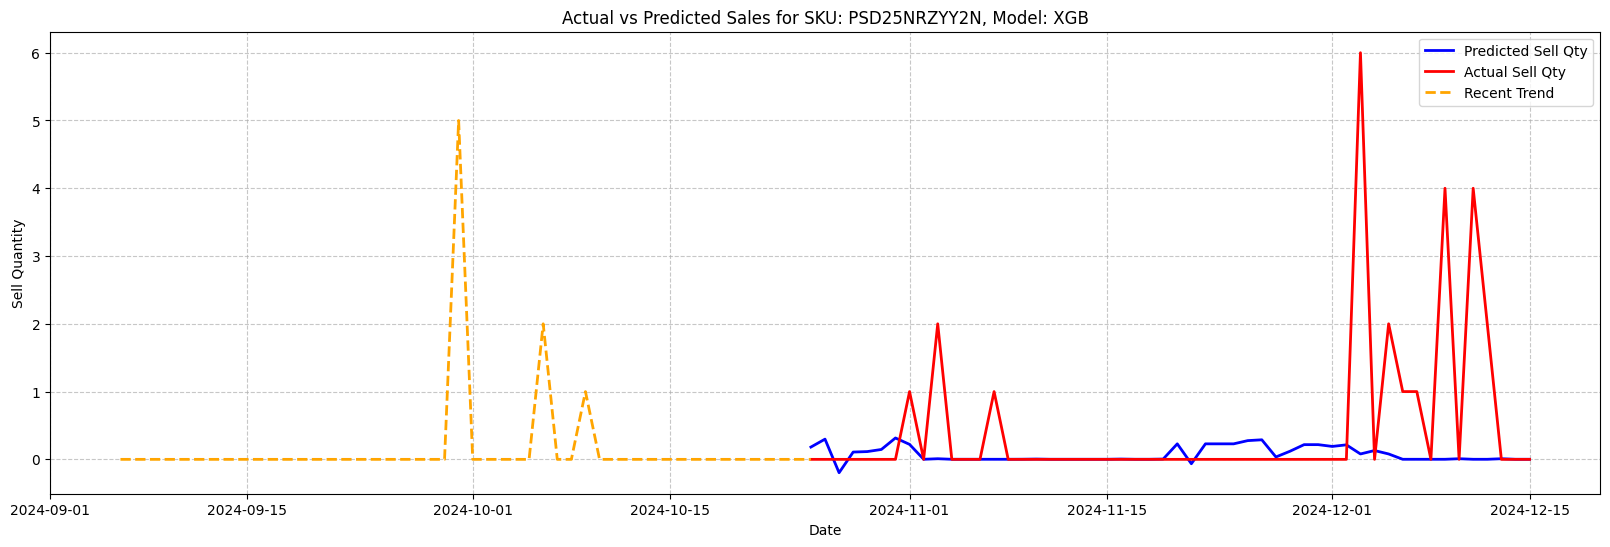

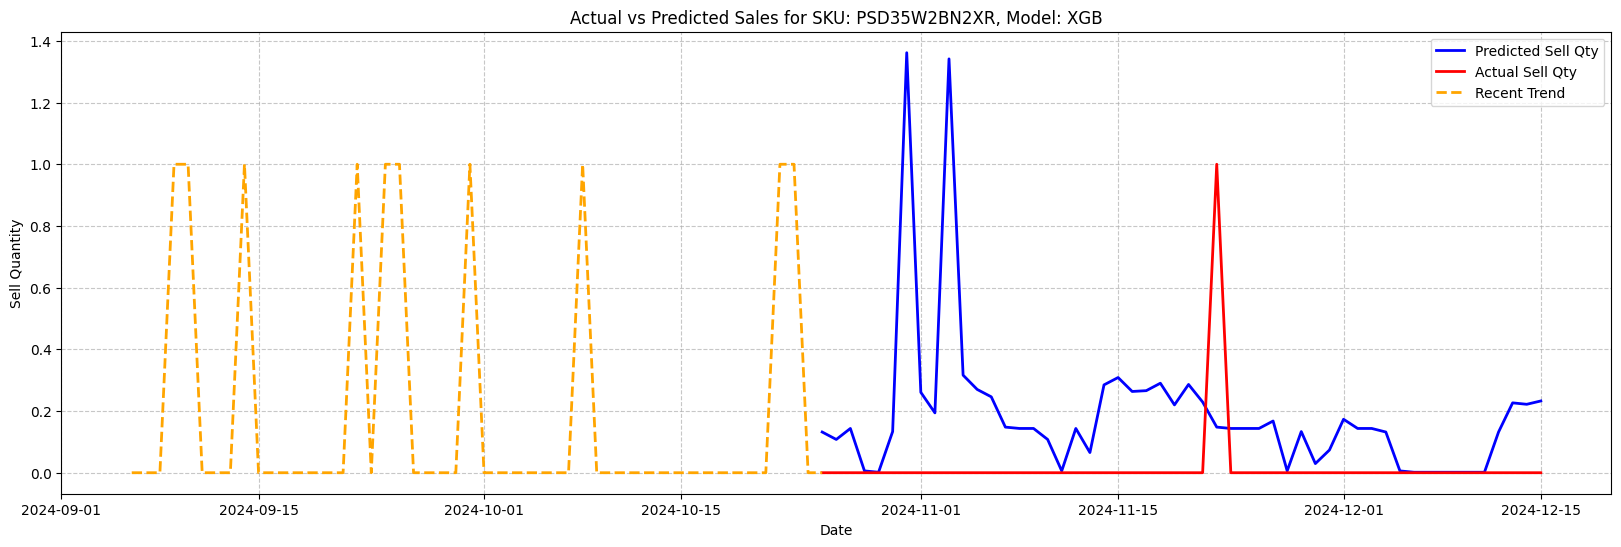

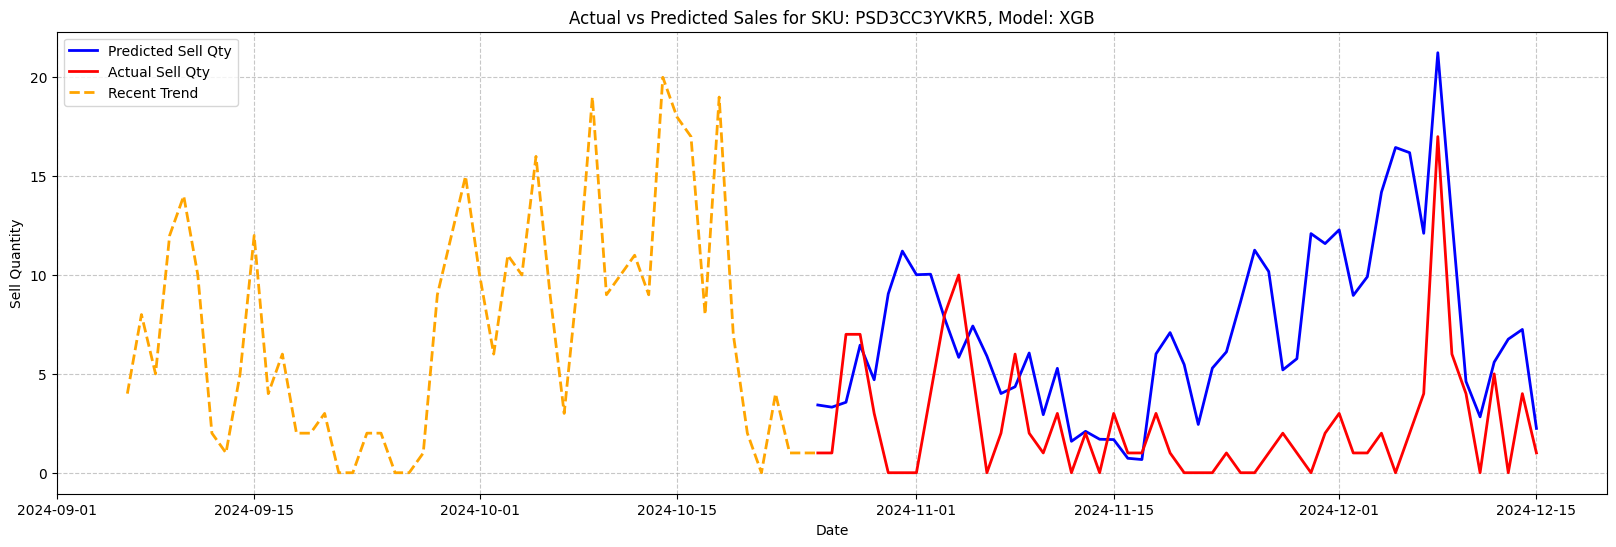

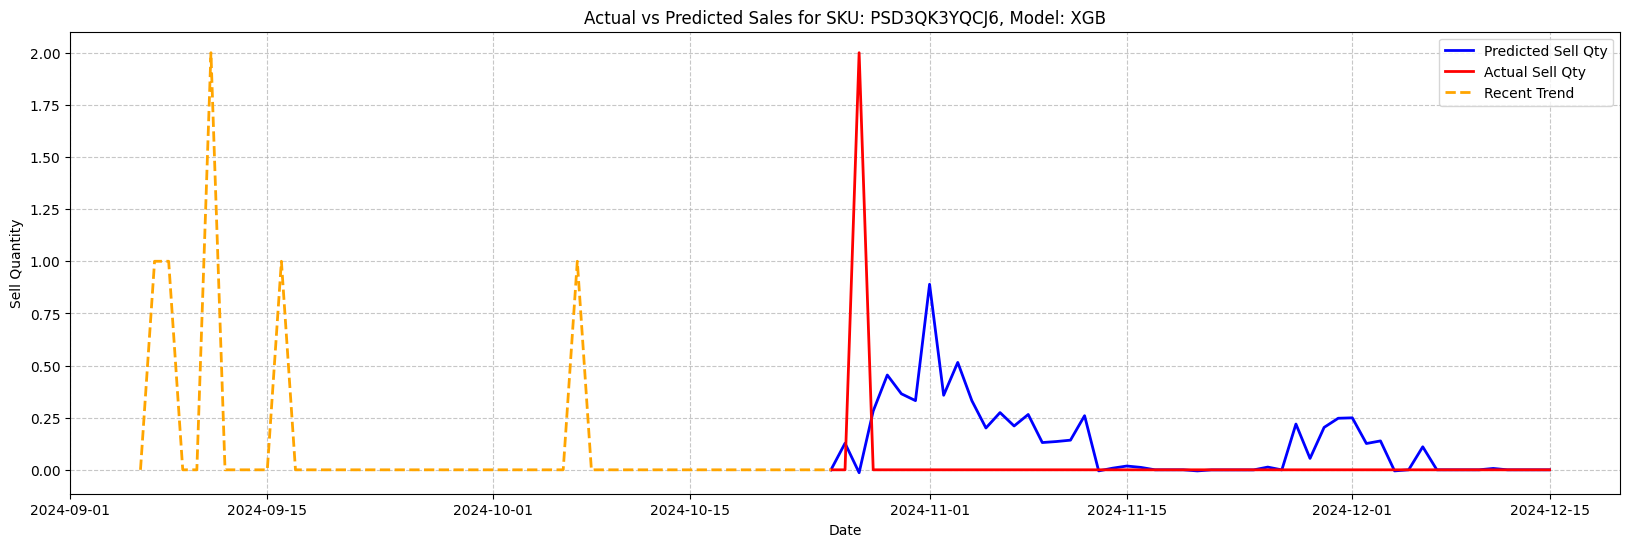

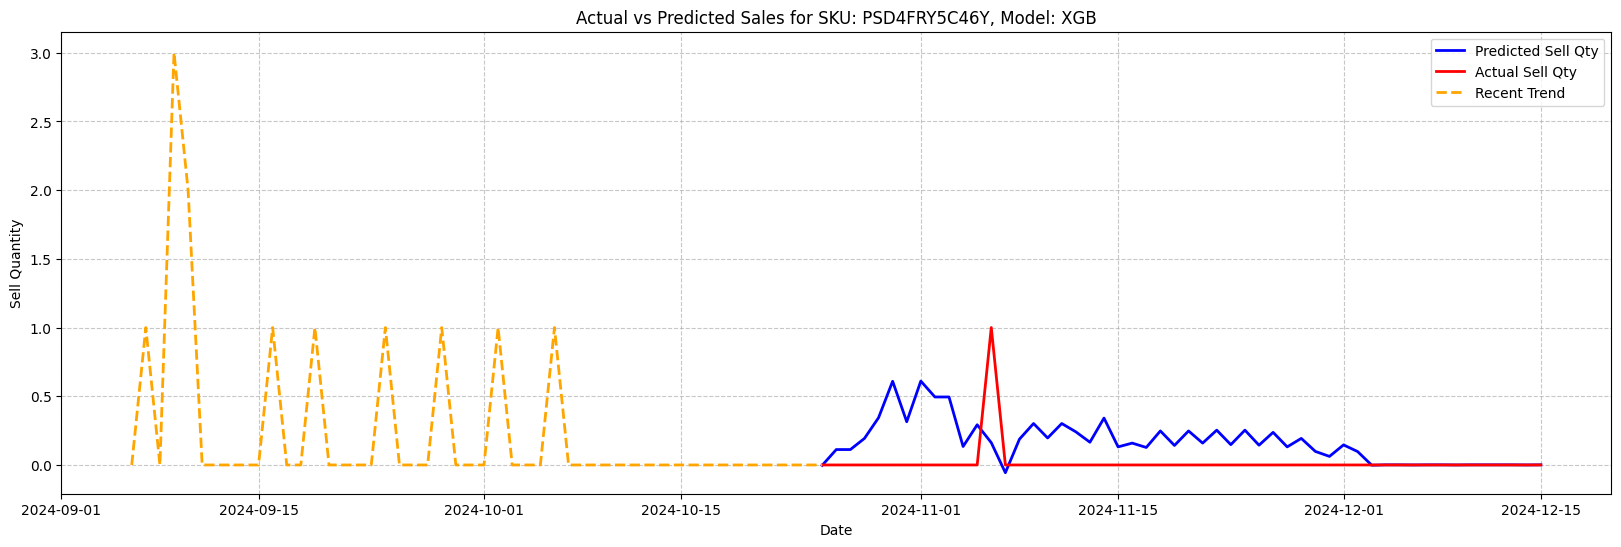

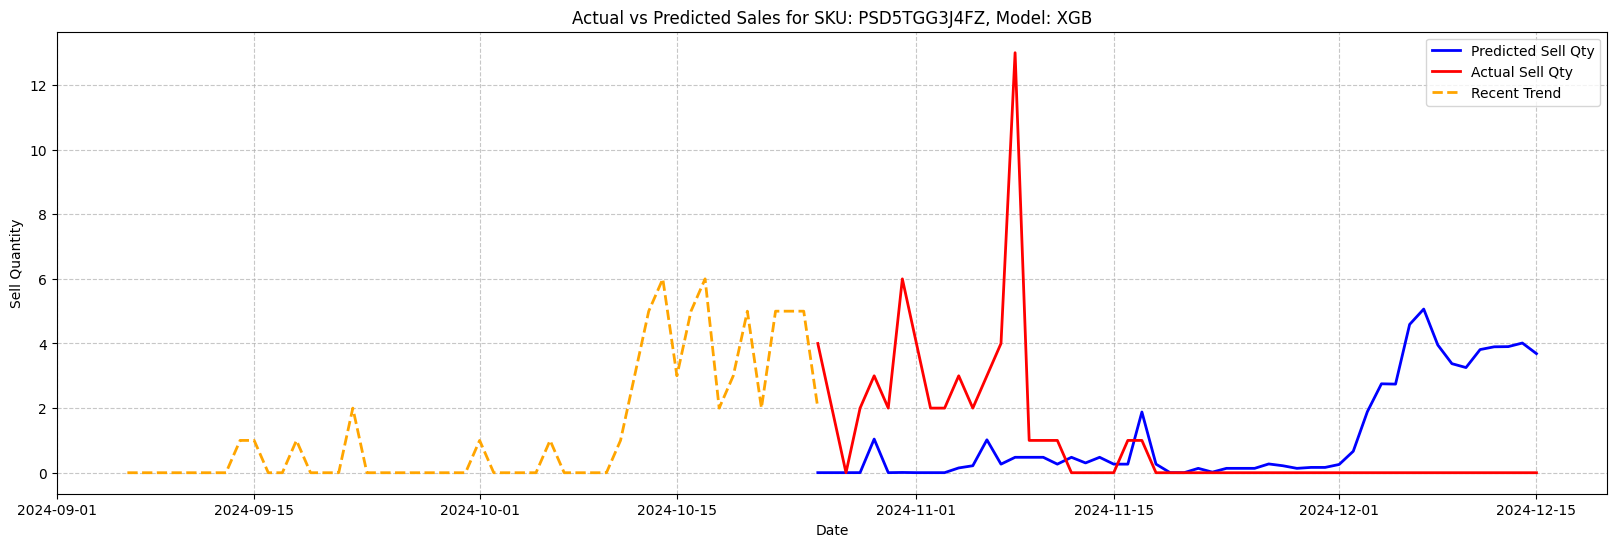

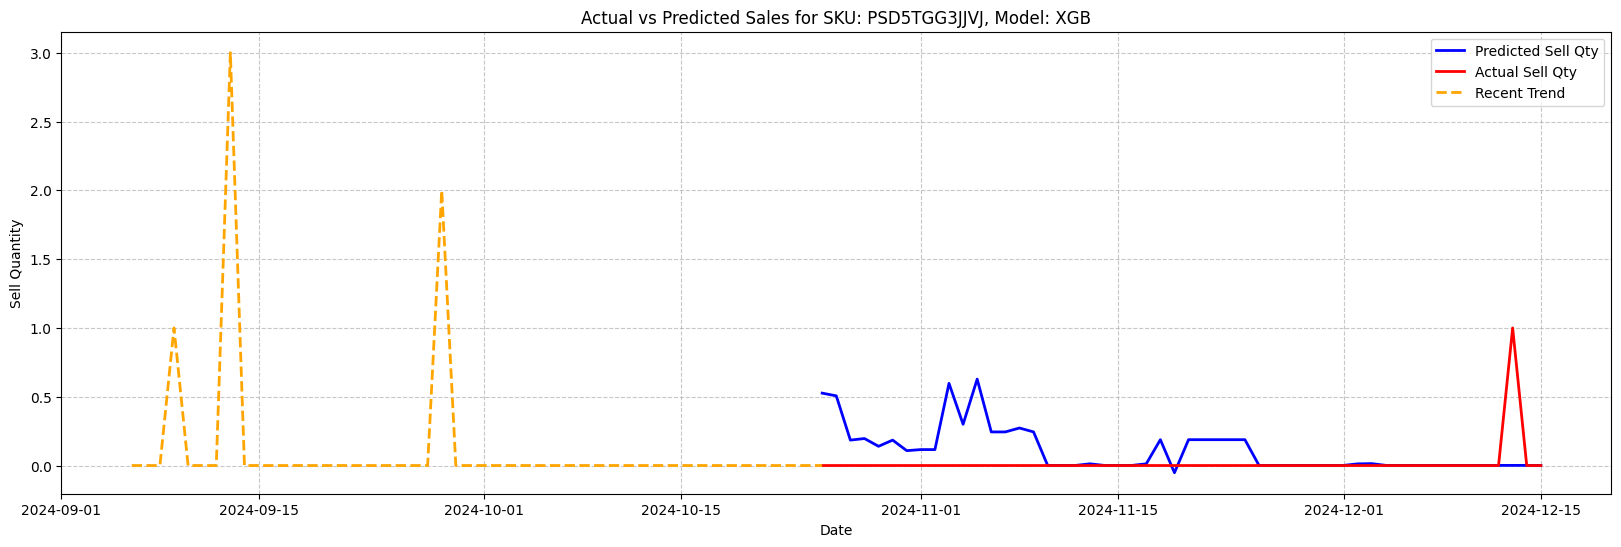

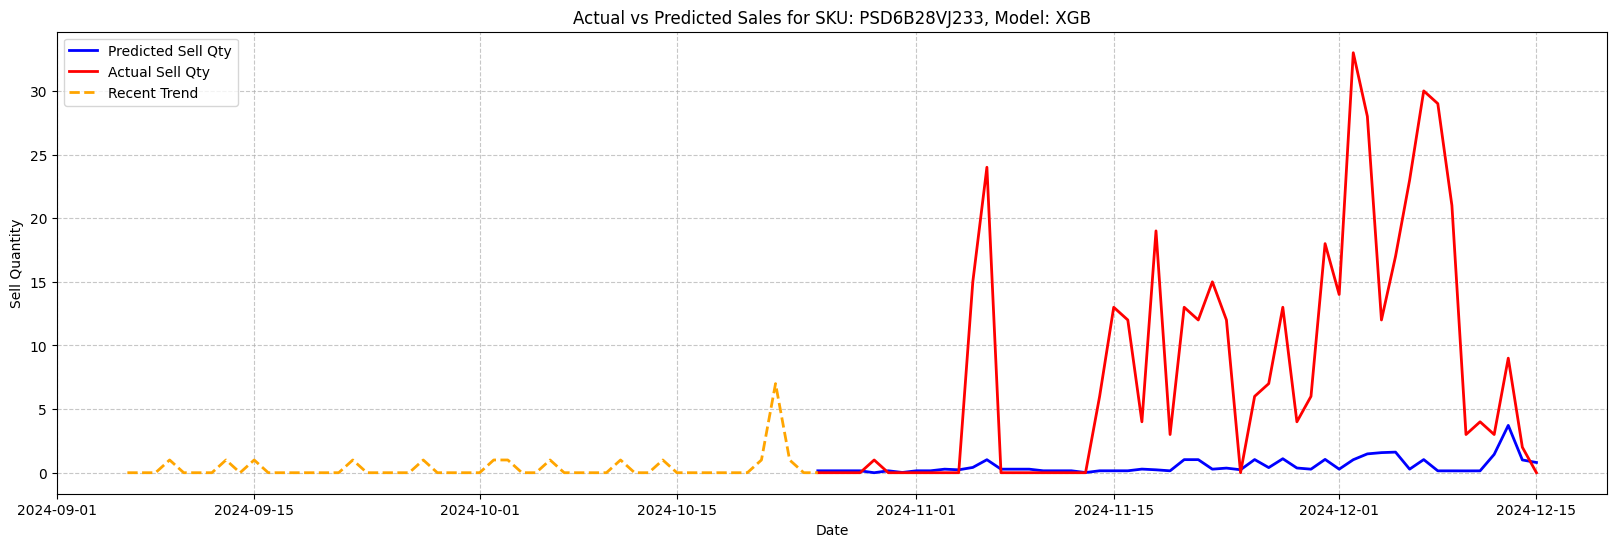

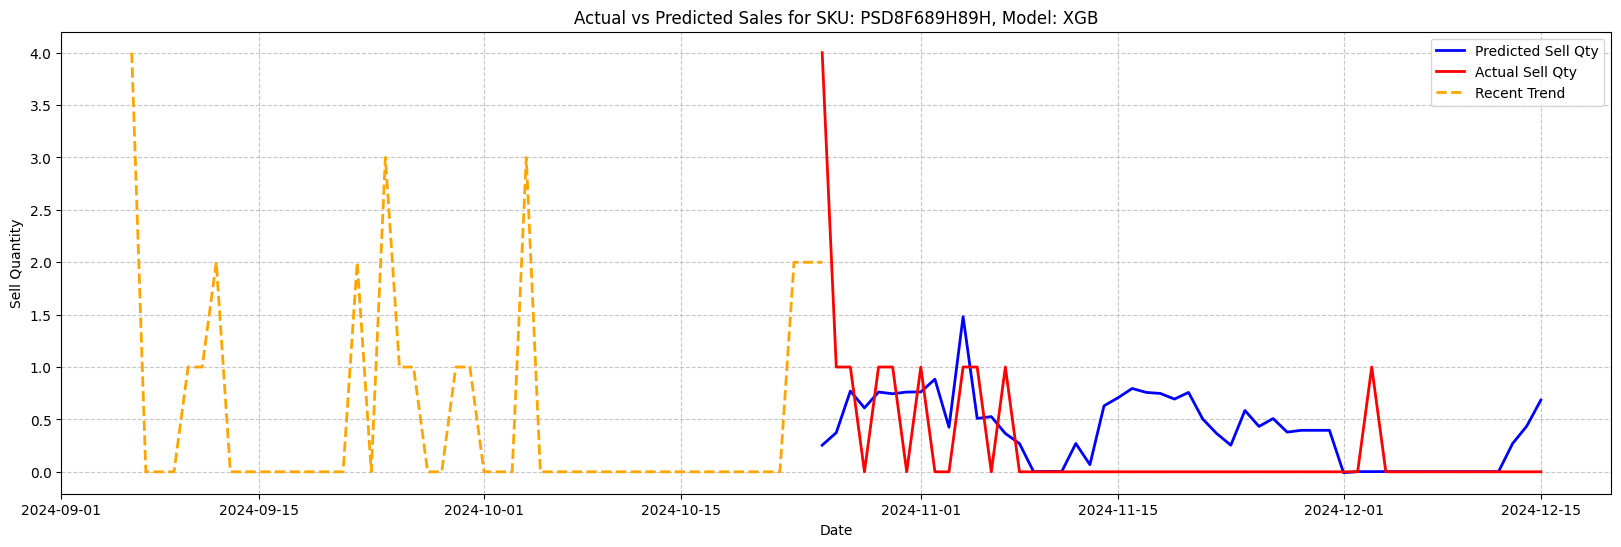

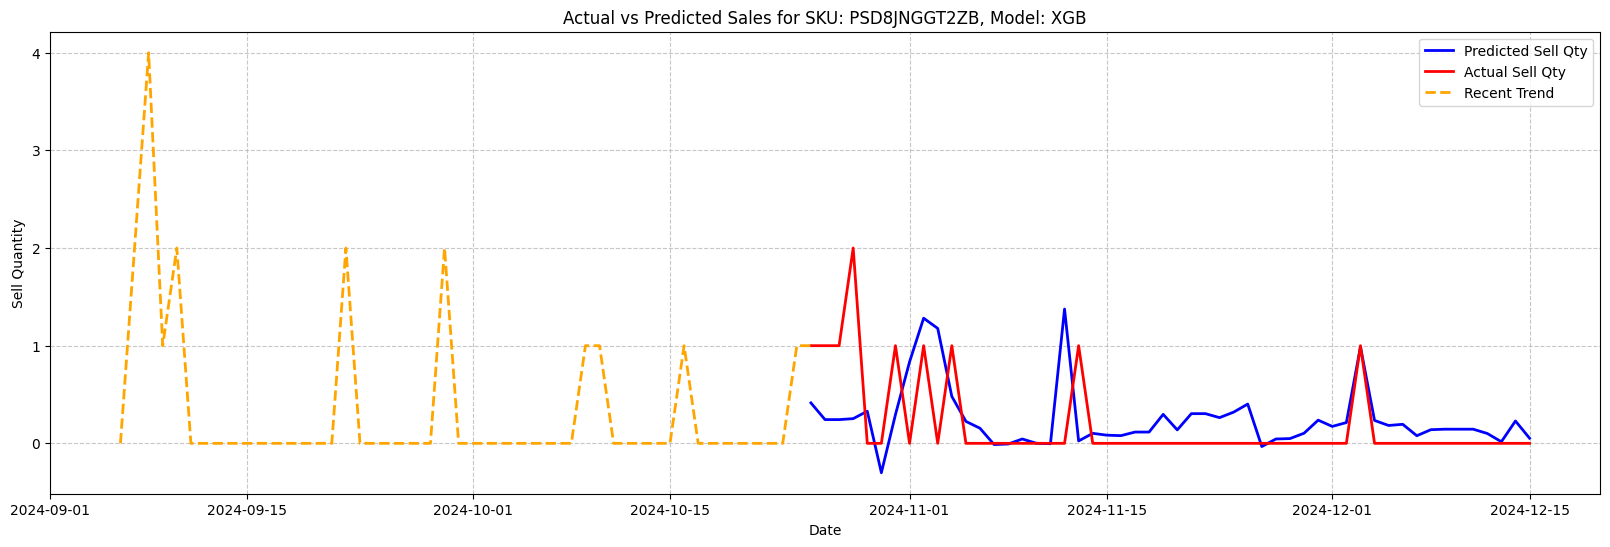

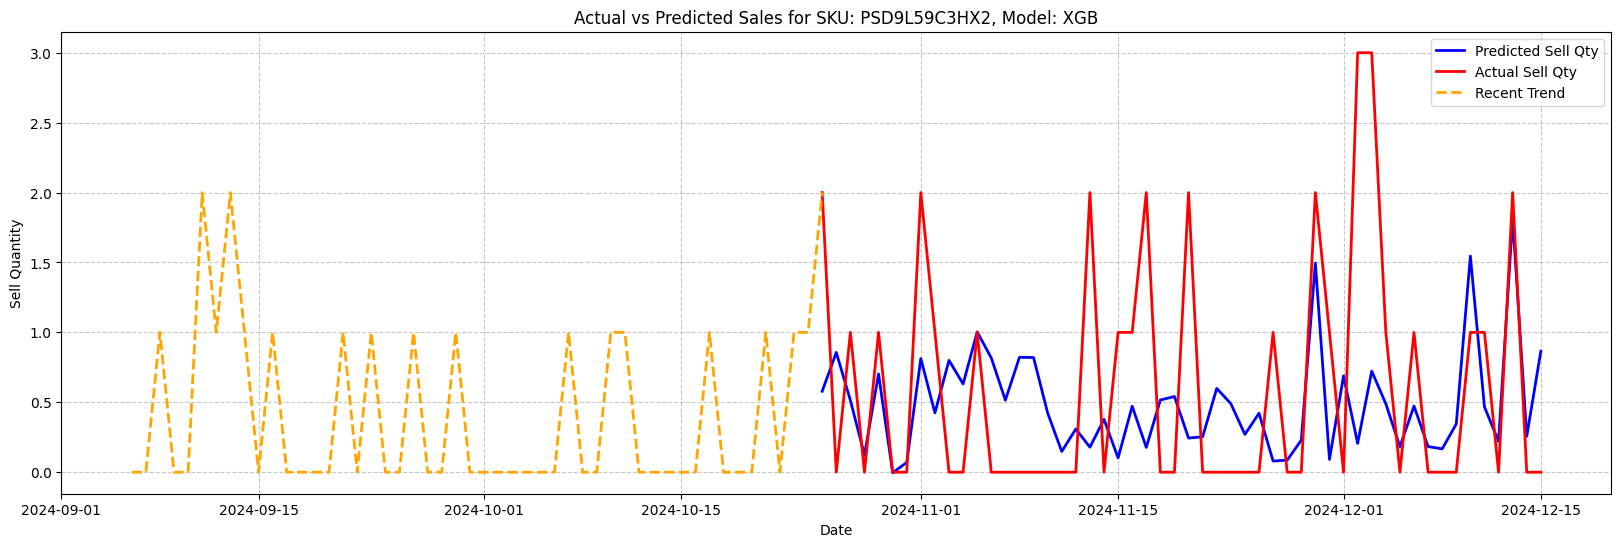

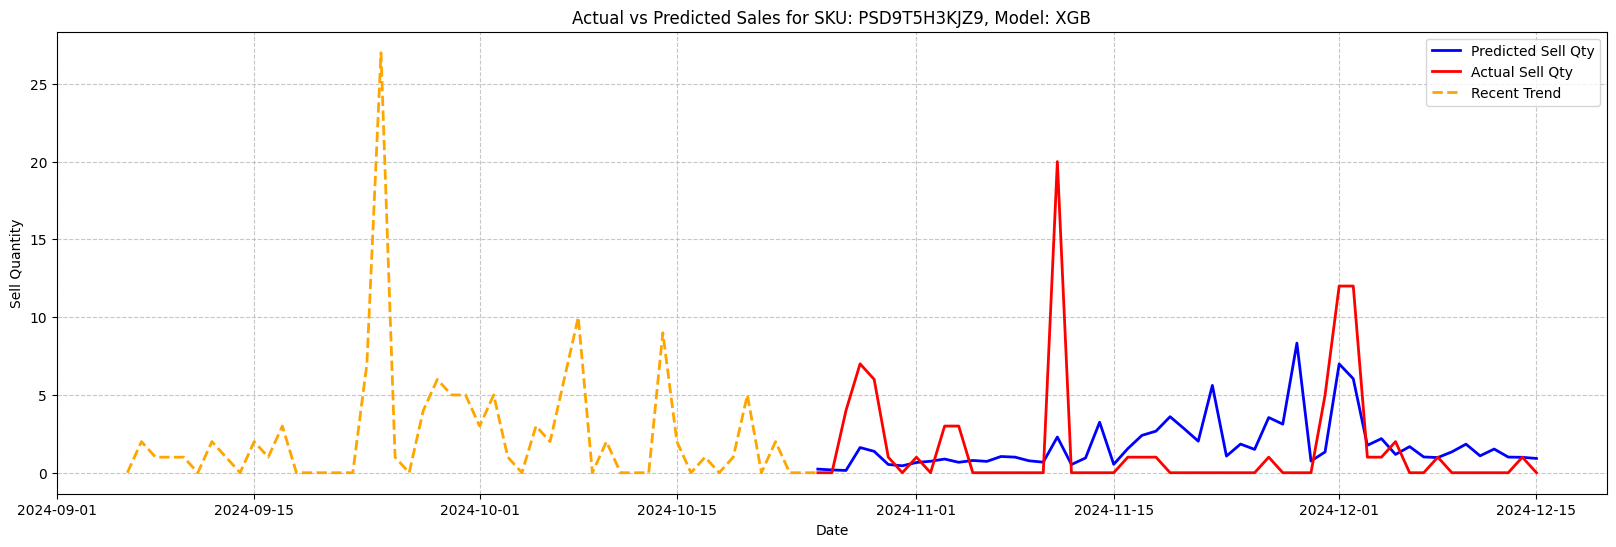

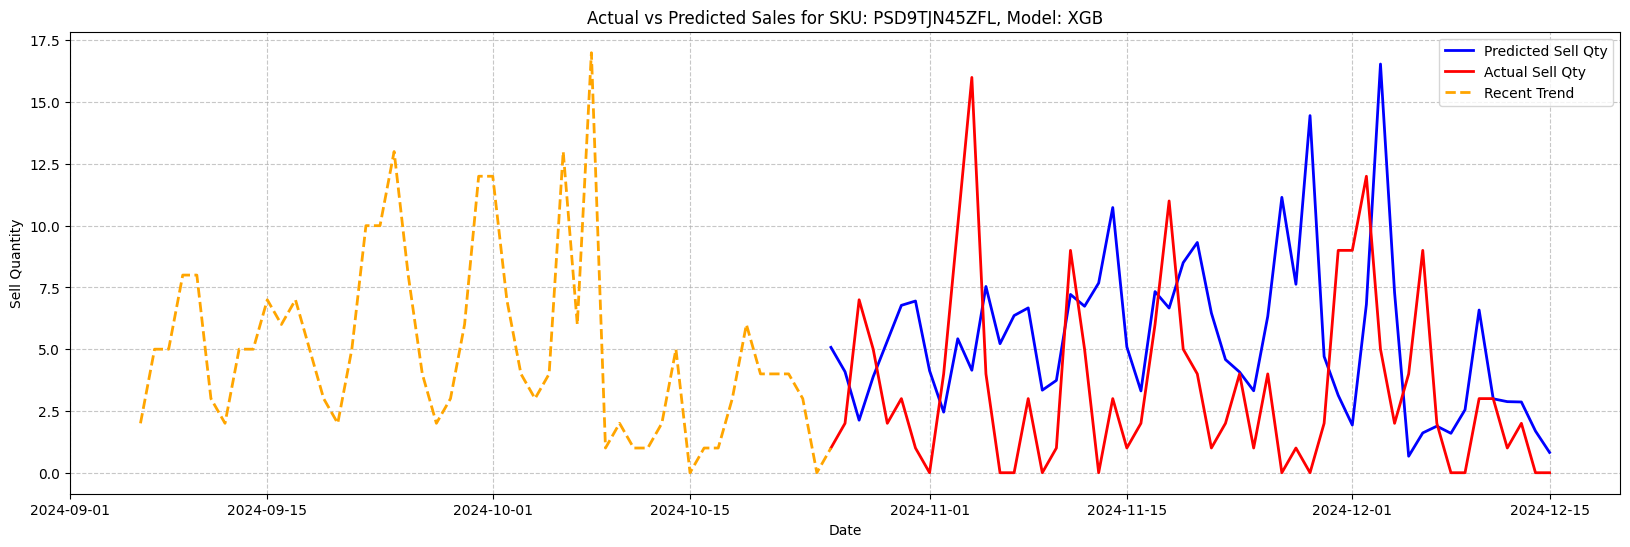

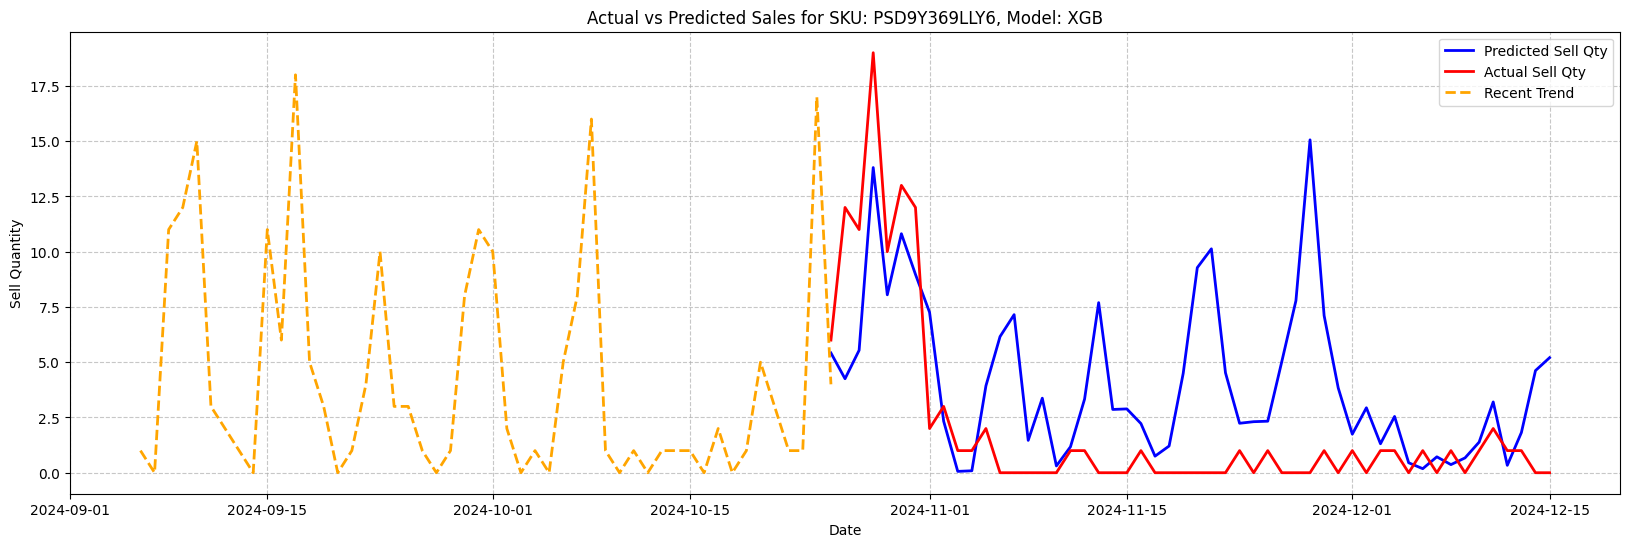

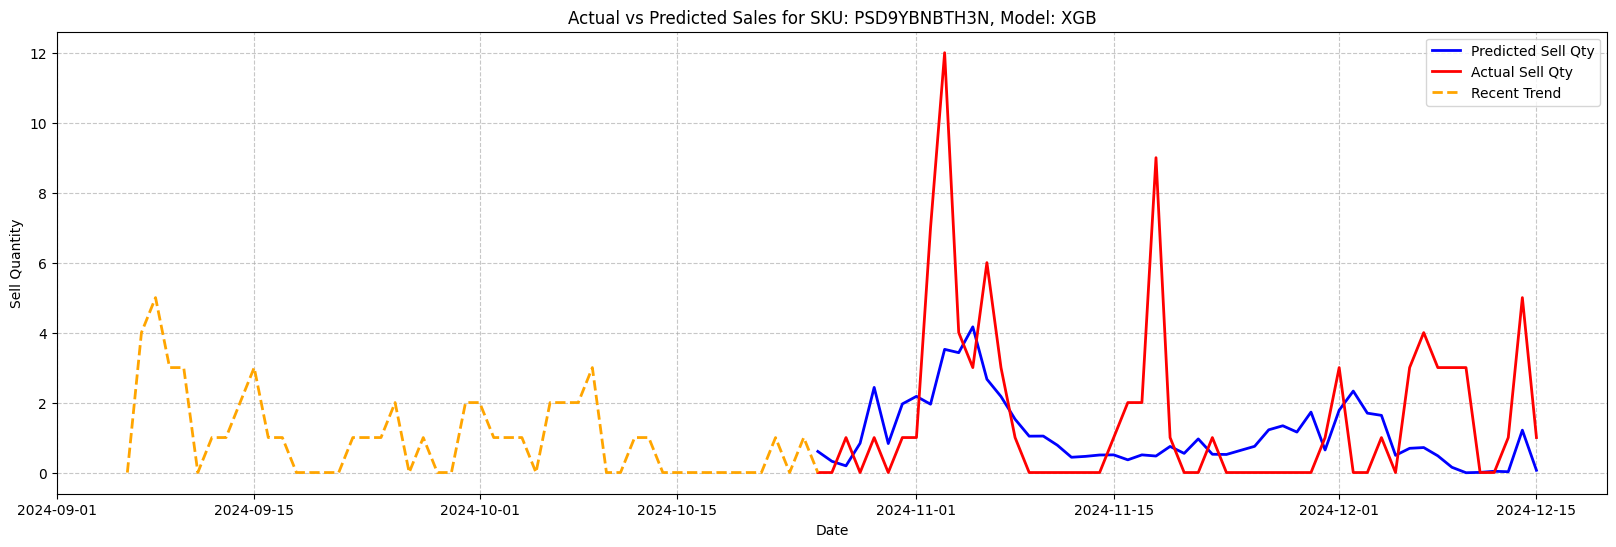

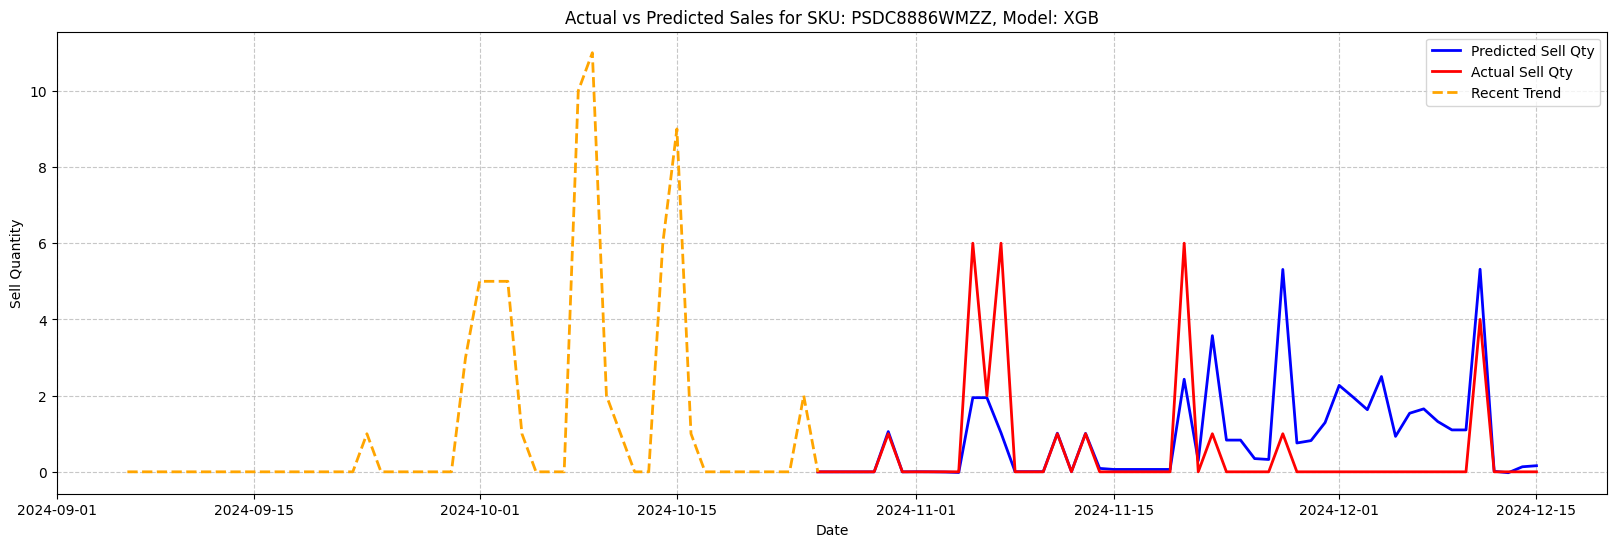

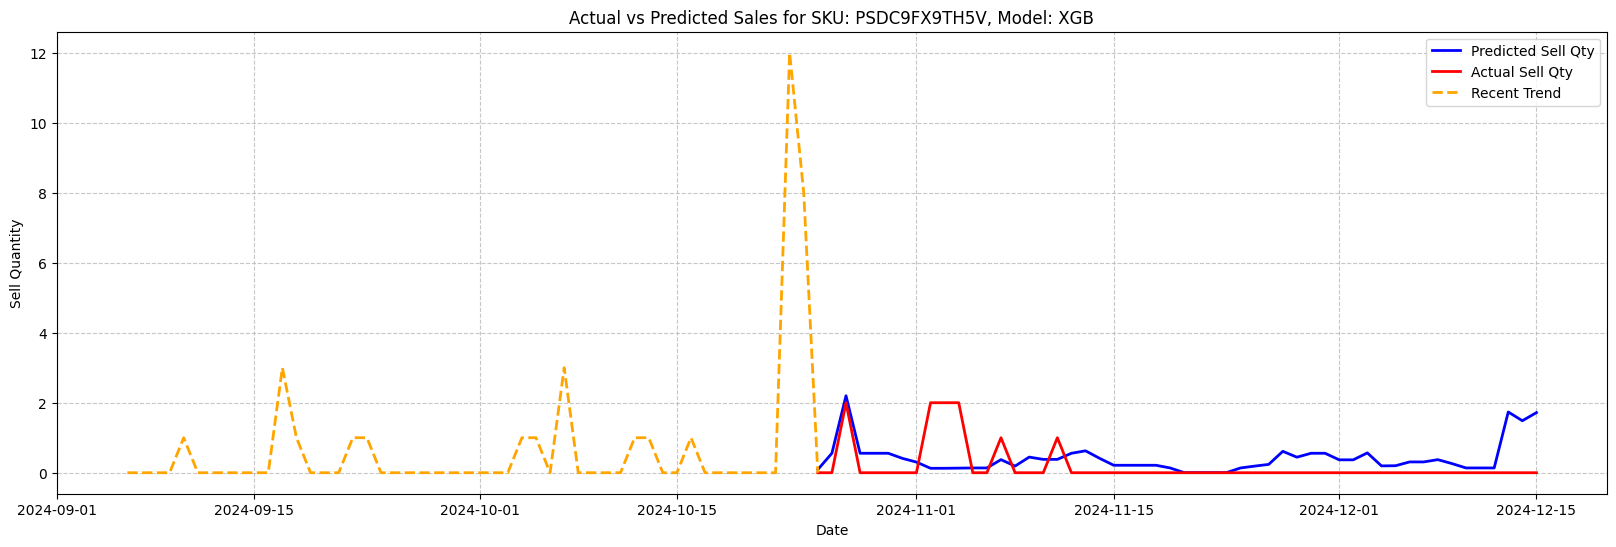

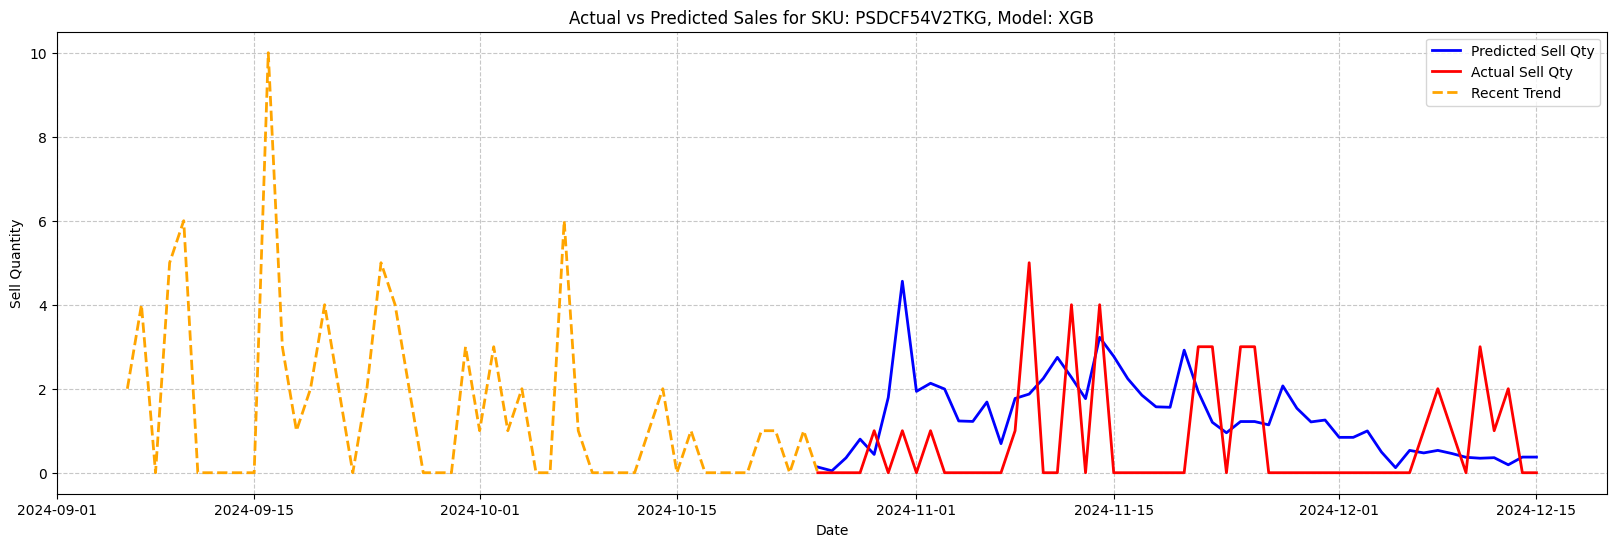

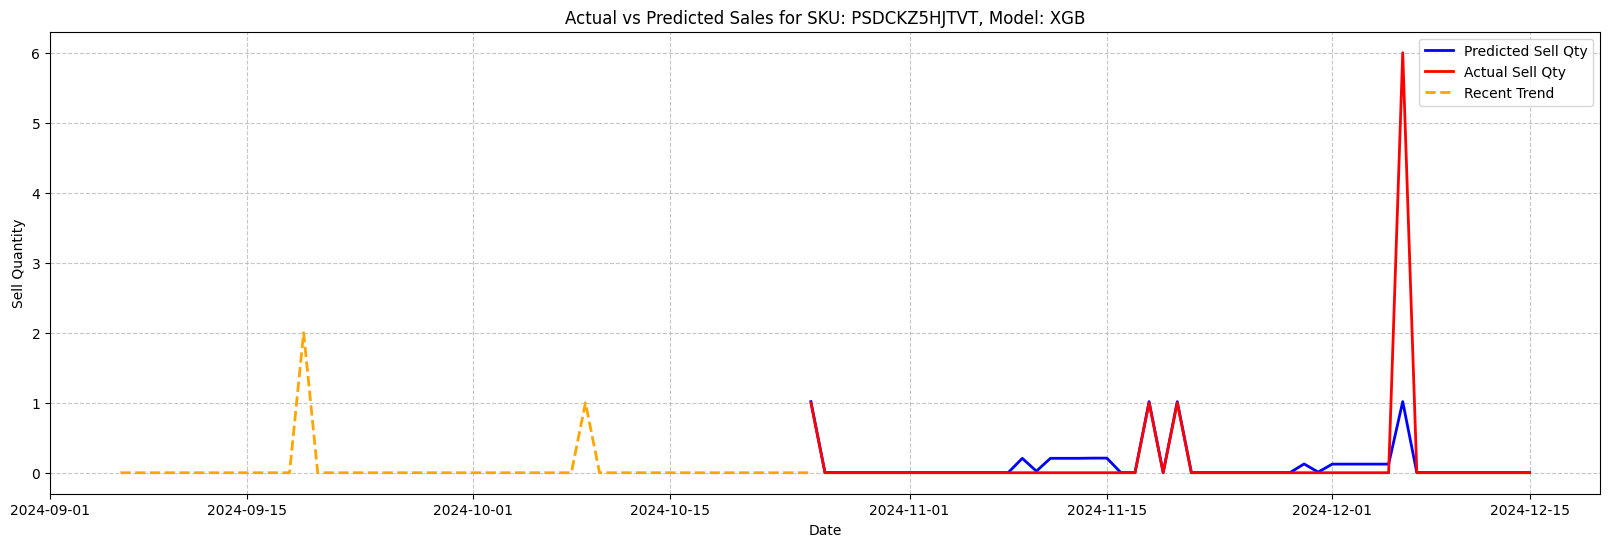

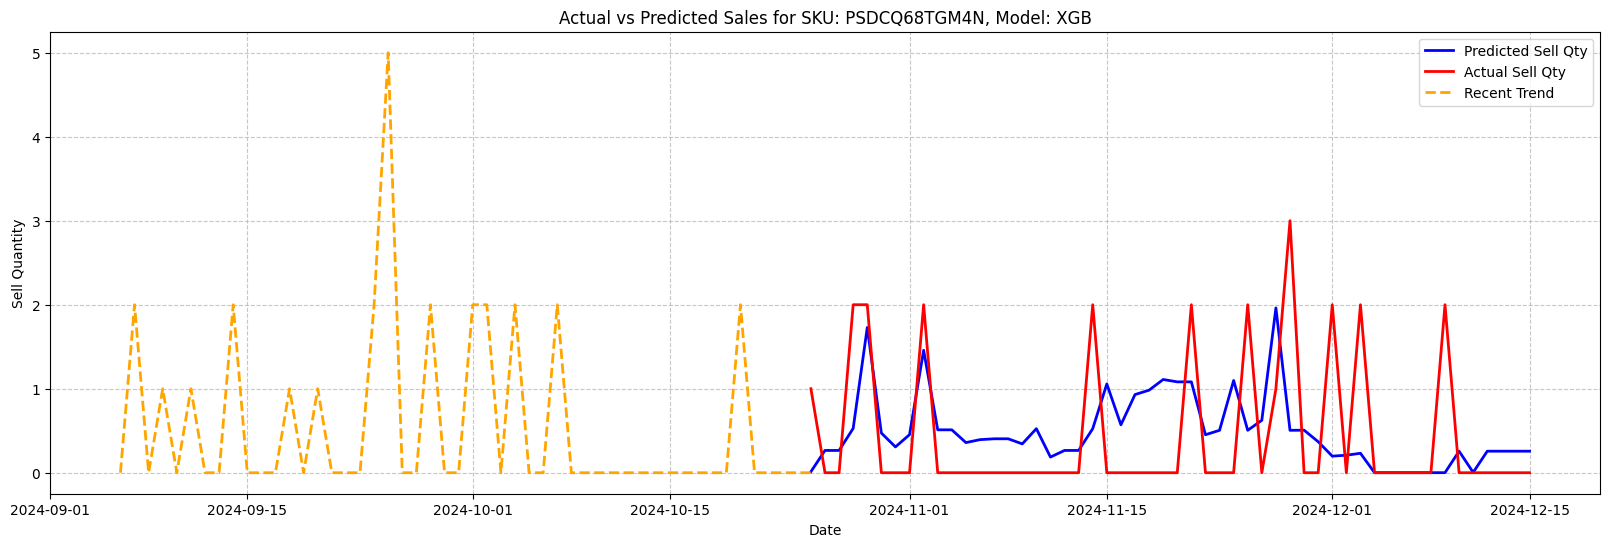

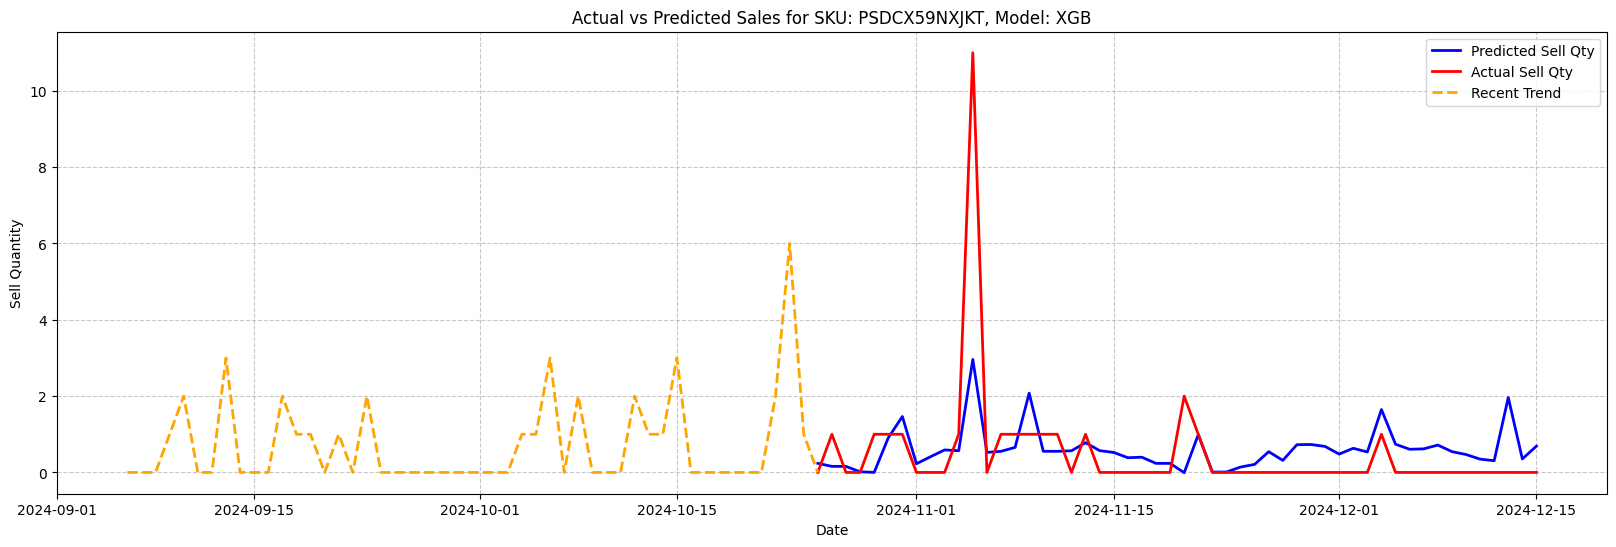

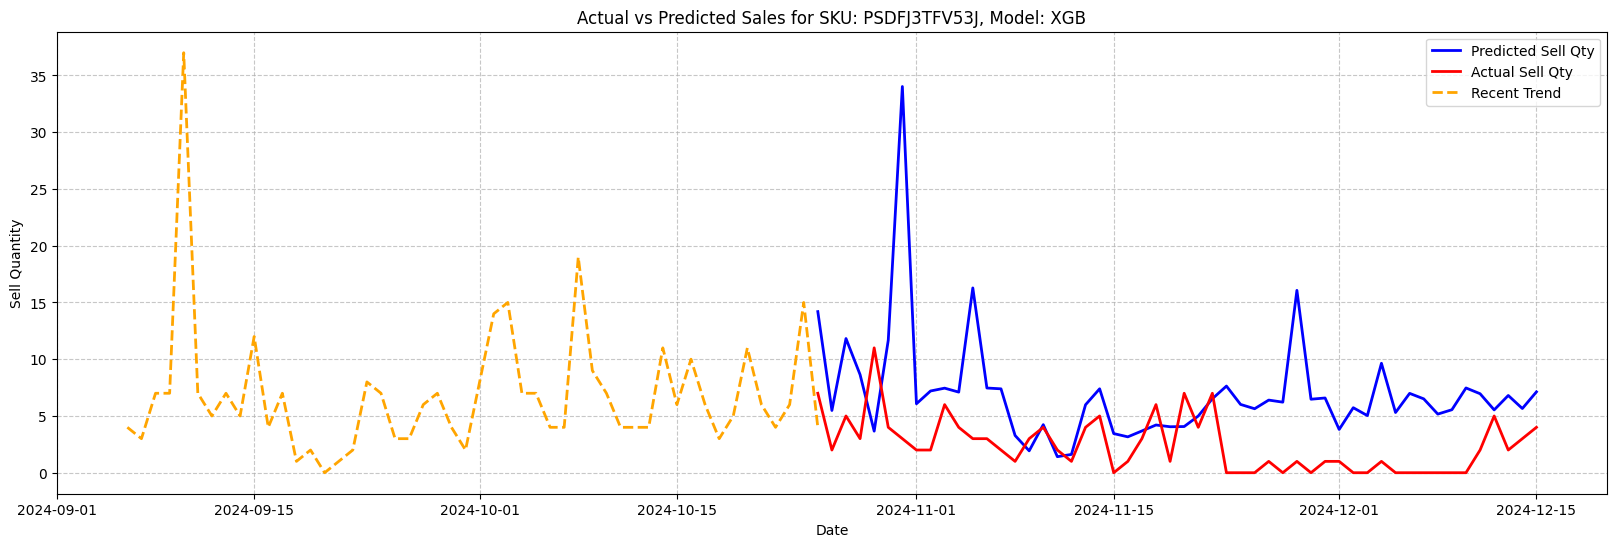

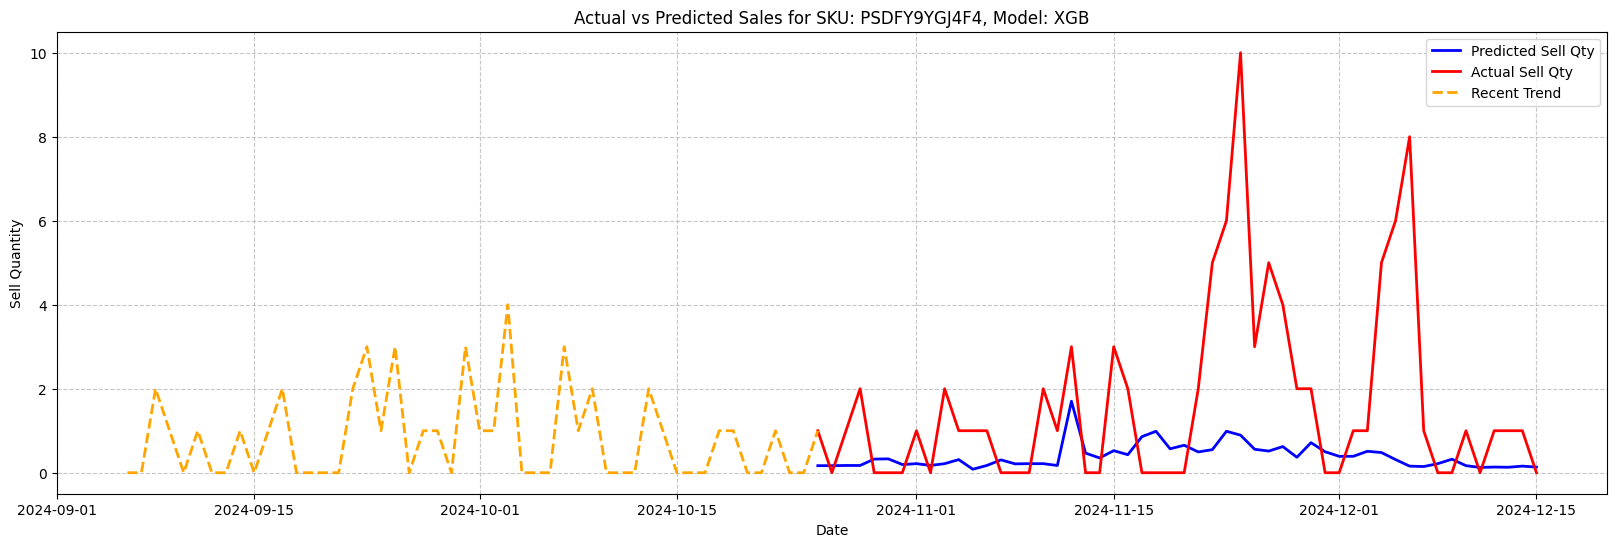

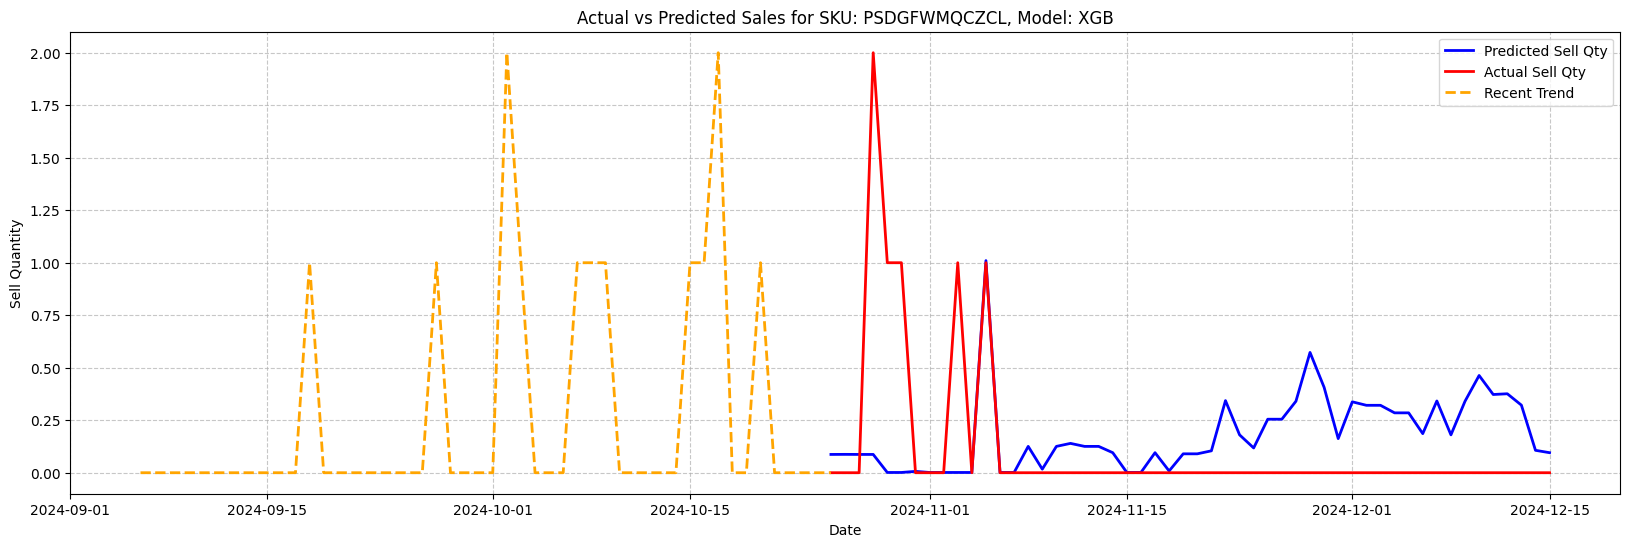

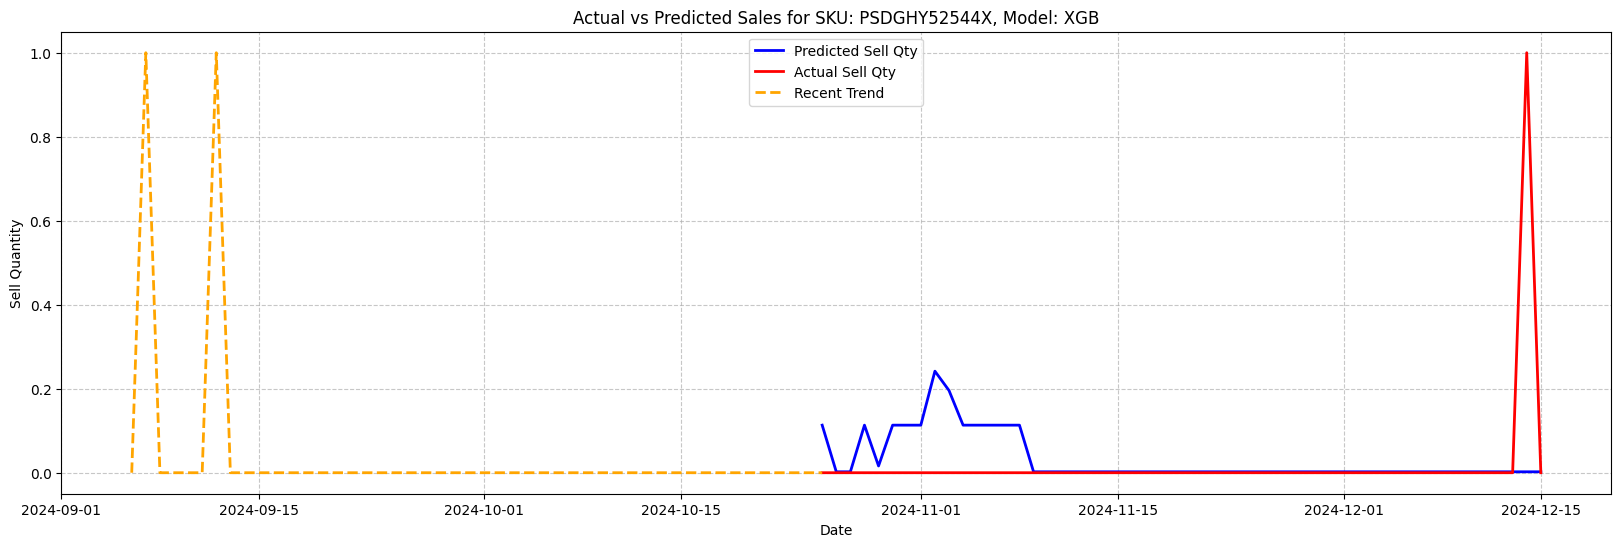

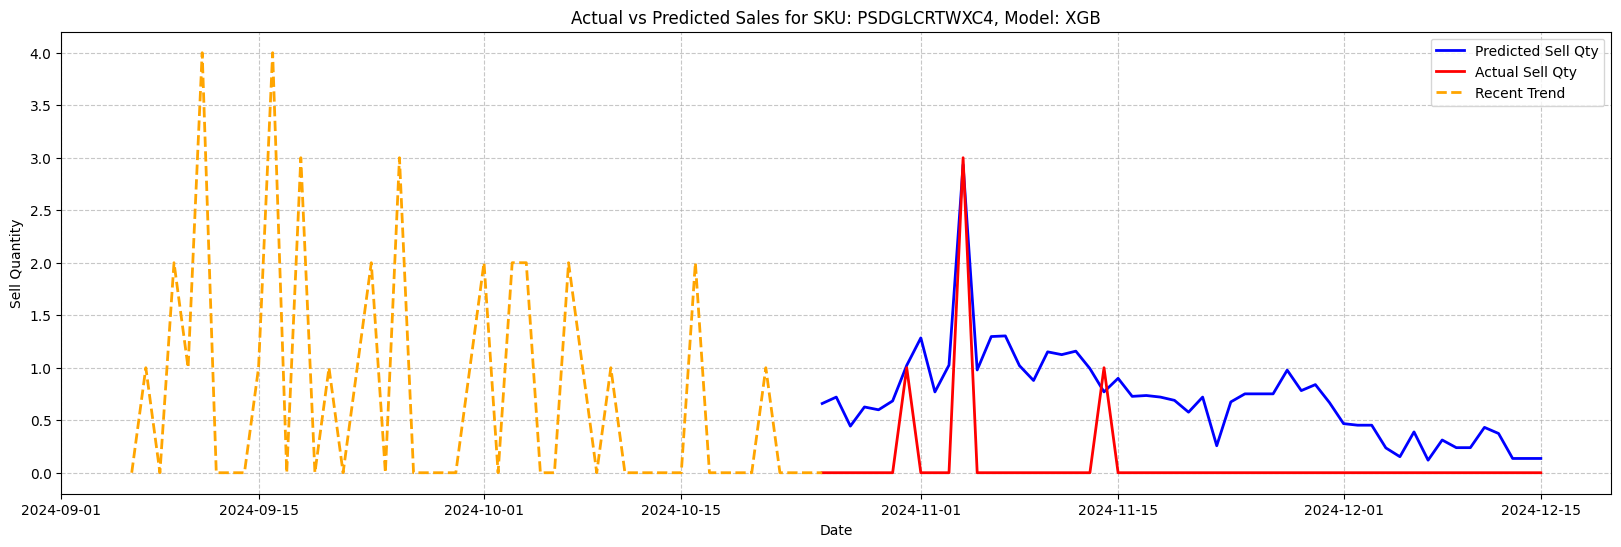

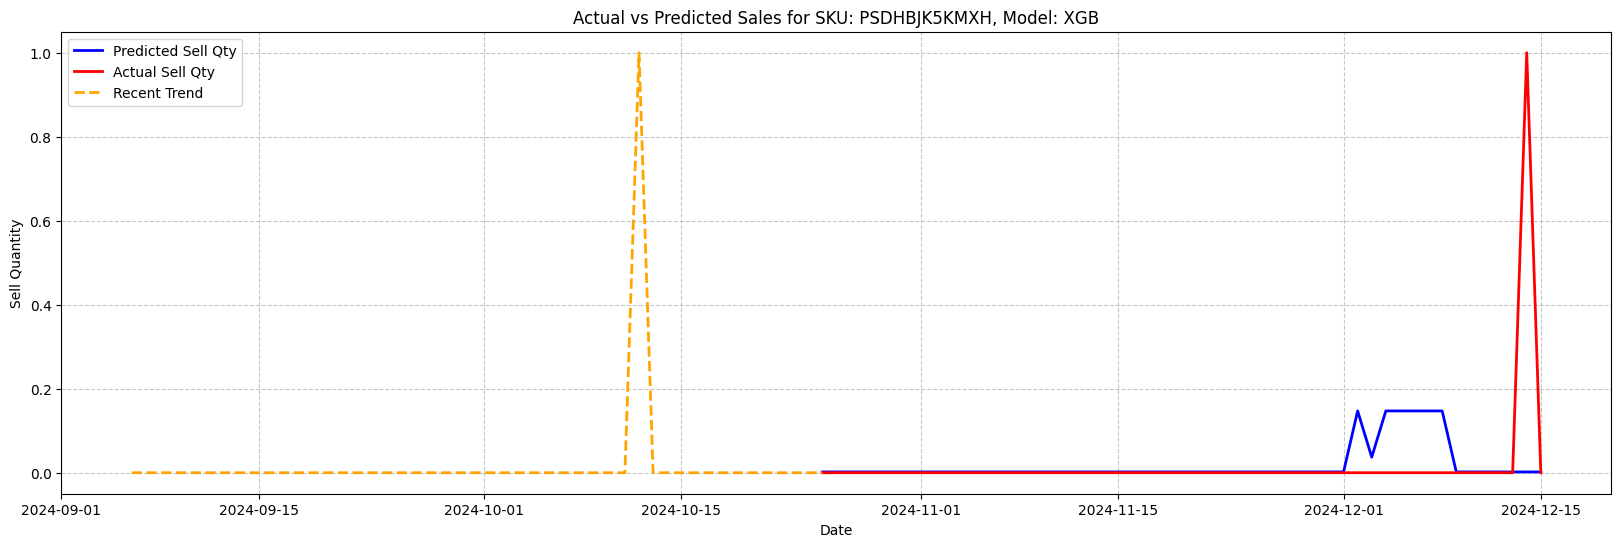

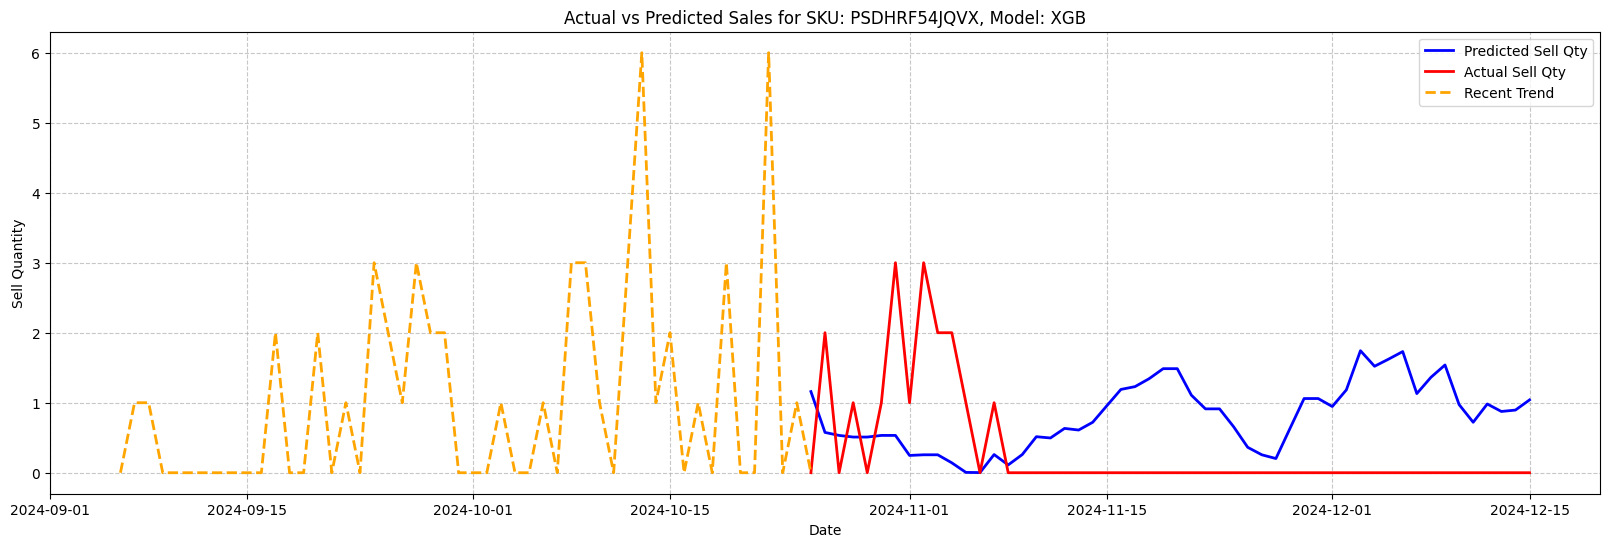

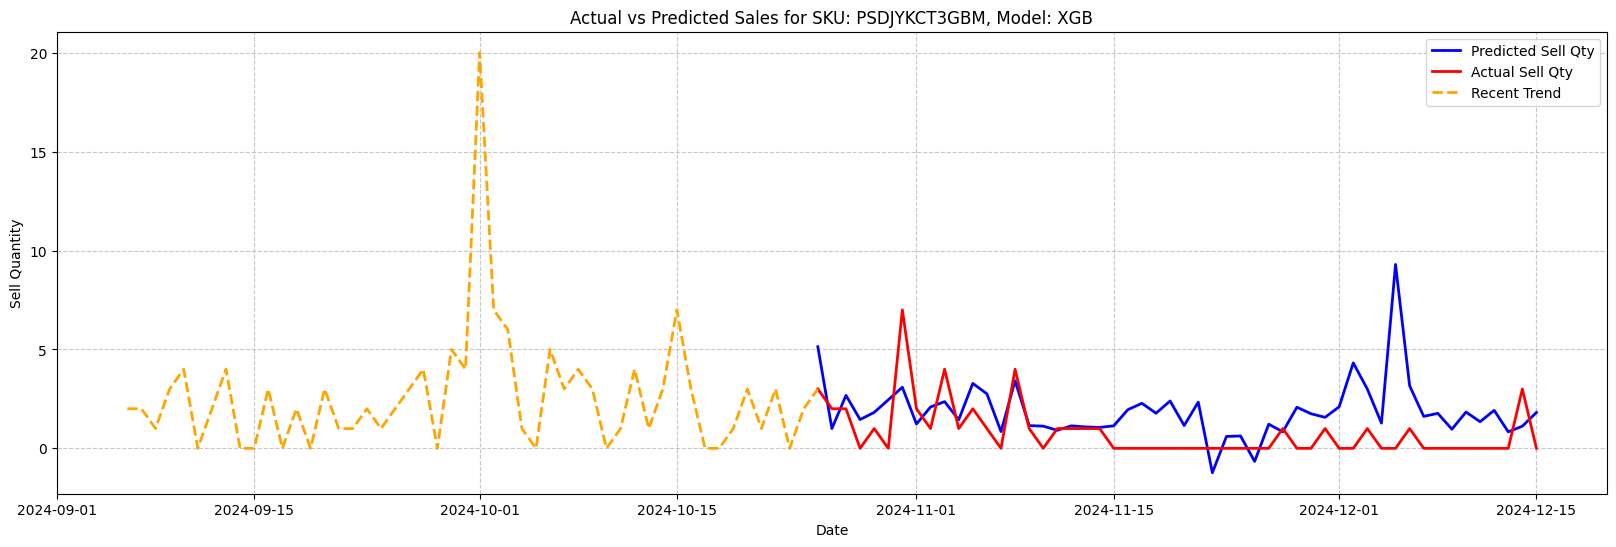

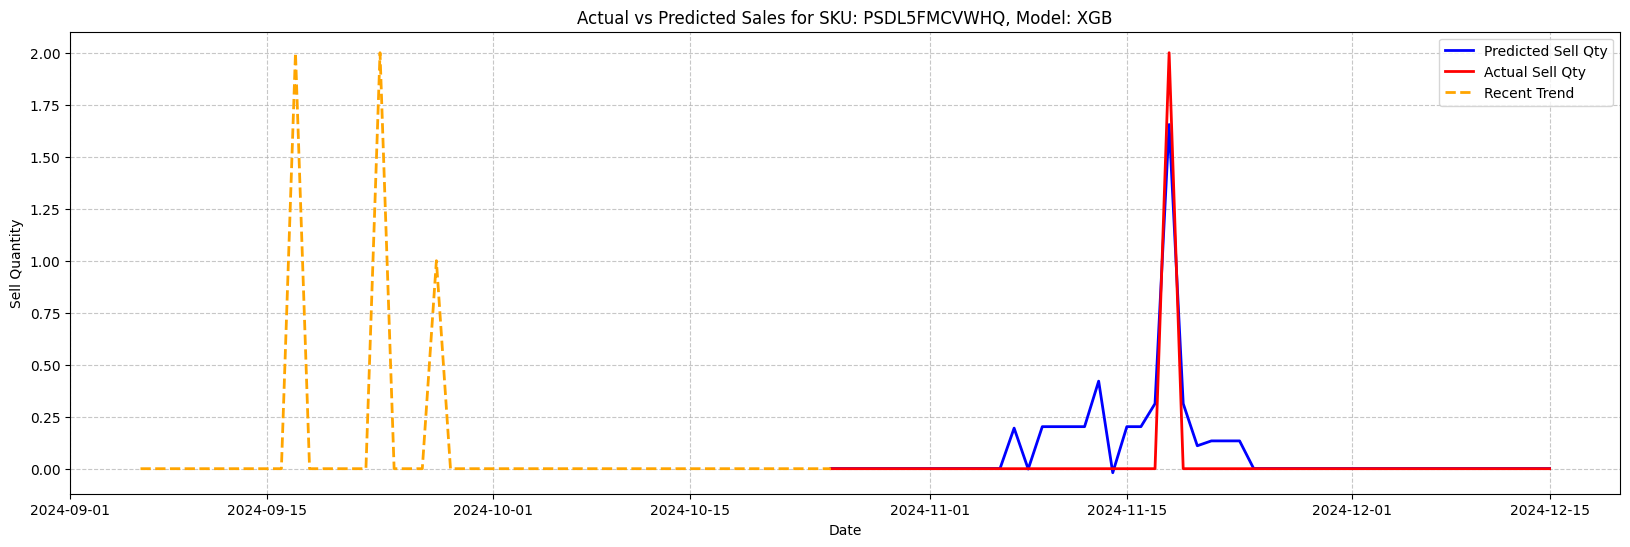

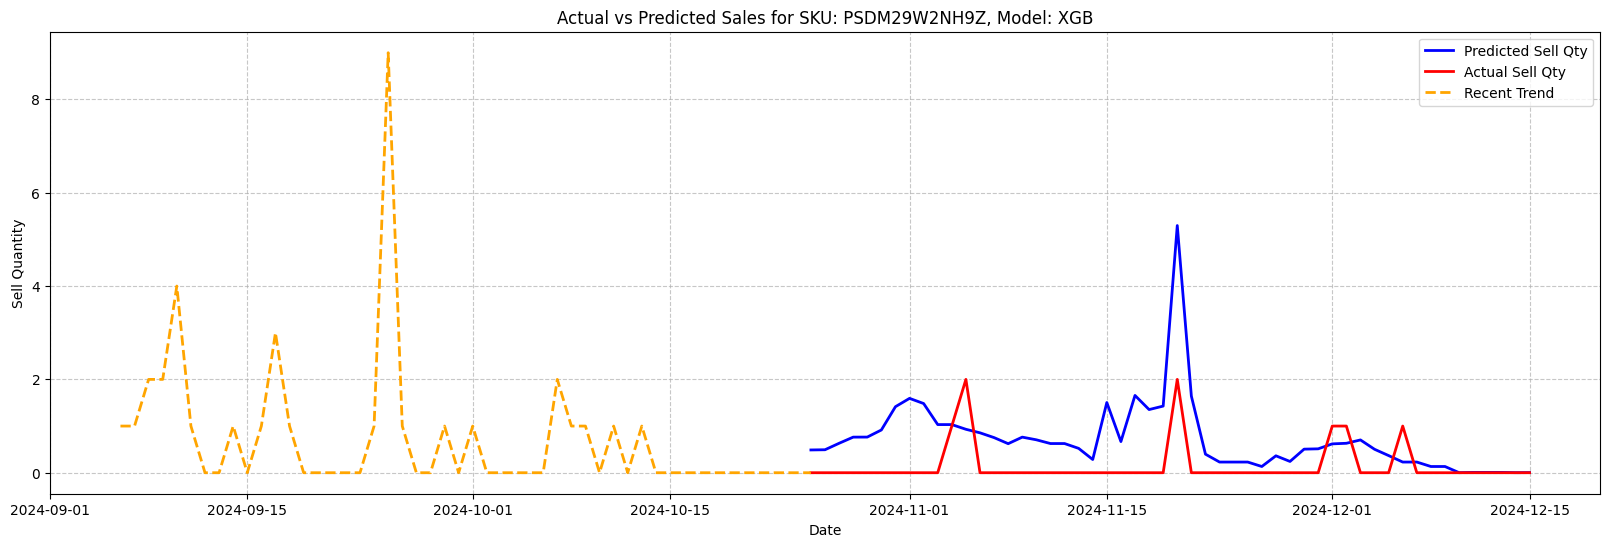

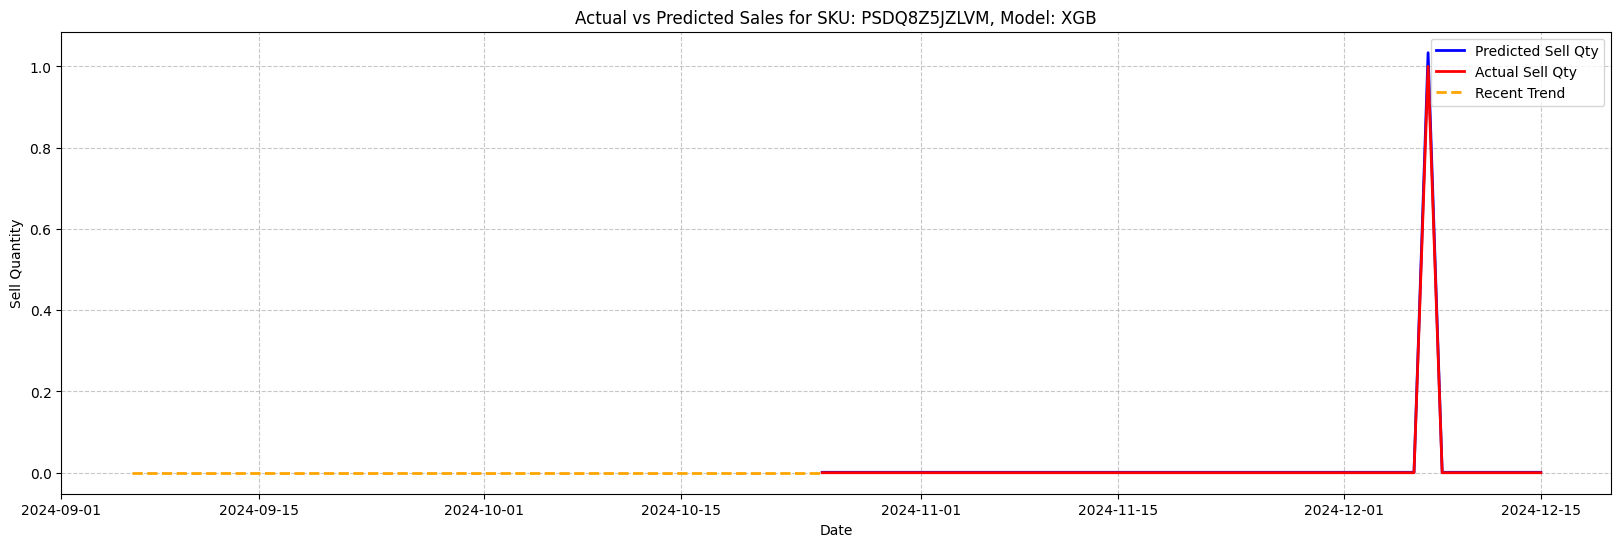

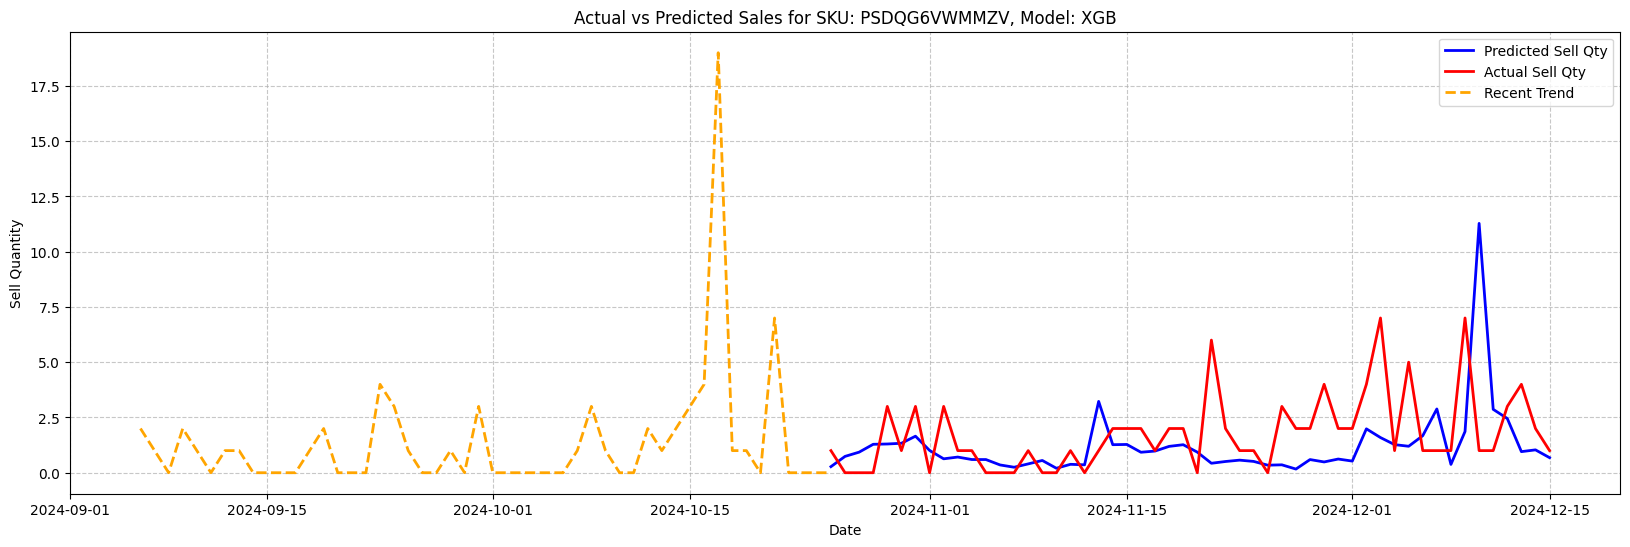

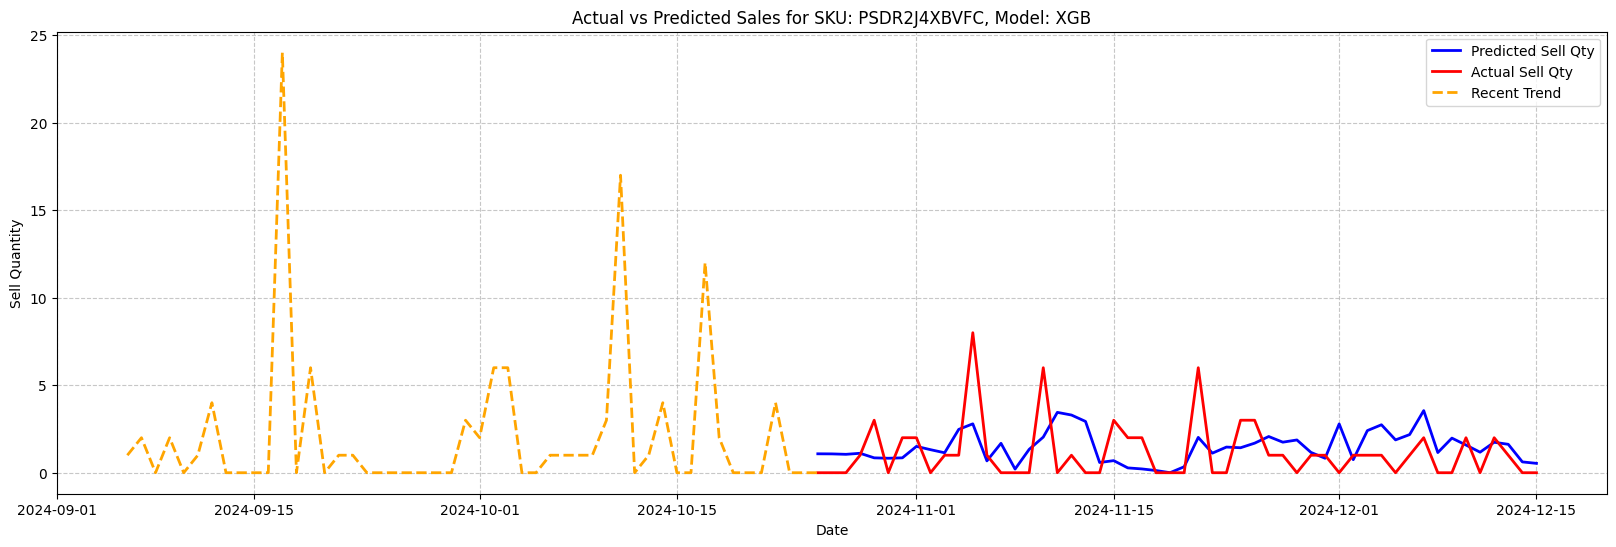

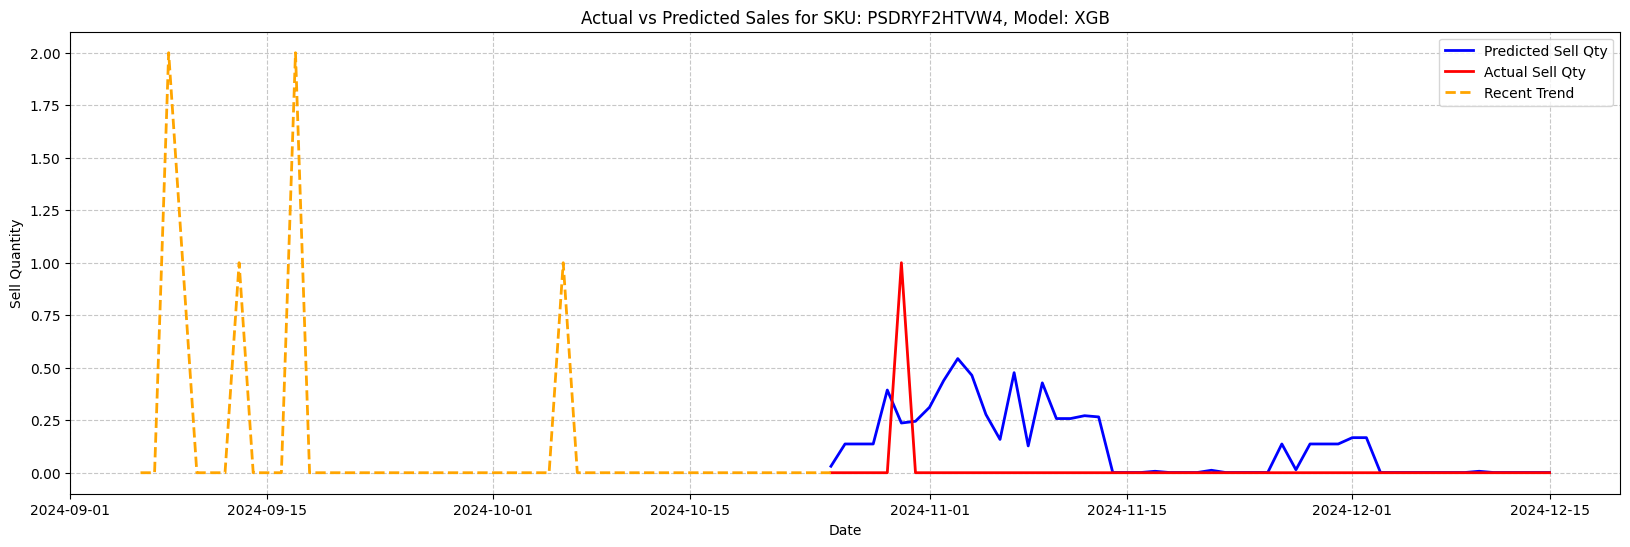

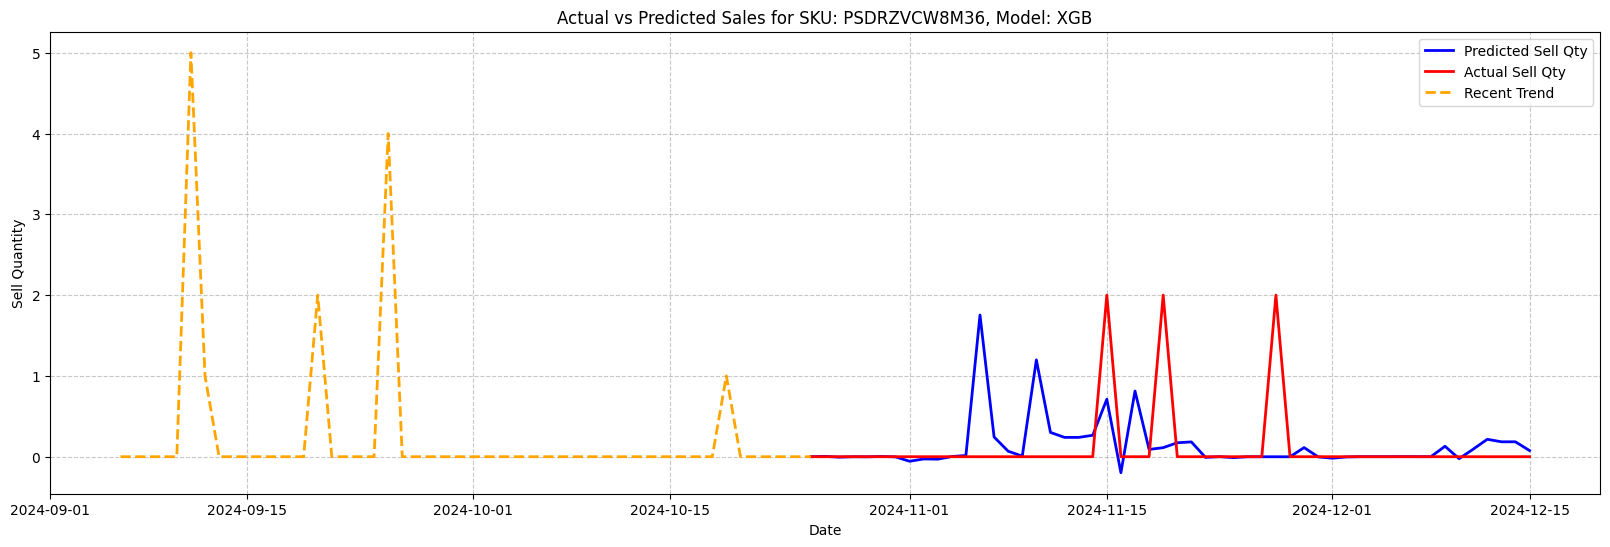

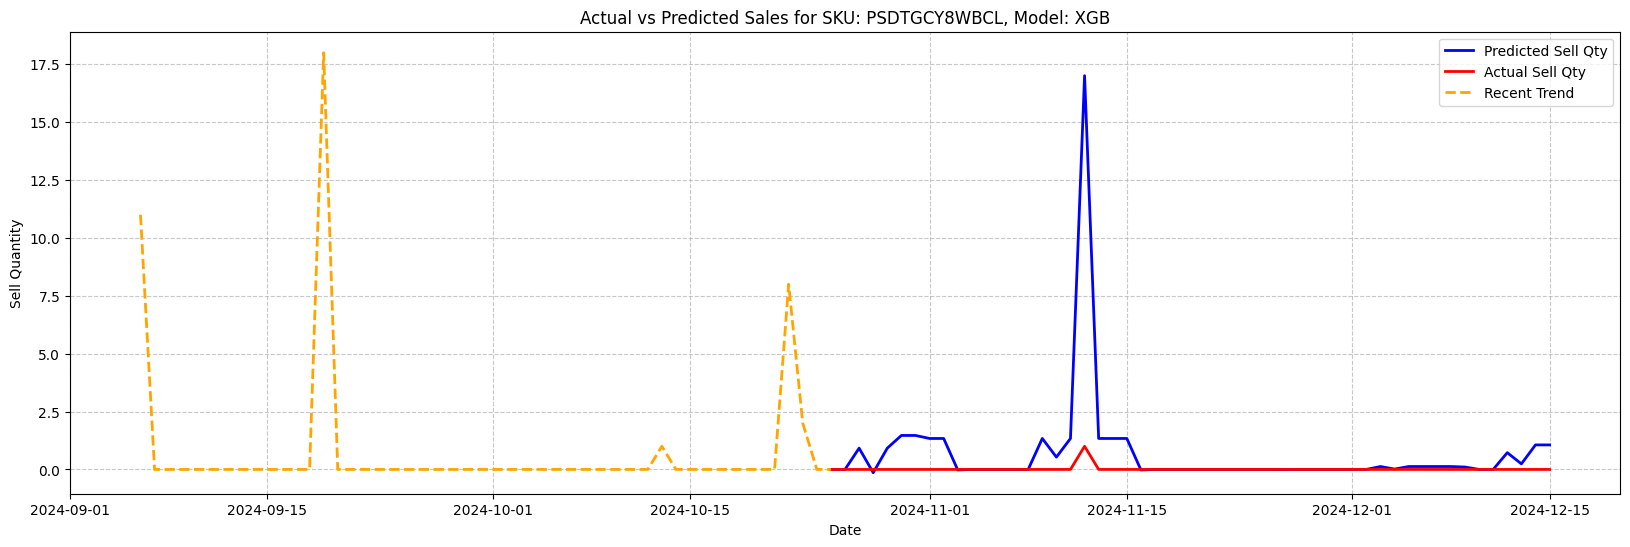

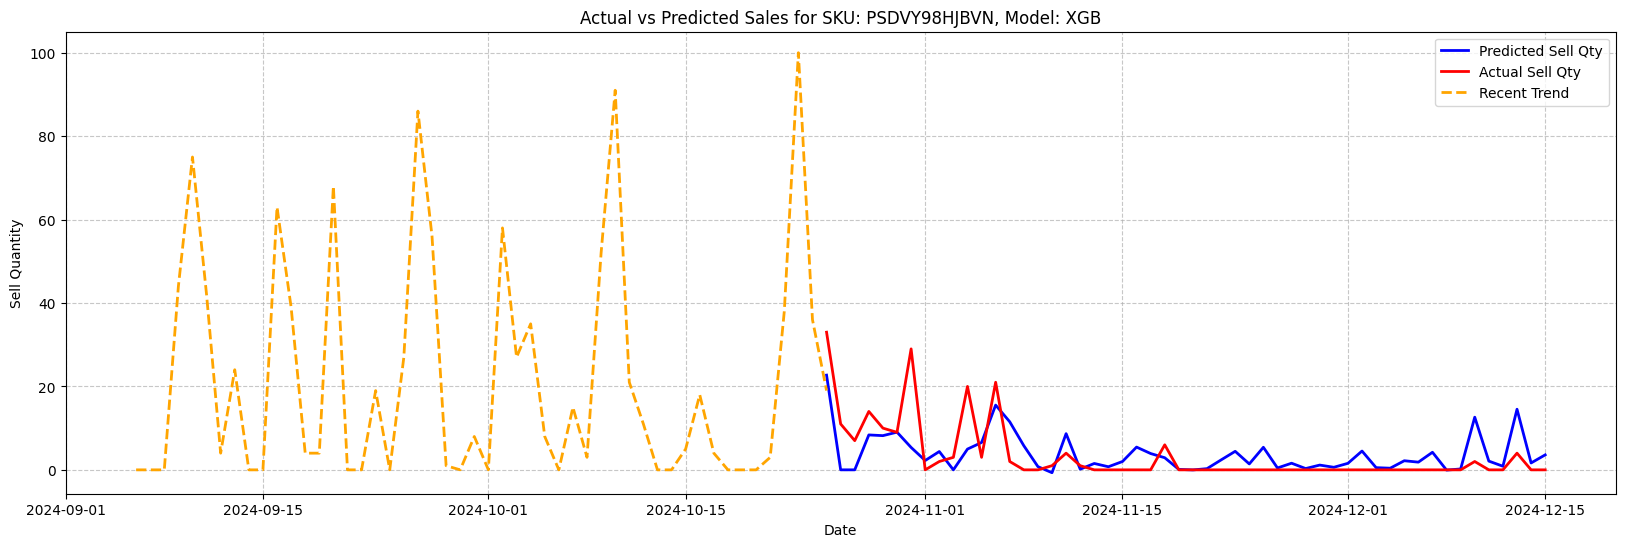

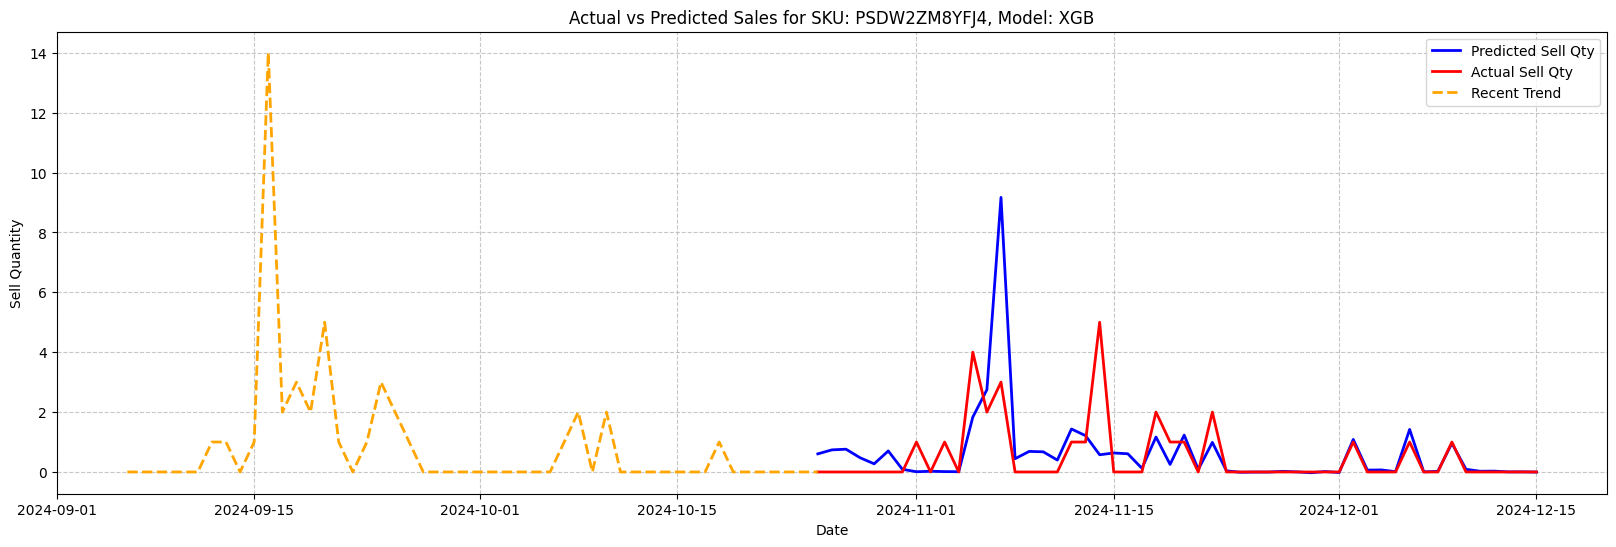

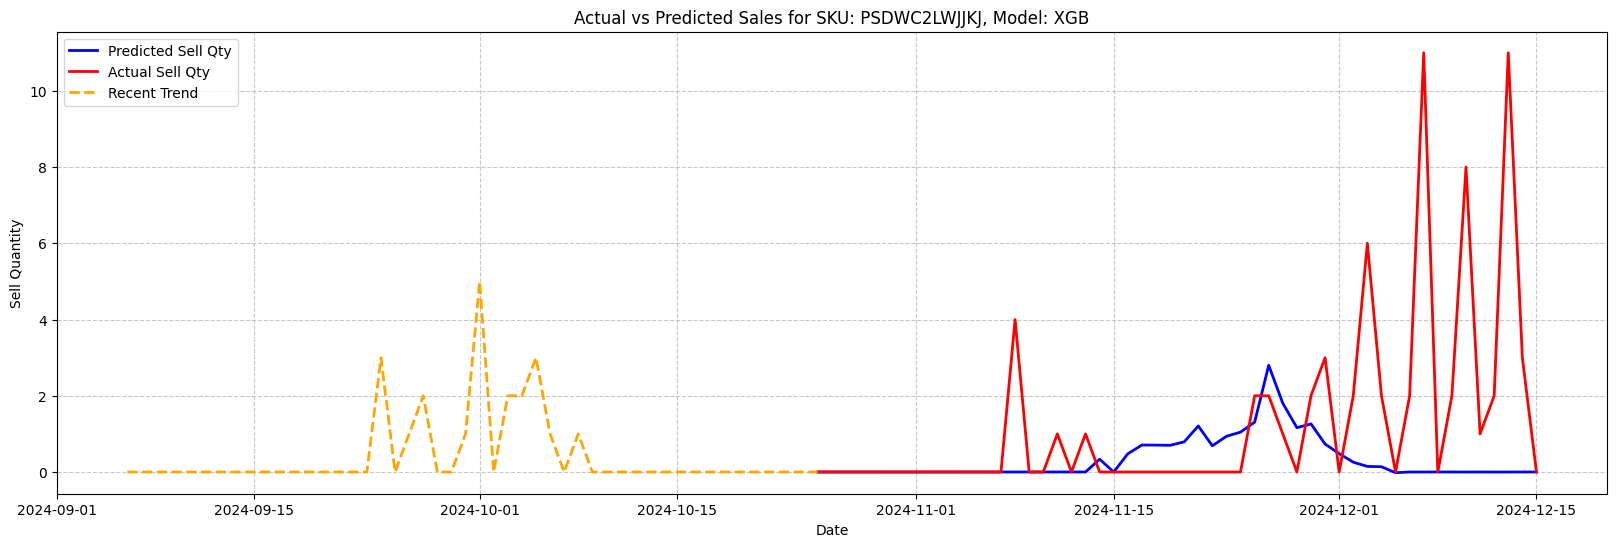

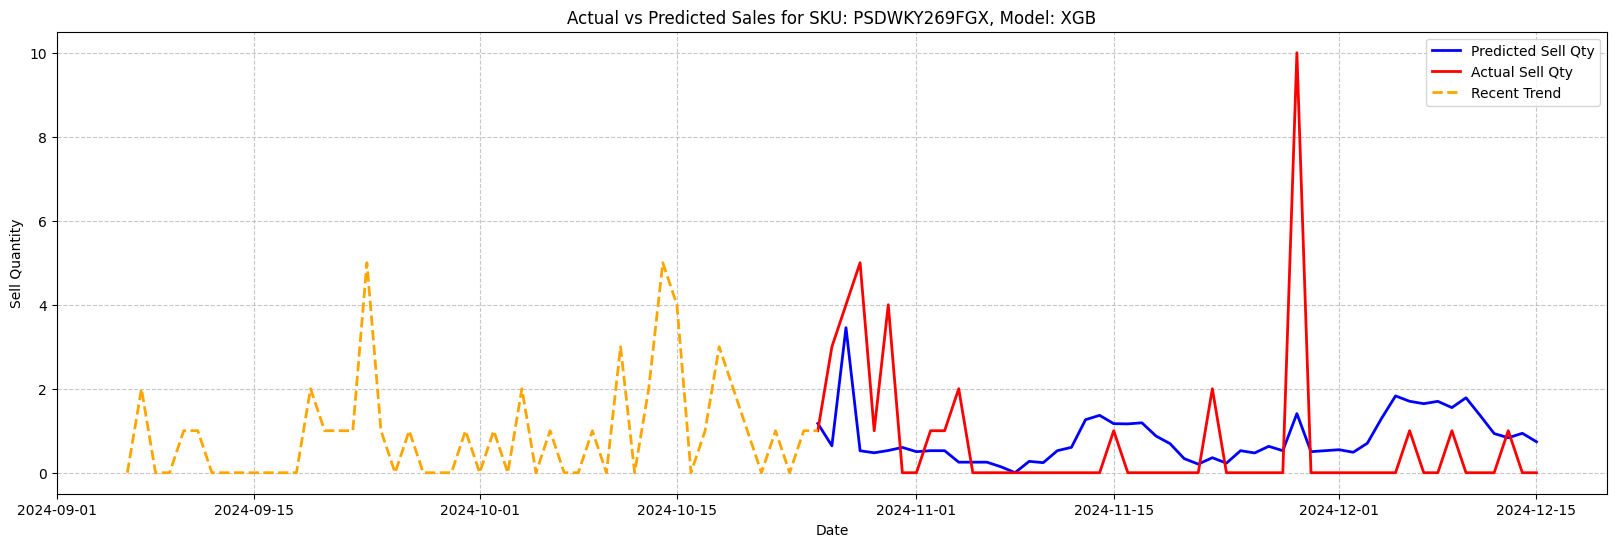

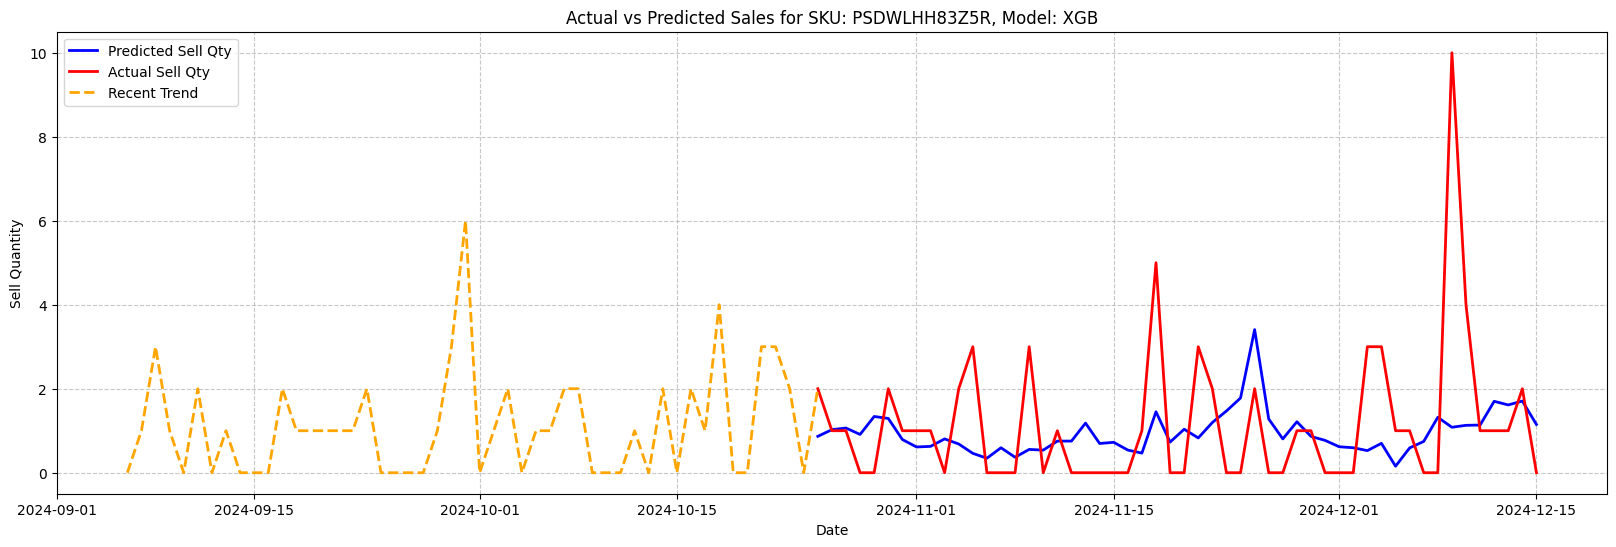

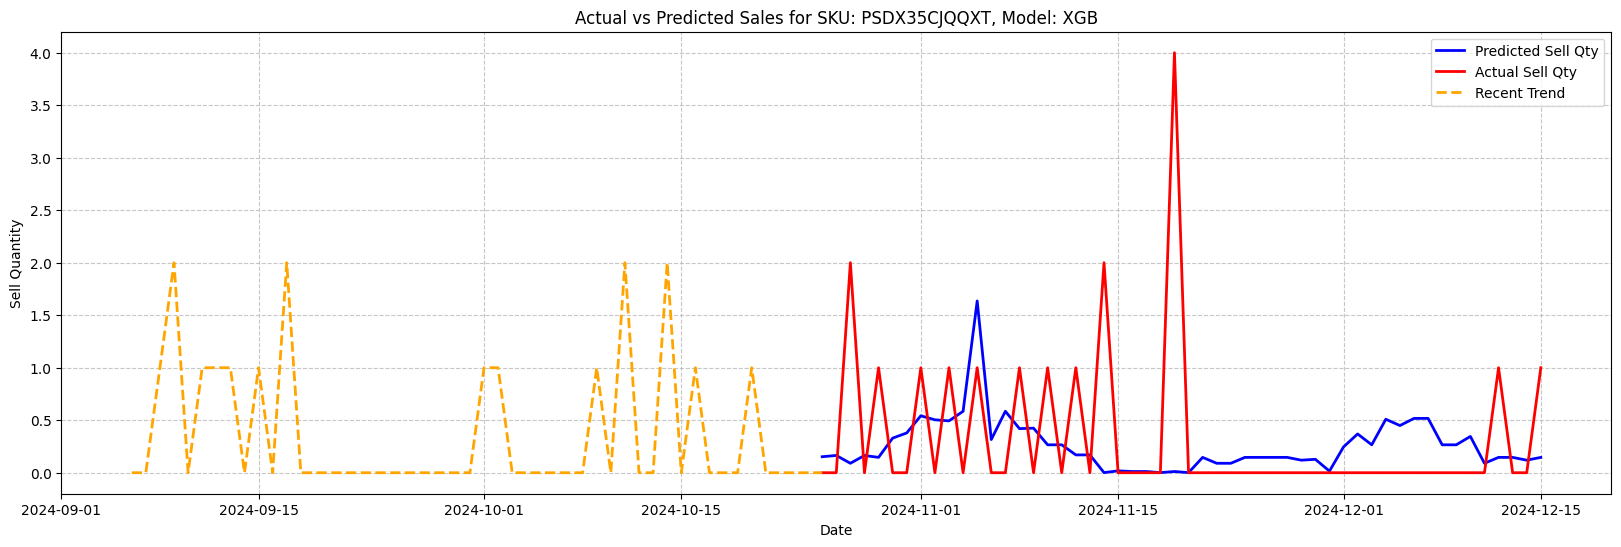

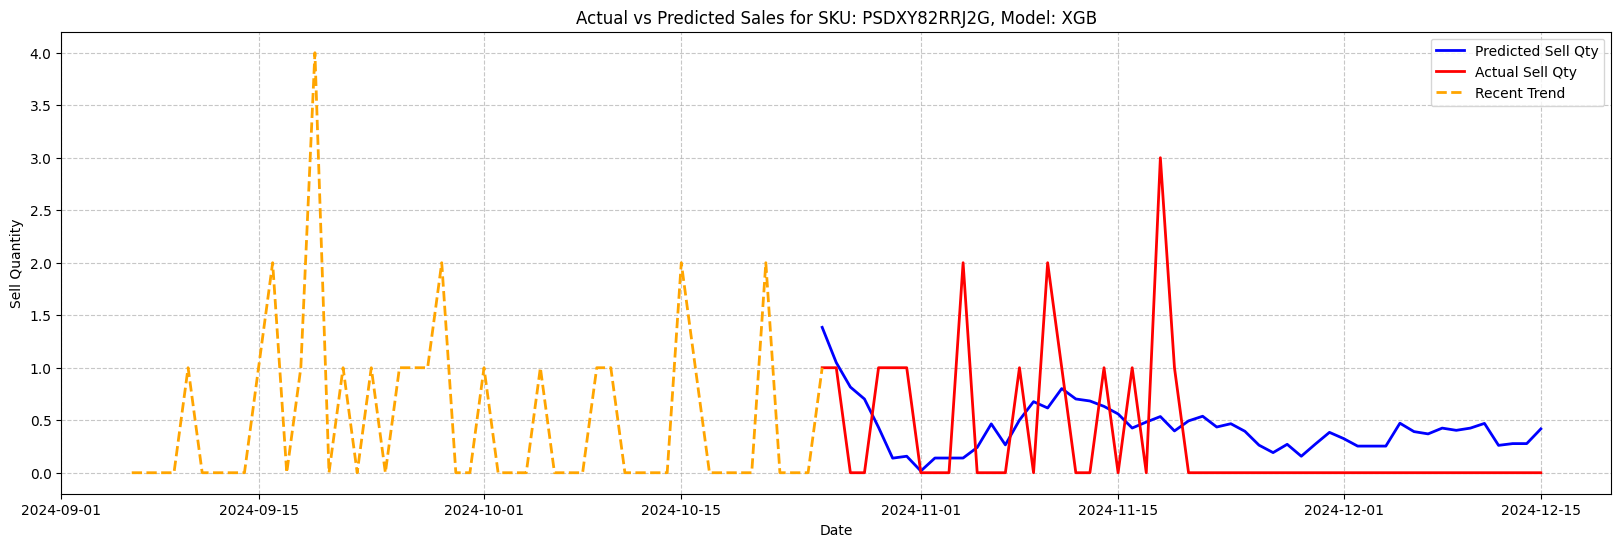

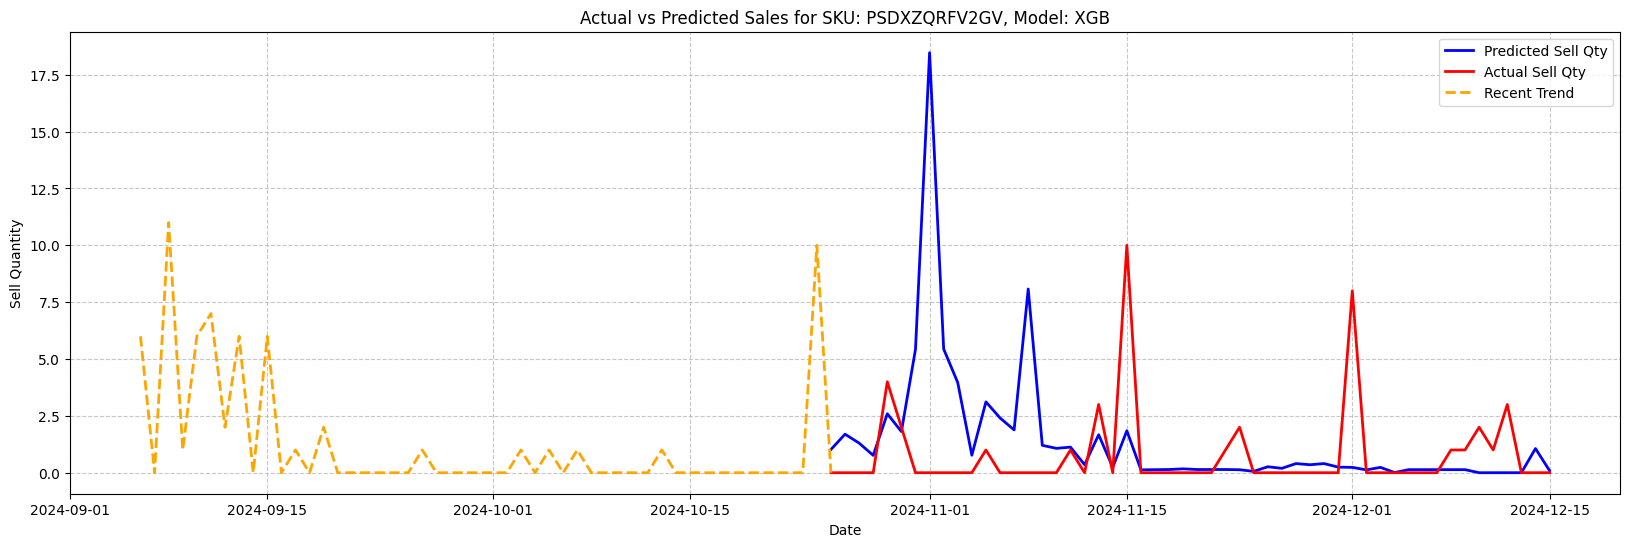

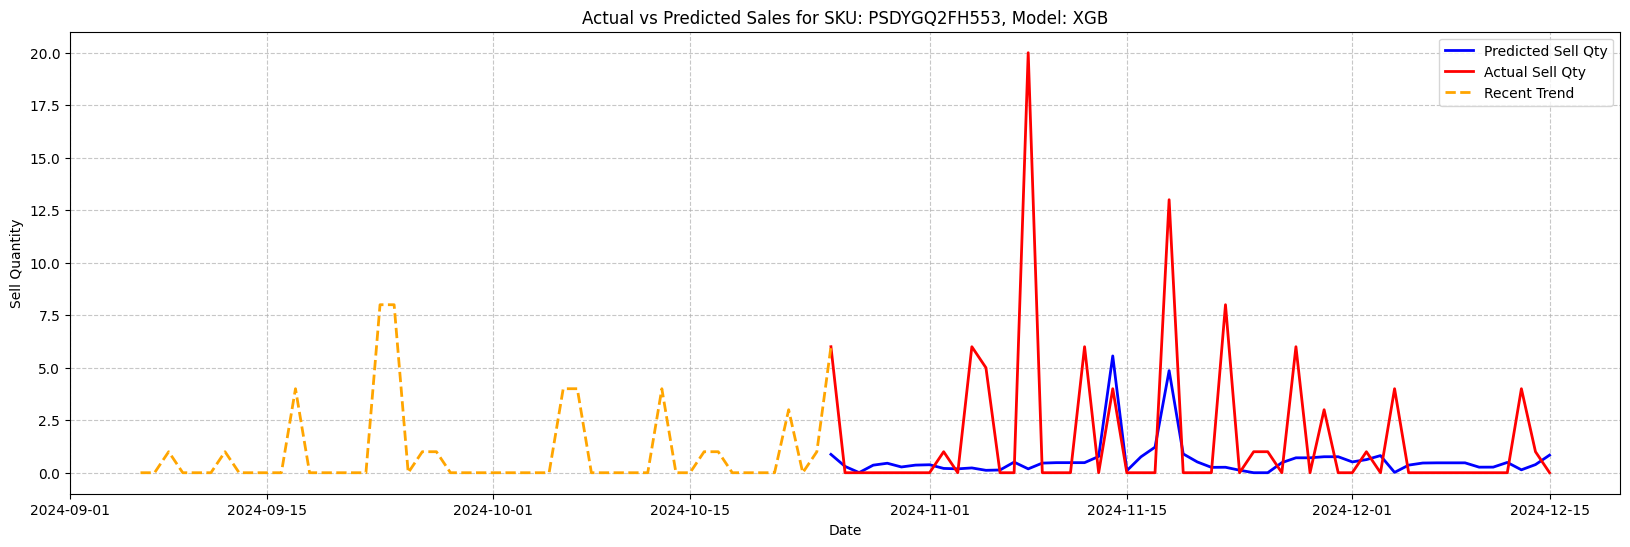

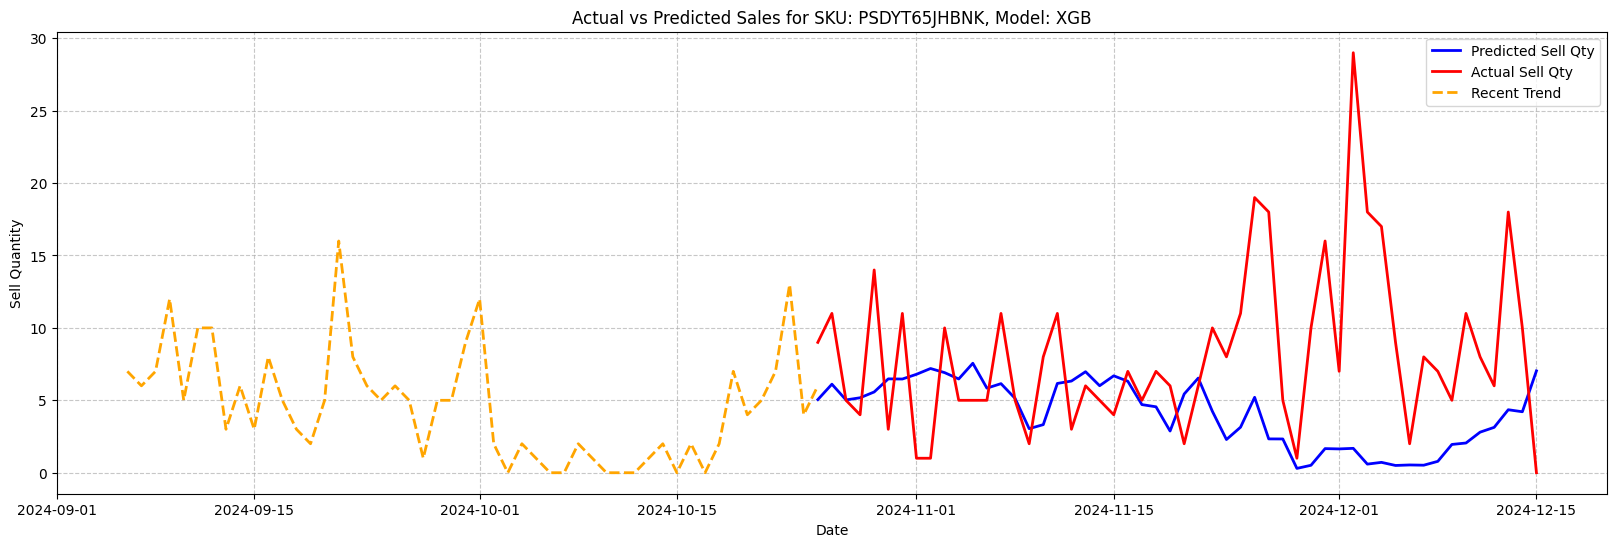

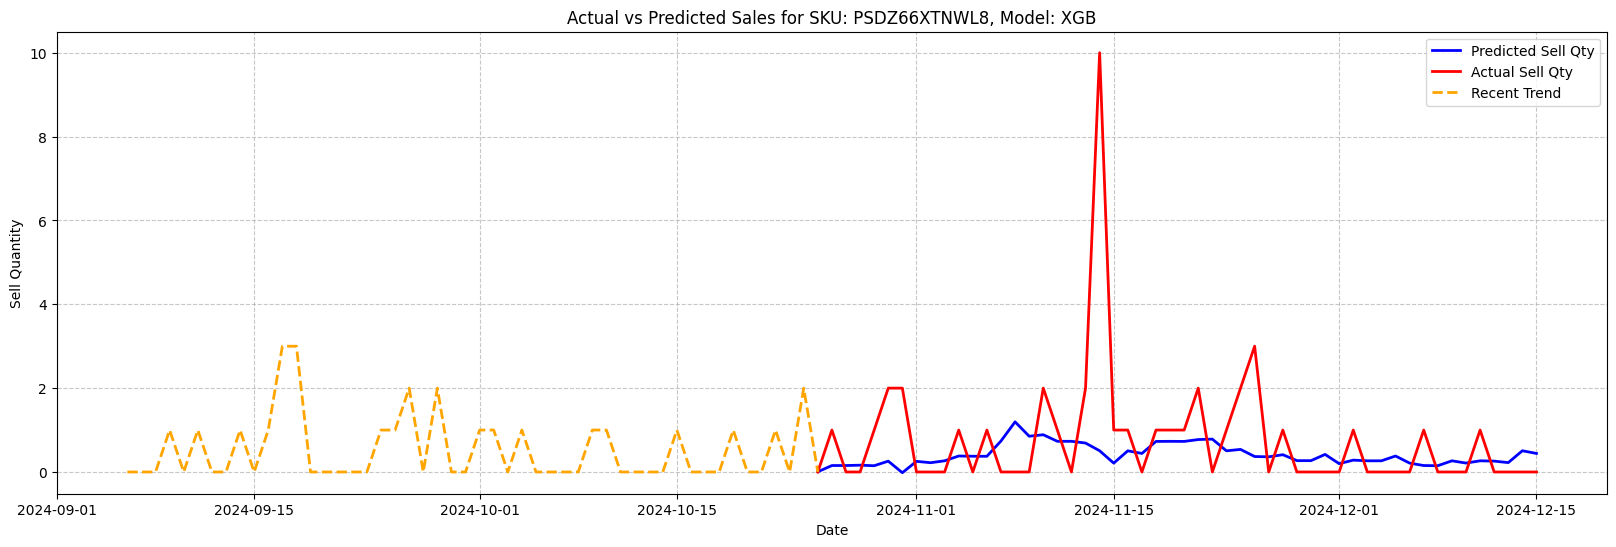

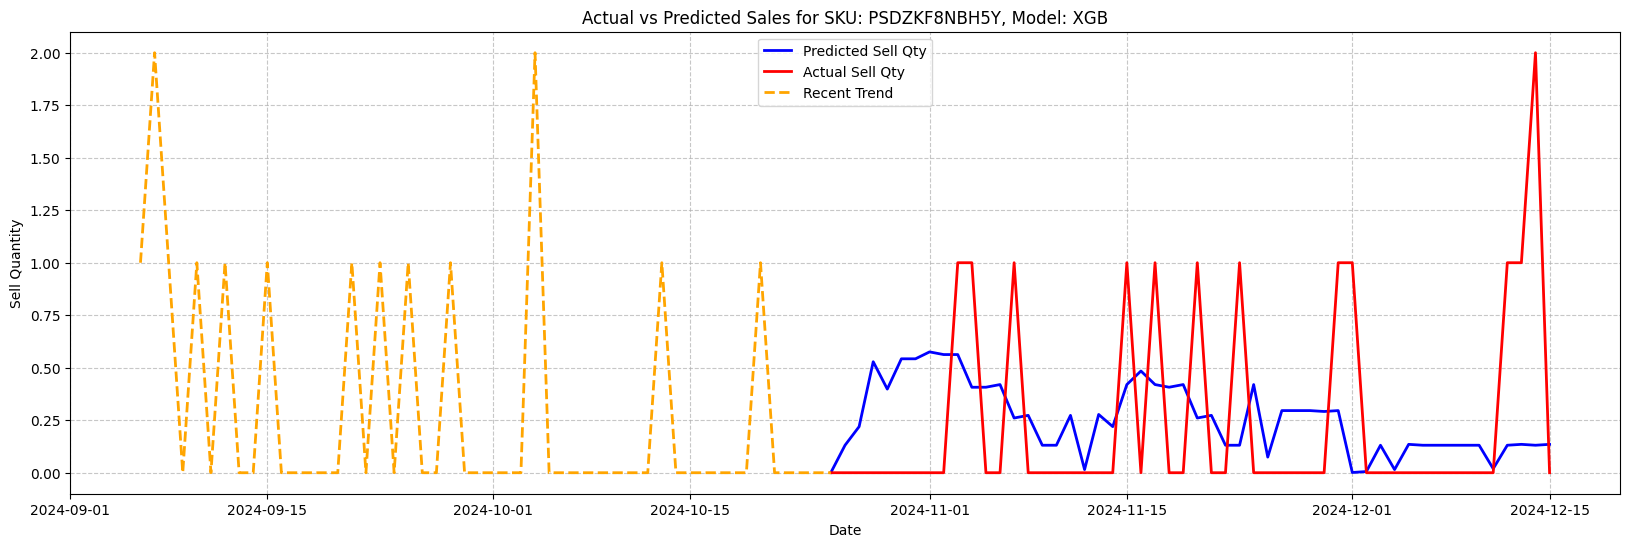

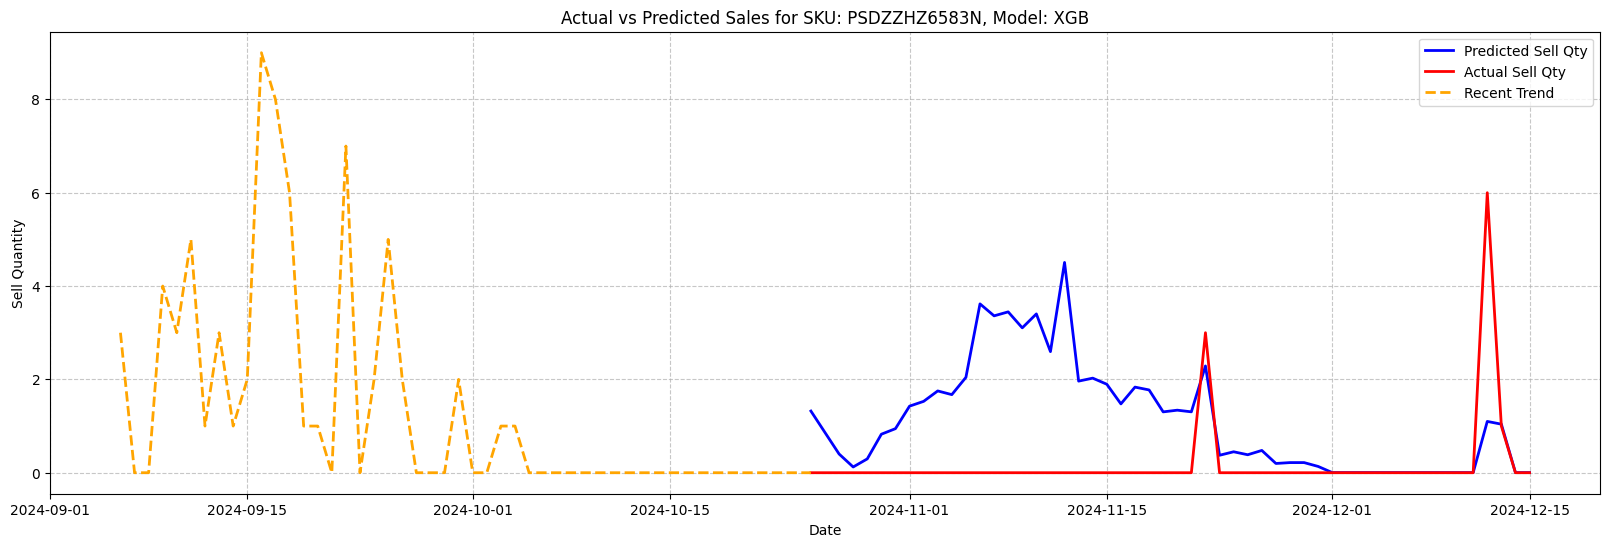

In [42]:
trainer.plot_predictions(predictions=preddictions_xgb,train_df=train_df,model_type='XGB')

In [43]:
import json

# Dictionary to store all model configurations
model_configs = {}

# Iterate over all models and save their configurations
for sku, booster in xgbmodels.items():
    model_configs[sku] = booster.save_config()  # Get model config as a string

# Save to a JSON file
with open("data/models/xgb_booster_configs_4_6.json", "w") as f:
    json.dump(model_configs, f, indent=4)

with open("data/models/xgb_models_4_6.pkl", 'wb') as f:
    pickle.dump(xgbmodels, f)